# UKRN Open and Transparent Research Practices (OTRP) Survey Analysis Script: UKRN-wide Data (anonymised)

**AUTHOR**

Dr Lukas Hughes-Noehrer, Department of Computer Science, University of Manchester

## About

Welcome to the UKRN OTRP Survey analysis notebook!

We assume that you found this notebook in our GitHub repo and you are familiar with what this is all about and the necessary requirements to run this notebook written in Python! No? Please have a look at: https://github.com/LukasNoe/ukrn_otrp or run the binderised version here: https://mybinder.org/v2/gh/LukasNoe/ukrn_otrp/HEAD

This notebook can be used to analyse various data collected through the first run of the OTRP survey between December 2022 and April 2023. To get the relevant data and any other study-related info, please head to our Figshare repository and pull the dataset(s) you want to use: https://doi.org/10.48420/22094216.v3

Feel free to use our code for whatever reasons you like and you deem it useful for, unless it's illegal or discriminatory. Always respect the **GNU General Public License v3.0** this notebook and everything else related to it is released under.




In [601]:
%%capture
#Import libraries necessary to run this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [608]:
%%capture
#Read the relevant csv file
df = pd.read_csv('ukrn_otrp_data.csv')


#Inspect the csv
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])

#Print the first 5 rows of df
print(df.head())

In [609]:
#%%capture
df = df.drop(index=[0, 1]).reset_index(drop=True)
df.head()

,Progress,Duration (in seconds),Finished,UserLanguage,Consent,Q1,Q2,Q3,Q4,Q5,...,Q14.7_8_TEXT,Q14.8,Q14.9,Q14.10,Q14.11,Q14.12,Q14.13,Q15_1,Q16,Q16_11_TEXT
0,100,768,TRUE,EN,Yes,ANONYMISED,2 - 5 years,(CAH15) Social sciences,Post-doctoral Research Associate,"Phase 2: Early (e.g., Research Associate, firs...",...,NaN,Yes,Library services at my previous institution,I do not know,I do not know,NaN,NaN,6,Lack of time,NaN
1,100,10,TRUE,EN,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,524,TRUE,EN,Yes,NaN,2 - 5 years,(CAH04) Psychology,Early Career Research Fellow,"Phase 2: Early (e.g., Research Associate, firs...",...,NaN,No,NaN,Monitoring and compliance,Ok,NaN,NaN,6,Lack of information or training,NaN
3,100,839,TRUE,EN,Yes,NaN,5 - 10 years,"(CAH06) Agriculture, food, and related studies",lecturer,"Phase 2: Early (e.g., Research Associate, firs...",...,NaN,No,NaN,Recognition and reward,Ok,na,na,6,Lack of positive incentives,NaN
4,100,1457,TRUE,EN,Yes,NaN,5 - 10 years,(CAH04) Psychology,Senior Lecturer,"Phase 3: Mid/Recognised (e.g., Senior Lecturer...",...,NaN,No,NaN,Monitoring and compliance,Ok,NaN,NaN,6,Lack of time,NaN


In [610]:
#Drop all test and none consented rows
df = df[df['Consent'] == 'Yes']

In [611]:
#Calculate number of responses
responses = (df.shape[0])
print((responses), 'have responded')

2594 have responded


In [612]:
#Print the number of complete responses
print((sum(df['Progress'] == '100')), 'have completed the survey')

515 have completed the survey


## Demographics

### Demographics_2: Duration of employment 

In [7]:
#Count all answers and list them descending
'N=' + (df['Q2'].value_counts(sort=True)).astype(str)

under 2 years    N=782
over 10 years    N=707
2 - 5 years      N=635
5 - 10 years     N=470
Name: Q2, dtype: object

In [8]:
#Normalise the count to represent answers in percent
(df['Q2'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

under 2 years    30.15%
over 10 years    27.26%
2 - 5 years      24.48%
5 - 10 years     18.12%
Name: Q2, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

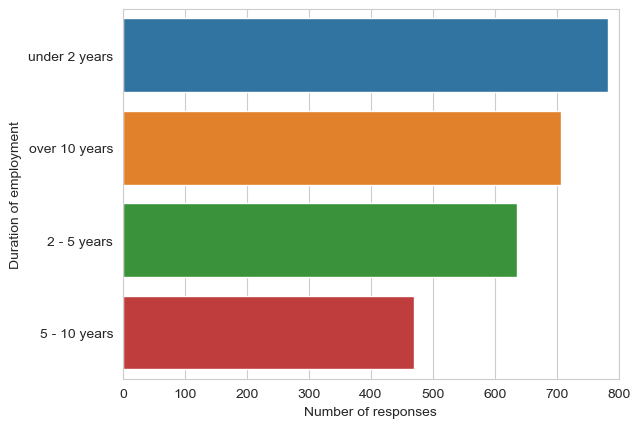

In [9]:
#Plot question two as a bar plot
sns.set_style('whitegrid')

countplot = sns.countplot(data=df, y="Q2", order = df['Q2'].value_counts().index)
#countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, ha="right")
countplot.set(xlabel="Number of responses", ylabel="Duration of employment")

#plt.show()
plt.xlim(0, 800)
plt.show
#plt.savefig('../data/plots_test/duration_employment.png', bbox_inches='tight', dpi = 300)

In [10]:
#Display how many particpants haven't given an answer
count = df["Q2"].isna().sum()
print(count, "participants have not answered.")

0 participants have not answered.


### Demographics_3: Research discipline

In [11]:
#Count all answers and list them descending
'N=' + (df['Q3'].value_counts(sort=True)).astype(str)

(CAH02) Subjects allied to medicine (e.g., nursing, pharmacology, health sciences)    N=298
(CAH03) Biological and sport sciences                                                 N=257
(CAH10)Engineering and technology                                                     N=256
(CAH15) Social sciences                                                               N=252
(CAH04) Psychology                                                                    N=216
(CAH01) Medicine and dentistry                                                        N=197
(CAH07) Physical sciences                                                             N=153
(CAH11) Computing                                                                      N=93
(CAH17) Business and management                                                        N=79
(CAH22) Education and teaching                                                         N=79
(CAH20) Historical, philosophical, and religious studies                        

In [12]:
#Normalise the count to represent answers in percent
(df['Q3'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

(CAH02) Subjects allied to medicine (e.g., nursing, pharmacology, health sciences)     12.9%
(CAH03) Biological and sport sciences                                                 11.13%
(CAH10)Engineering and technology                                                     11.08%
(CAH15) Social sciences                                                               10.91%
(CAH04) Psychology                                                                     9.35%
(CAH01) Medicine and dentistry                                                         8.53%
(CAH07) Physical sciences                                                              6.62%
(CAH11) Computing                                                                      4.03%
(CAH17) Business and management                                                        3.42%
(CAH22) Education and teaching                                                         3.42%
(CAH20) Historical, philosophical, and religious studies              

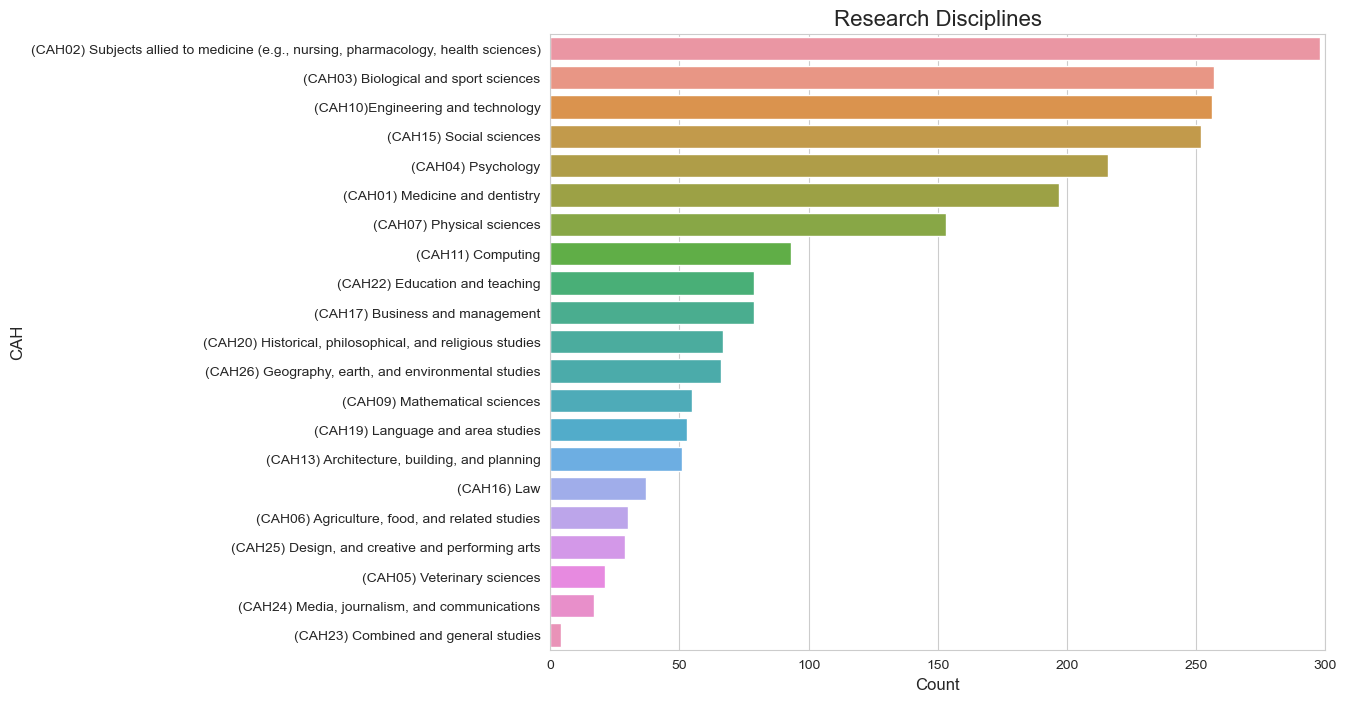

In [13]:
#Plot question three as a pie chart
# Group the data by a categorical column
# Group the data by the column
grouped_data = df.groupby('Q3').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q3', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('CAH', fontsize=12)
plt.title('Research Disciplines', fontsize=16)

# Show the chart
plt.show()
#Save the plot
#plt.xlim(0, 300)
#plt.savefig('../data/plots_test/research_discipline.png', bbox_inches='tight', dpi = 300)

In [14]:
#Display how many particpants haven't given an answer
count = df["Q3"].isna().sum()
print(count, "participants have not answered.")

284 participants have not answered.


### Demographics_4: Job role

In [15]:
#Count all answers and list them descending
'N=' + (df['Q4'].value_counts(sort=True)).astype(str)

Professor                                   N=191
Lecturer                                    N=155
Research Fellow                             N=114
PhD student                                 N=101
Senior Lecturer                              N=87
                                            ...  
PhD Student in Cancer Science                 N=1
Professor of Molecular Neurodegeneration      N=1
Professor of socioeconomics                   N=1
Senior research Associate                     N=1
Senior Engineer                               N=1
Name: Q4, Length: 834, dtype: object

In [16]:
#Normalise the count to represent answers in percent
(df['Q4'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Professor                                   8.03%
Lecturer                                    6.52%
Research Fellow                             4.79%
PhD student                                 4.25%
Senior Lecturer                             3.66%
                                            ...  
PhD Student in Cancer Science               0.04%
Professor of Molecular Neurodegeneration    0.04%
Professor of socioeconomics                 0.04%
Senior research Associate                   0.04%
Senior Engineer                             0.04%
Name: Q4, Length: 834, dtype: object

In [17]:
#Display how many particpants haven't given an answer
count = df["Q4"].isna().sum()
print(count, "participants have not answered.")

215 participants have not answered.


### Demographics_5: Current career stage

In [18]:
#Count all answers and list them descending
'N=' + (df['Q5'].value_counts(sort=True)).astype(str)

Phase 2: Early (e.g., Research Associate, first grant holder, Lecturer)                N=741
Phase 1: Junior (e.g., PhD candidate, Research Assistant)                              N=651
Phase 3: Mid/Recognised (e.g., Senior Lecturer, Reader, Senior Researcher)             N=465
Phase 4: Established/Experienced (e.g., Professor, Principal Fellows or Scientists)    N=453
Name: Q5, dtype: object

In [19]:
#Normalise the count to represent answers in percent
(df['Q5'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Phase 2: Early (e.g., Research Associate, first grant holder, Lecturer)                32.08%
Phase 1: Junior (e.g., PhD candidate, Research Assistant)                              28.18%
Phase 3: Mid/Recognised (e.g., Senior Lecturer, Reader, Senior Researcher)             20.13%
Phase 4: Established/Experienced (e.g., Professor, Principal Fellows or Scientists)    19.61%
Name: Q5, dtype: object

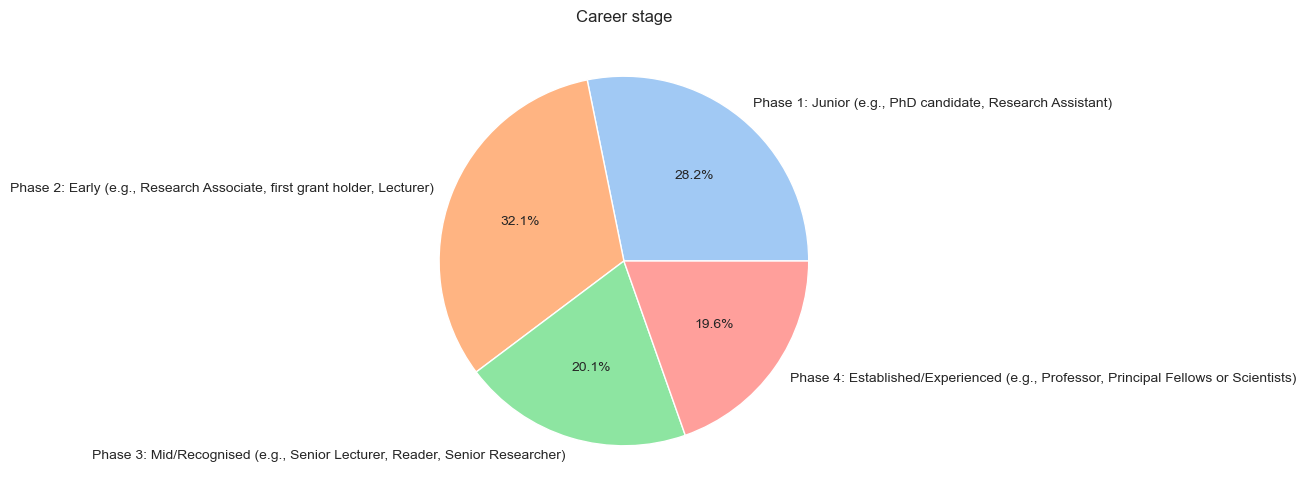

In [20]:
# Group the data by the column
grouped_data = df.groupby('Q5').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q5'], autopct='%1.1f%%')

# Add a title
plt.title('Career stage')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/career_stage.png', bbox_inches='tight', dpi = 300, transparent=True)

In [21]:
#Display how many particpants haven't given an answer
count = df["Q5"].isna().sum()
print(count, "participants have not answered.")

284 participants have not answered.


### Demographics_6: Research methods

In [22]:
#Count all answers and list them descending
df['Q6'].value_counts(sort=True)

Quantitative    1030
Mixed            864
Qualitative      472
Other:            65
Name: Q6, dtype: int64

In [23]:
#Display the text answers in "Other:"
df['Q6_4_TEXT'].value_counts(sort=True)

Theoretical                                                                                                                                                             2
Philosophical                                                                                                                                                           2
Computational (e.g. a mix of python scripts to scrape web-pages then machine learning models to analyse the text)                                                       1
Clinical                                                                                                                                                                1
formal                                                                                                                                                                  1
Textual                                                                                                                                               

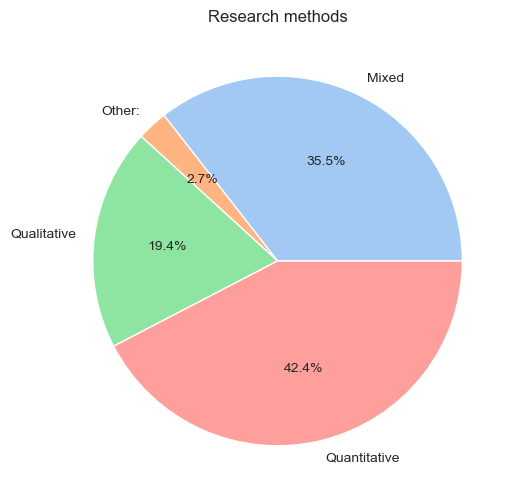

In [24]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q6').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q6'], autopct='%1.1f%%')

# Add a title
plt.title('Research methods')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/methods.png', bbox_inches='tight', dpi = 300, transparent=True)

In [25]:
#Display how many particpants haven't given an answer
count = df["Q6"].isna().sum()
print(count, "participants have not answered.")

163 participants have not answered.


### Demographics_7: Gender

In [26]:
#Count all answers and list them descending
df['Q7'].value_counts(sort=True)

Woman                       1216
Man                         1071
Prefer to not disclose        87
Non-binary                    27
Prefer to self-describe:      20
Name: Q7, dtype: int64

In [27]:
#Display gender in percentages
(df['Q7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Woman                       50.23%
Man                         44.24%
Prefer to not disclose       3.59%
Non-binary                   1.12%
Prefer to self-describe:     0.83%
Name: Q7, dtype: object

In [28]:
#Display the answers of those who prefer to self-describe
df['Q7_5_TEXT'].value_counts(sort=True)

Sex is female                                                                                               1
I am female, I don't have a gender                                                                          1
agender                                                                                                     1
Queer                                                                                                       1
I don't "identify" with a gender. I am female.                                                              1
i dont see why this, or the question below is relevant to open science                                      1
I find this question troubling. I don't "identify" with a gender. I am female.                              1
I identify by sex: adult human female, not including “trans woman”                                          1
this question should be about sex                                                                           1
none      

In [29]:
#Display how many particpants haven't given an answer
count = df["Q7"].isna().sum()
print(count, "participants have not answered.")

173 participants have not answered.


### Demographics_8: Ethnic group

In [30]:
#Count all answers and list them descending
df['Q8'].value_counts(sort=True)

White                                         1838
Asian or Asian-British                         297
Other ethnic group                             142
Mixed or multiple ethnic groups                 91
Black, Black-British, Caribbean or African      53
Name: Q8, dtype: int64

In [31]:
#Display ethnic groups in pecentages
(df['Q8'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

White                                         75.92%
Asian or Asian-British                        12.27%
Other ethnic group                             5.87%
Mixed or multiple ethnic groups                3.76%
Black, Black-British, Caribbean or African     2.19%
Name: Q8, dtype: object

In [32]:
#Display how many particpants haven't given an answer
count = df["Q8"].isna().sum()
print(count, "participants have not answered.")

173 participants have not answered.


# MAIN PART QUESTIONNAIRE

## 1. Research Co-production

### Q1.1 Research co-production is something I think has a [low, medium, high] priority in my field of research:

In [33]:
#Count all answers and list them descending
df['Q1.1'].value_counts(sort=True)

High                      815
Medium                    744
Low                       518
I am not aware of this    230
Name: Q1.1, dtype: int64

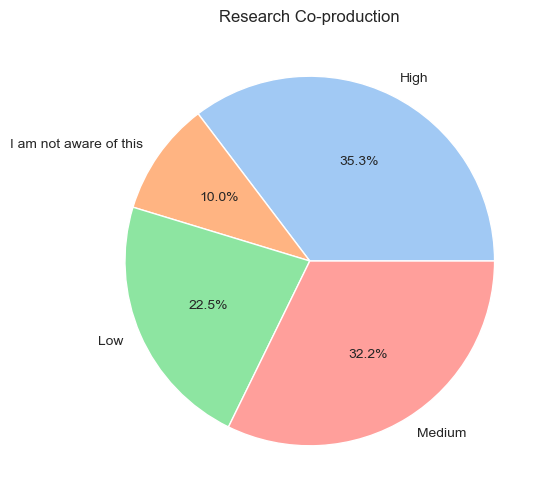

In [34]:
# Group the data by the column
grouped_data = df.groupby('Q1.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q1.1'], autopct='%1.1f%%')

# Add a title
plt.title('Research Co-production')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/coproduction.png', bbox_inches='tight', dpi = 300, transparent=True)

In [35]:
#Display how many particpants haven't given an answer
count = df["Q1.1"].isna().sum()
print(count, "participants have not answered.")

287 participants have not answered.


### Q1.2 I do this type of activity in my field of research (0 - Never to 6 - Very often):

In [36]:
print(df['Q1.2_1'].dtype)

object


In [37]:
df['Q1.2_1'] = pd.to_numeric(df['Q1.2_1'], errors='coerce').astype('Int64')

In [38]:
#Count all answers and list them
likert_data = df['Q1.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    491
1    399
2    269
3    305
4    340
5    260
6    243
Name: Q1.2_1, dtype: Int64


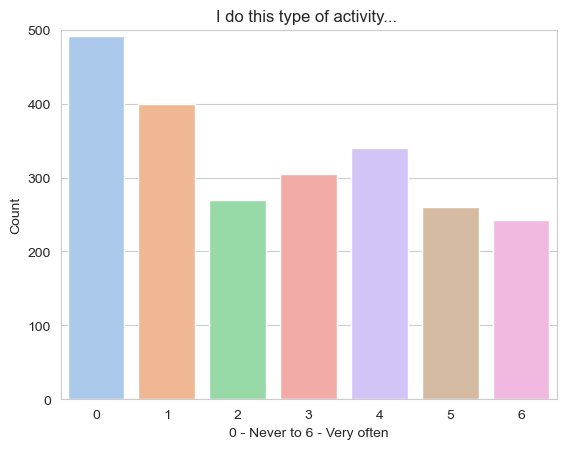

In [39]:
likert_data = df['Q1.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 500)
plt.show()

#plt.savefig('../data/plots_test/coprod_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [40]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode()

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.5877763328998697
Median: 2.0
Mode: 0    0
Name: Q1.2_1, dtype: Int64
Standard Deviation: 2.0253141365014167
Interquartile Range: 3


In [41]:
#Display how many particpants haven't given an answer
count = df["Q1.2_1"].isna().sum()
print(count, "participants have not answered.")

287 participants have not answered.


### Q1.3 For me, training in this topic is:

In [42]:
print(df['Q1.3_1'].dtype)

object


In [43]:
df['Q1.3_1'] = pd.to_numeric(df['Q1.3_1'], errors='coerce').astype('Int64')

In [44]:
#Count all answers and list them
likert_data = df['Q1.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    281
1    251
2    223
3    365
4    396
5    374
6    416
Name: Q1.3_1, dtype: Int64


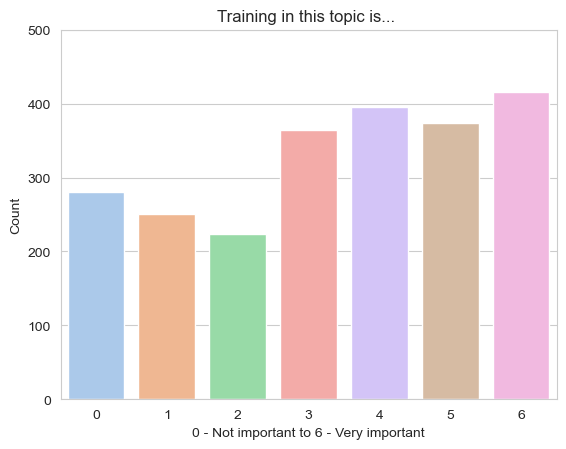

In [45]:
likert_data = df['Q1.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/coprod_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [46]:
###### calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.357328707718994
Median: 4.0
Mode: 6
Standard Deviation: 1.9866759148939621
Interquartile Range: 3


In [47]:
#Display how many particpants haven't given an answer
count = df["Q1.3_1"].isna().sum()
print(count, "participants have not answered.")

288 participants have not answered.


### Q1.4 I have looked for training and support in this topic at my institution:

In [48]:
#Count all answers and list them descending
df['Q1.4'].value_counts(sort=True)

No                    1627
Yes                    533
Yes, but not found     147
Name: Q1.4, dtype: int64

In [49]:
#Display how many particpants haven't given an answer
count = df["Q1.4"].isna().sum()
print(count, "participants have not answered.")

287 participants have not answered.


### Q1.5 (if Q1.4 was yes) Training at my institution is:

In [50]:
#Show type of df column
print(df['Q1.5_1'].dtype)

object


In [51]:
df['Q1.5_1'] = pd.to_numeric(df['Q1.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q1.5_1']

In [52]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.237394957983193
Median: 4.0
Mode: 4
Standard Deviation: 1.2865084283872246
Interquartile Range: 2


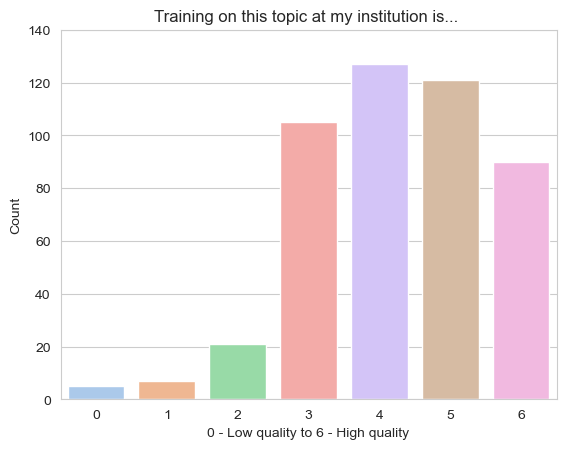

In [53]:
likert_data = df['Q1.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 140)
plt.show()
#plt.savefig('../data/plots_test/coprod_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [54]:
#Display how many particpants haven't given an answer
count = df["Q1.5_1"].isna().sum()
print(count, "participants have not answered.")

2118 participants have not answered.


### Q1.6 Training in this topic at my institution:

In [55]:
#Count all answers and list them descending
'N=' + (df['Q1.6'].value_counts(sort=True)).astype(str)

At the right level                                      N=126
Infrequent                                              N=115
Frequent,At the right level                              N=70
Frequent                                                 N=59
Infrequent,At the right level                            N=43
At too basic a level                                     N=26
Infrequent,At too basic a level                          N=18
At too complex a level                                   N=12
Frequent,At too basic a level                             N=7
Infrequent,At too complex a level                         N=3
Frequent,Infrequent                                       N=2
Frequent,At too complex a level                           N=2
Frequent,At too complex a level,At the right level        N=1
Frequent,At the right level,At too basic a level          N=1
At too complex a level,At the right level                 N=1
Infrequent,At the right level,At too basic a level        N=1
Infreque

In [56]:
#Normalise the count to represent answers in percent
(df['Q1.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                      25.82%
Infrequent                                              23.57%
Frequent,At the right level                             14.34%
Frequent                                                12.09%
Infrequent,At the right level                            8.81%
At too basic a level                                     5.33%
Infrequent,At too basic a level                          3.69%
At too complex a level                                   2.46%
Frequent,At too basic a level                            1.43%
Infrequent,At too complex a level                        0.61%
Frequent,Infrequent                                      0.41%
Frequent,At too complex a level                          0.41%
Frequent,At too complex a level,At the right level        0.2%
Frequent,At the right level,At too basic a level          0.2%
At too complex a level,At the right level                 0.2%
Infrequent,At the right level,At too basic a level     

In [57]:
#Display how many particpants haven't given an answer
count = df["Q1.6"].isna().sum()
print(count, "participants have not answered.")

2106 participants have not answered.


### Q1.7 The help at my institution on this topic is mainly:

In [58]:
#Count all answers and list them descending
'N=' + (df['Q1.7'].value_counts(sort=True)).astype(str)

Good                                                  N=140
Available                                              N=75
At the right level                                     N=52
Good,At the right level,Available                      N=35
I do not know                                          N=33
Good,Available                                         N=25
Hard to access                                         N=23
Too basic                                              N=20
Good,At the right level                                N=14
Non-existent                                           N=12
At the right level,Available                           N=11
Other. Please explain:                                 N=11
Too basic,Hard to access                                N=6
Good,Hard to access                                     N=5
Non-existent,Hard to access                             N=3
Good,Other. Please explain:                             N=3
Too basic,I do not know                 

In [59]:
#Normalise the count to represent answers in percent
(df['Q1.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                  28.46%
Available                                             15.24%
At the right level                                    10.57%
Good,At the right level,Available                      7.11%
I do not know                                          6.71%
Good,Available                                         5.08%
Hard to access                                         4.67%
Too basic                                              4.07%
Good,At the right level                                2.85%
Non-existent                                           2.44%
At the right level,Available                           2.24%
Other. Please explain:                                 2.24%
Too basic,Hard to access                               1.22%
Good,Hard to access                                    1.02%
Non-existent,Hard to access                            0.61%
Good,Other. Please explain:                            0.61%
Too basic,I do not know 

In [60]:
#Display how many particpants haven't given an answer
count = df["Q1.7"].isna().sum()
print(count, "participants have not answered.")

2102 participants have not answered.


### Q1.7_TEXT

In [61]:
#Count all answers and list them descending
df['Q1.7_8_TEXT'].value_counts(sort=True)

Grant Funded                                                                                                                                                                                                                                                                                                                                                                                                                                                                             1
it's hard to answer this for all training, and depends on career stage                                                                                                                                                                                                                                                                                                                                                                                                                   1
You have to know exactly what you need help on to 

### Q1.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [62]:
#Count all answers and list them descending
df['Q1.8'].value_counts(sort=True)

No     1846
Yes     409
Name: Q1.8, dtype: int64

### Q1.9 Where have you looked for training and support?

In [63]:
#Count all answers and list them descending
df['Q1.9'].value_counts(sort=True)

NIHR                                                                    12
Online                                                                   9
Training software                                                        8
NCRM                                                                     5
online                                                                   4
                                                                        ..
Publishers like Elsevier                                                 1
at my institution and other organisation in my country and in Europe     1
RQA UCL JRO MRC                                                          1
University offerings                                                     1
European Academy of Nursing Sciences                                     1
Name: Q1.9, Length: 294, dtype: int64

### Q1.10 My institution takes mainly the following approach to this topic:

In [64]:
#Count all answers and list them descending
'N=' + (df['Q1.10'].value_counts(sort=True)).astype(str)

I do not know                N=1188
Passive                       N=299
Recognition and reward        N=252
Monitoring and compliance     N=226
Name: Q1.10, dtype: object

In [65]:
#Normalise the count to represent answers in percent
(df['Q1.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                60.46%
Passive                      15.22%
Recognition and reward       12.82%
Monitoring and compliance     11.5%
Name: Q1.10, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

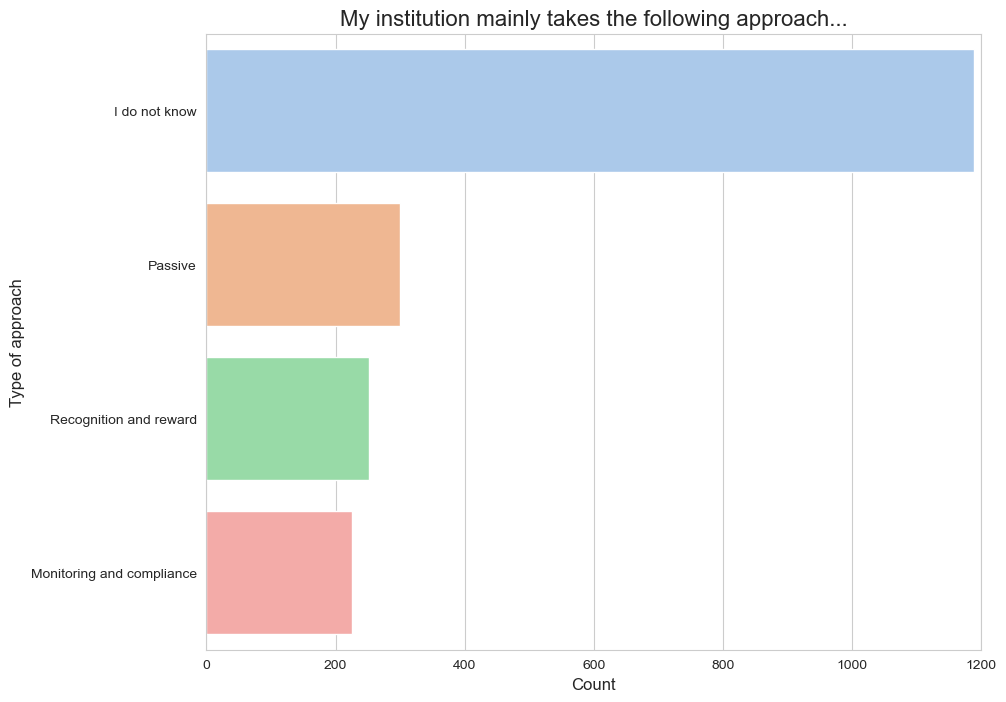

In [66]:
grouped_data = df.groupby('Q1.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q1.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
#plt.show()
#Save the plot
plt.xlim(0, 1200)
plt.show
#plt.savefig('../data/plots_test/coprod_approach.png', bbox_inches='tight', dpi = 300)

In [67]:
#Display how many particpants haven't given an answer
count = df["Q1.10"].isna().sum()
print(count, "participants have not answered.")

629 participants have not answered.


### Q1.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [68]:
#Count all answers and list them descending
'N=' + (df['Q1.11'].value_counts(sort=True)).astype(str)

I do not know    N=1251
Ok                N=399
Not very well     N=169
Very well         N=143
Name: Q1.11, dtype: object

In [69]:
#Display how many particpants haven't given an answer
count = df["Q1.11"].isna().sum()
print(count, "participants have not answered.")

632 participants have not answered.


### Q1.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [70]:
#Count all answers and list them descending
df['Q1.12'].value_counts(sort=True)

None                                                                                                                                                                                                                                                                                                                                53
na                                                                                                                                                                                                                                                                                                                                  48
No                                                                                                                                                                                                                                                                                                                                  46
-                  

### Q1.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [71]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q1.13'].value_counts(sort=True)

no                                                                                                                                                                                                          87
No                                                                                                                                                                                                          83
None                                                                                                                                                                                                        78
-                                                                                                                                                                                                           54
na                                                                                                                                                                          

## 2. OR Legal and Ethical

### Q2.1 Conducting open research consistent with relevant legal, ethical, and regulatory constraints is something I think has a [low, medium, high] priority in my field of research:

In [72]:
#Count all answers and list them descending
df['Q2.1'].value_counts(sort=True)

High                      1235
Medium                     364
Low                        161
I am not aware of this      74
Name: Q2.1, dtype: int64

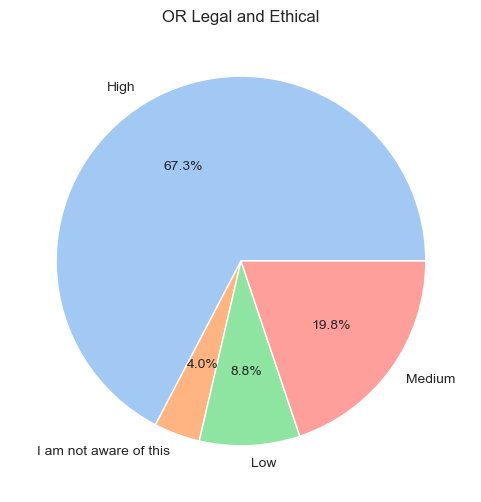

In [73]:
#Plot OR Legal and Ethica

# Group the data by the column
grouped_data = df.groupby('Q2.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q2.1'], autopct='%1.1f%%')

# Add a title
plt.title('OR Legal and Ethical')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/legal.png', bbox_inches='tight', dpi = 300, transparent=True)

In [74]:
#Display how many particpants haven't given an answer
count = df["Q1.1"].isna().sum()
print(count, "participants have not answered.")

287 participants have not answered.


### Q2.2 I do this type of activity in my field of research:

In [75]:
print(df['Q2.2_1'].dtype)

object


In [76]:
df['Q2.2_1'] = pd.to_numeric(df['Q2.2_1'], errors='coerce').astype('Int64')

In [77]:
#Count all answers and list them
likert_data = df['Q2.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    164
1    145
2    117
3    206
4    222
5    315
6    665
Name: Q2.2_1, dtype: Int64


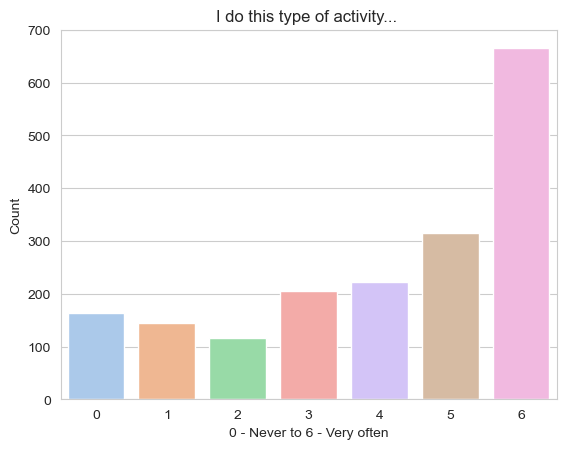

In [78]:
likert_data = df['Q2.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/legal_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [79]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.06215921483097
Median: 5.0
Mode: 6
Standard Deviation: 2.0323238775921357
Interquartile Range: 3


In [80]:
#Display how many particpants haven't given an answer
count = df["Q2.2_1"].isna().sum()
print(count, "participants have not answered.")

760 participants have not answered.


### Q2.3 For me, training in this topic is:

In [81]:
print(df['Q2.3_1'].dtype)

object


In [82]:
df['Q2.3_1'] = pd.to_numeric(df['Q2.3_1'], errors='coerce').astype('Int64')

In [83]:
#Count all answers and list them
likert_data = df['Q2.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    134
1    121
2     97
3    267
4    258
5    328
6    629
Name: Q2.3_1, dtype: Int64


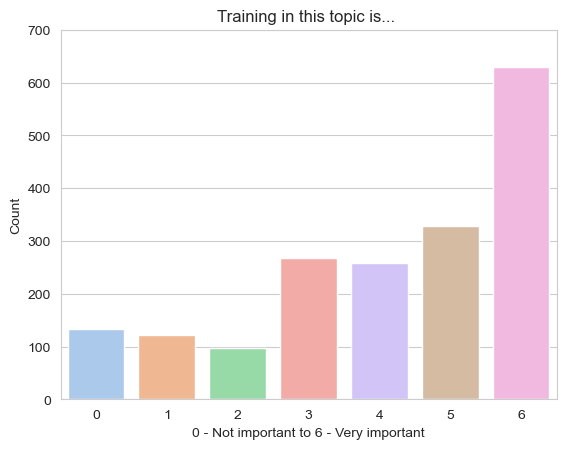

In [84]:
likert_data = df['Q2.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/legal_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [85]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.123227917121047
Median: 5.0
Mode: 6
Standard Deviation: 1.9124524448773694
Interquartile Range: 3


In [86]:
#Display how many particpants haven't given an answer
count = df["Q2.3_1"].isna().sum()
print(count, "participants have not answered.")

760 participants have not answered.


### Q2.4 I have looked for training and support in this topic at my institution:

In [87]:
#Count all answers and list them descending
'N=' + (df['Q2.4'].value_counts(sort=True)).astype(str)

No                    N=890
Yes                   N=874
Yes, but not found     N=70
Name: Q2.4, dtype: object

In [88]:
#Display how many particpants haven't given an answer
count = df["Q1.4"].isna().sum()
print(count, "participants have not answered.")

287 participants have not answered.


### Q2.5 (if Q2.4 was yes) Training at my institution is:

In [89]:
#Show type of df column
print(df['Q2.5_1'].dtype)

object


In [90]:
df['Q2.5_1'] = pd.to_numeric(df['Q2.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q2.5_1']

In [91]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.346244131455399
Median: 4.0
Mode: 5
Standard Deviation: 1.2617755480866253
Interquartile Range: 1


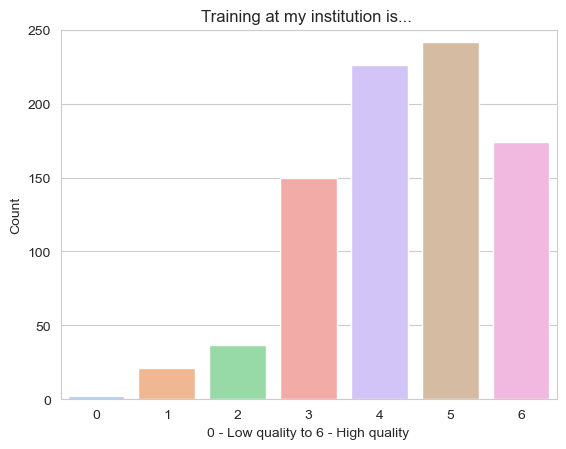

In [92]:
likert_data = df['Q2.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training at my institution is... ')

# Display the plot
plt.ylim(0, 250)
plt.show()
#plt.savefig('../data/plots_test/legal_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [93]:
#Display how many particpants haven't given an answer
count = df["Q2.5_1"].isna().sum()
print(count, "participants have not answered.")

1742 participants have not answered.


### Q2.6 Training in this topic at my institution:

In [94]:
#Count all answers and list them descending
'N=' + (df['Q2.6'].value_counts(sort=True)).astype(str)

At the right level                                                                    N=229
Frequent,At the right level                                                           N=168
Frequent                                                                              N=166
Infrequent                                                                            N=138
Infrequent,At the right level                                                          N=56
At too basic a level                                                                   N=38
Infrequent,At too basic a level                                                        N=31
Frequent,At too basic a level                                                          N=12
At too complex a level                                                                  N=5
Infrequent,At too complex a level                                                       N=4
Frequent,At too complex a level                                                 

In [95]:
#Normalise the count to represent answers in percent
(df['Q2.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                                                    26.88%
Frequent,At the right level                                                           19.72%
Frequent                                                                              19.48%
Infrequent                                                                             16.2%
Infrequent,At the right level                                                          6.57%
At too basic a level                                                                   4.46%
Infrequent,At too basic a level                                                        3.64%
Frequent,At too basic a level                                                          1.41%
At too complex a level                                                                 0.59%
Infrequent,At too complex a level                                                      0.47%
Frequent,At too complex a level                                       

In [96]:
#Display how many particpants haven't given an answer
count = df["Q2.6"].isna().sum()
print(count, "participants have not answered.")

1742 participants have not answered.


### Q2.7 The help at my institution on this topic is mainly:

In [97]:
#Count all answers and list them descending
'N=' + (df['Q2.7'].value_counts(sort=True)).astype(str)

Good                                                             N=249
Available                                                        N=106
At the right level                                                N=87
Good,Available                                                    N=66
Good,At the right level,Available                                 N=64
I do not know                                                     N=44
Hard to access                                                    N=43
At the right level,Available                                      N=36
Too basic                                                         N=34
Good,At the right level                                           N=31
Other. Please explain:                                            N=27
Too basic,Available                                               N=12
Too basic,Hard to access                                           N=7
Non-existent                                                       N=7
Good,O

In [98]:
#Normalise the count to represent answers in percent
(df['Q2.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                             29.23%
Available                                                        12.44%
At the right level                                               10.21%
Good,Available                                                    7.75%
Good,At the right level,Available                                 7.51%
I do not know                                                     5.16%
Hard to access                                                    5.05%
At the right level,Available                                      4.23%
Too basic                                                         3.99%
Good,At the right level                                           3.64%
Other. Please explain:                                            3.17%
Too basic,Available                                               1.41%
Too basic,Hard to access                                          0.82%
Non-existent                                                    

In [99]:
#Display how many particpants haven't given an answer
count = df["Q2.7"].isna().sum()
print(count, "participants have not answered.")

1742 participants have not answered.


### Q2.7_TEXT

In [100]:
#Count all answers and list them descending
df['Q2.7_8_TEXT'].value_counts(sort=True)

These questions really hard to answer because I have a totally different approach and opinion about different aspects of this (e.g. ethics vs. GDPR)                                                                                  1
It's good but rarely focused on qualitative research which needs a different approach to purely quant research.                                                                                                                       1
Guidance changes frequently and it isn't always clear when things have been changed.                                                                                                                                                  1
can be hard to access depending on teaching timetable                                                                                                                                                                                 1
counterproductive                                                       

### Q2.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [101]:
#Count all answers and list them descending
df['Q2.8'].value_counts(sort=True)

No     1468
Yes     340
Name: Q2.8, dtype: int64

### Q2.9 Where have you looked for training and support?

In [102]:
#Count all answers and list them descending
df['Q2.9'].value_counts(sort=True)

Internet                                                                                                               8
online                                                                                                                 8
NIHR                                                                                                                   5
Online                                                                                                                 5
Google                                                                                                                 3
                                                                                                                      ..
other institutes/ funders e.g. wellcome/ NIHR                                                                          1
Searched UCL pages and spoke to leaders                                                                                1
Copes the editors ethics site   

### Q2.10 My institution takes mainly the following approach to this topic:

In [103]:
#Count all answers and list them descending
'N=' + (df['Q2.10'].value_counts(sort=True)).astype(str)

Monitoring and compliance    N=752
I do not know                N=564
Passive                      N=211
Recognition and reward       N=173
Name: Q2.10, dtype: object

In [104]:
#Normalise the count to represent answers in percent
(df['Q2.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Monitoring and compliance    44.24%
I do not know                33.18%
Passive                      12.41%
Recognition and reward       10.18%
Name: Q2.10, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

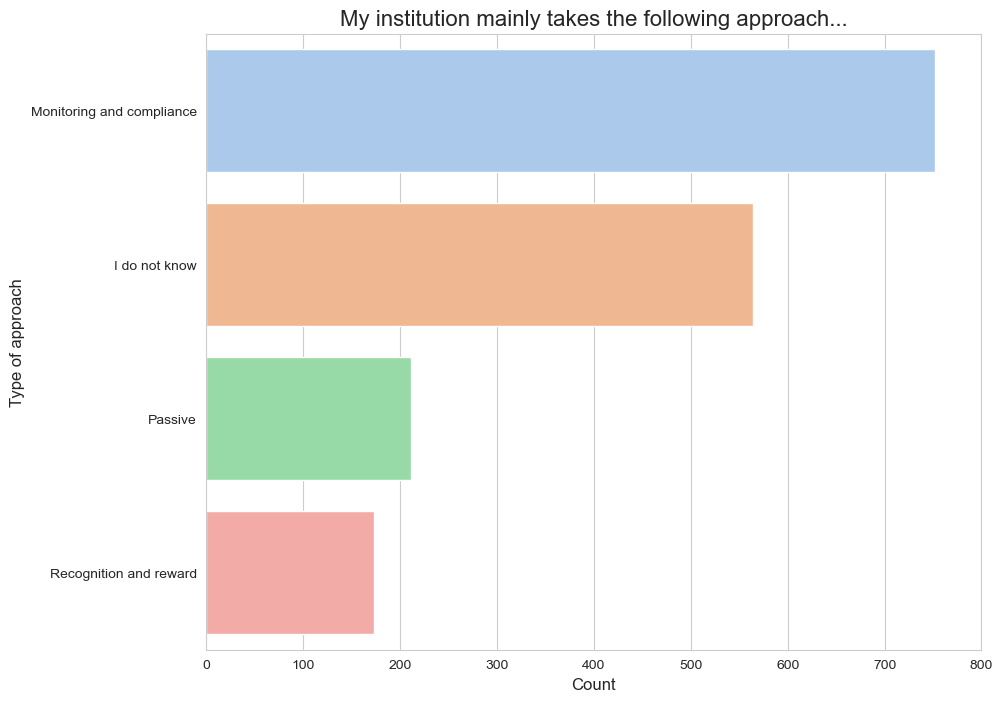

In [105]:
grouped_data = df.groupby('Q2.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q2.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Save the plot
plt.xlim(0, 800)
plt.show
#plt.savefig('../data/plots_test/legal_approach.png', bbox_inches='tight', dpi = 300)

In [106]:
#Display how many particpants haven't given an answer
count = df["Q2.10"].isna().sum()
print(count, "participants have not answered.")

894 participants have not answered.


### Q2.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [107]:
#Count all answers and list them descending
'N=' + (df['Q2.11'].value_counts(sort=True)).astype(str)

I do not know    N=702
Ok               N=579
Very well        N=248
Not very well    N=171
Name: Q2.11, dtype: object

In [108]:
#Display how many particpants haven't given an answer
count = df["Q2.11"].isna().sum()
print(count, "participants have not answered.")

894 participants have not answered.


### Q2.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [109]:
#Count all answers and list them descending
df['Q2.12'].value_counts(sort=True)

None                                                                                                                                                                                                                                                                                      73
no                                                                                                                                                                                                                                                                                        62
No                                                                                                                                                                                                                                                                                        57
-                                                                                                                                                

### Q2.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [110]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q2.13'].value_counts(sort=True)

no                                                                                                                                                                                                                                                                  85
No                                                                                                                                                                                                                                                                  85
None                                                                                                                                                                                                                                                                76
-                                                                                                                                                                                                                  

## 3. Transparent Qualitative Data Practices

### Q3.1 Transparent qualitative data practices are something I think have a [low, medium, high] priority in my field of research:

In [111]:
#Count all answers and list them descending
df['Q3.1'].value_counts(sort=True)

High                      665
Medium                    358
Low                       321
I am not aware of this    226
Name: Q3.1, dtype: int64

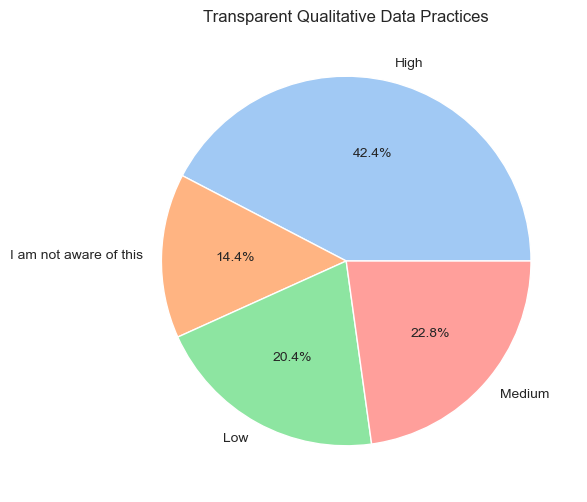

In [112]:
#Plot Transparent Qual

# Group the data by the column
grouped_data = df.groupby('Q3.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q3.1'], autopct='%1.1f%%')

# Add a title
plt.title('Transparent Qualitative Data Practices')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/qual.png', bbox_inches='tight', dpi = 300, transparent=True)

In [113]:
#Display how many particpants haven't given an answer
count = df["Q3.1"].isna().sum()
print(count, "participants have not answered.")

1024 participants have not answered.


### Q3.2 I do this type of activity in my field of research:

In [114]:
print(df['Q3.2_1'].dtype)

object


In [115]:
df['Q3.2_1'] = pd.to_numeric(df['Q3.2_1'], errors='coerce').astype('Int64')

In [116]:
#Count all answers and list them
likert_data = df['Q3.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    405
1    184
2    119
3    164
4    171
5    212
6    315
Name: Q3.2_1, dtype: Int64


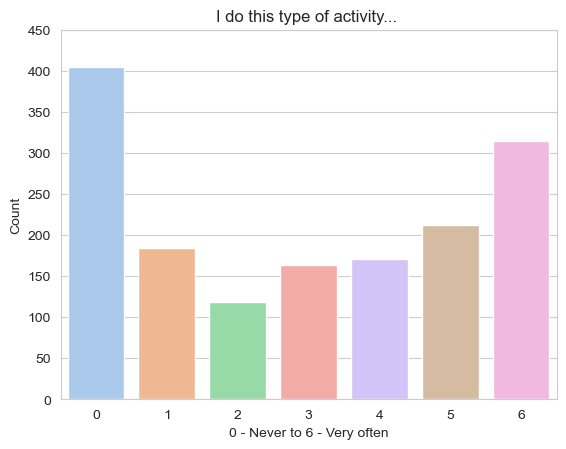

In [117]:
likert_data = df['Q3.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 450)
plt.show()
#plt.savefig('../data/plots_test/qual_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [118]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.8968152866242036
Median: 3.0
Mode: 0
Standard Deviation: 2.305158689014273
Interquartile Range: 5


In [119]:
#Display how many particpants haven't given an answer
count = df["Q3.2_1"].isna().sum()
print(count, "participants have not answered.")

1024 participants have not answered.


### Q3.3 For me, training in this topic is:

In [120]:
print(df['Q3.3_1'].dtype)

object


In [121]:
df['Q3.3_1'] = pd.to_numeric(df['Q3.3_1'], errors='coerce').astype('Int64')

In [122]:
#Count all answers and list them
likert_data = df['Q3.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    326
1    153
2    102
3    212
4    198
5    190
6    389
Name: Q3.3_1, dtype: Int64


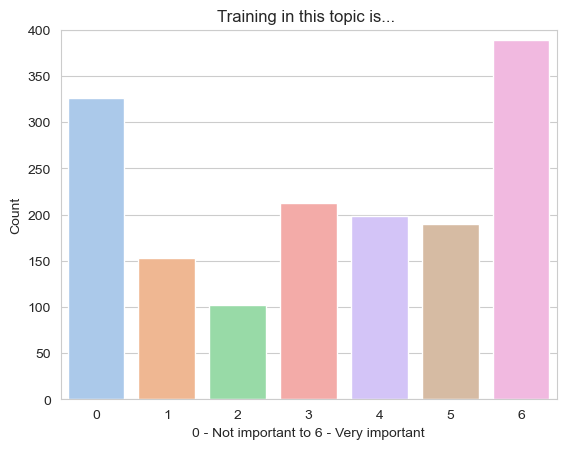

In [123]:
likert_data = df['Q3.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 400)
plt.show()
#plt.savefig('../data/plots_test/qual_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [124]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.2286624203821654
Median: 3.0
Mode: 6
Standard Deviation: 2.2615626265385114
Interquartile Range: 4


In [125]:
#Display how many particpants haven't given an answer
count = df["Q3.3_1"].isna().sum()
print(count, "participants have not answered.")

1024 participants have not answered.


### Q3.4 I have looked for training and support in this topic at my institution:

In [126]:
#Count all answers and list them descending
df['Q3.4'].value_counts(sort=True)

No                    1171
Yes                    325
Yes, but not found      74
Name: Q3.4, dtype: int64

In [127]:
#Display how many particpants haven't given an answer
count = df["Q3.4"].isna().sum()
print(count, "participants have not answered.")

1024 participants have not answered.


### Q3.5 (if Q3.4 was yes) Training at my institution is:

In [128]:
#Show type of df column
print(df['Q3.5_1'].dtype)

object


In [129]:
df['Q3.5_1'] = pd.to_numeric(df['Q3.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q3.5_1']

In [130]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.274760383386582
Median: 4.0
Mode: 5
Standard Deviation: 1.3449461516109802
Interquartile Range: 2


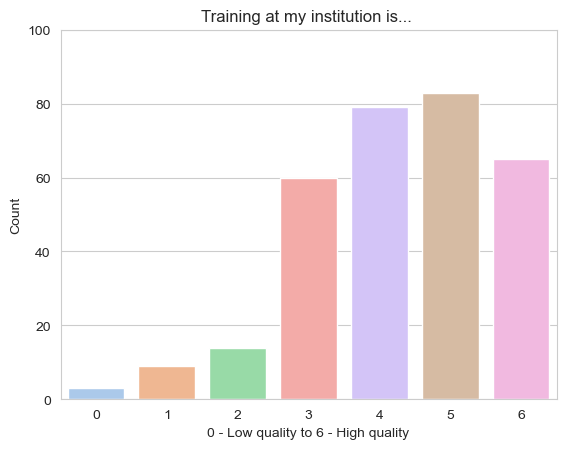

In [131]:
likert_data = df['Q3.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training at my institution is... ')

# Display the plot
plt.ylim(0, 100)
plt.show()
#plt.savefig('../data/plots_test/qual_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [132]:
#Display how many particpants haven't given an answer
count = df["Q3.5_1"].isna().sum()
print(count, "participants have not answered.")

2281 participants have not answered.


### Q3.6 Training in this topic at my institution:

In [133]:
#Count all answers and list them descending
'N=' + (df['Q3.6'].value_counts(sort=True)).astype(str)

At the right level                                        N=80
Infrequent                                                N=68
Frequent                                                  N=57
Frequent,At the right level                               N=53
Infrequent,At the right level                             N=15
At too basic a level                                      N=14
Infrequent,At too basic a level                            N=7
Frequent,At too basic a level                              N=5
Infrequent,At too complex a level                          N=4
At too complex a level                                     N=4
At the right level,At too basic a level                    N=2
Frequent,Infrequent                                        N=1
Frequent,At too complex a level                            N=1
At too complex a level,At the right level                  N=1
Infrequent,At too complex a level,At too basic a level     N=1
Frequent,At too complex a level,At the right level     

In [134]:
#Normalise the count to represent answers in percent
(df['Q3.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                        25.48%
Infrequent                                                21.66%
Frequent                                                  18.15%
Frequent,At the right level                               16.88%
Infrequent,At the right level                              4.78%
At too basic a level                                       4.46%
Infrequent,At too basic a level                            2.23%
Frequent,At too basic a level                              1.59%
Infrequent,At too complex a level                          1.27%
At too complex a level                                     1.27%
At the right level,At too basic a level                    0.64%
Frequent,Infrequent                                        0.32%
Frequent,At too complex a level                            0.32%
At too complex a level,At the right level                  0.32%
Infrequent,At too complex a level,At too basic a level     0.32%
Frequent,At too complex a

In [135]:
#Display how many particpants haven't given an answer
count = df["Q3.6"].isna().sum()
print(count, "participants have not answered.")

2280 participants have not answered.


### Q3.7 The help at my institution on this topic is mainly:

In [136]:
#Count all answers and list them descending
'N=' + (df['Q3.7'].value_counts(sort=True)).astype(str)

Good                                                        N=88
Available                                                   N=45
Good,Available                                              N=28
At the right level                                          N=26
Good,At the right level,Available                           N=21
I do not know                                               N=17
Good,At the right level                                     N=16
Too basic                                                   N=13
Hard to access                                              N=12
Other. Please explain:                                       N=8
Non-existent                                                 N=8
At the right level,Available                                 N=7
Too basic,Available                                          N=4
Hard to access,Other. Please explain:                        N=3
Good,At the right level,Available,Other. Please explain:     N=2
Hard to access,I do not k

In [137]:
#Normalise the count to represent answers in percent
(df['Q3.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        28.03%
Available                                                   14.33%
Good,Available                                               8.92%
At the right level                                           8.28%
Good,At the right level,Available                            6.69%
I do not know                                                5.41%
Good,At the right level                                       5.1%
Too basic                                                    4.14%
Hard to access                                               3.82%
Other. Please explain:                                       2.55%
Non-existent                                                 2.55%
At the right level,Available                                 2.23%
Too basic,Available                                          1.27%
Hard to access,Other. Please explain:                        0.96%
Good,At the right level,Available,Other. Please explain:     0

In [138]:
#Display how many particpants haven't given an answer
count = df["Q3.7"].isna().sum()
print(count, "participants have not answered.")

2280 participants have not answered.


### Q3.7_TEXT

In [139]:
#Count all answers and list them descending
df['Q3.7_8_TEXT'].value_counts(sort=True)

It is very available, but not required or promoted .                                                                                                                                            1
It depnds for what purpose. If you want to deposit an open data set  you need different training than if you want to know how to manage your interview data ethically                           1
Excellent                                                                                                                                                                                       1
as before                                                                                                                                                                                       1
Too general: we often have specific needs that aren't catered for in one-size-fits-all training. Training is good quality and probably good for most, but I often know more than the trainer    1
It’s good but much less freque

### Q3.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [140]:
#Count all answers and list them descending
df['Q3.8'].value_counts(sort=True)

No     1337
Yes     218
Name: Q3.8, dtype: int64

### Q3.9 Where have you looked for training and support?

In [141]:
#Count all answers and list them descending
df['Q3.9'].value_counts(sort=True)

Online                                                                                                         9
online                                                                                                         9
UK Data Service                                                                                                3
NIHR                                                                                                           3
NCRM                                                                                                           3
                                                                                                              ..
Academic papers on the topic; slack channel for transparent research in human-computer interaction research    1
Online resources (e.g. literature)                                                                             1
NOT SURE                                                                                        

### Q3.10 My institution takes mainly the following approach to this topic:

In [142]:
#Count all answers and list them descending
'N=' + (df['Q3.10'].value_counts(sort=True)).astype(str)

I do not know                N=895
Monitoring and compliance    N=271
Passive                      N=243
Recognition and reward       N=113
Name: Q3.10, dtype: object

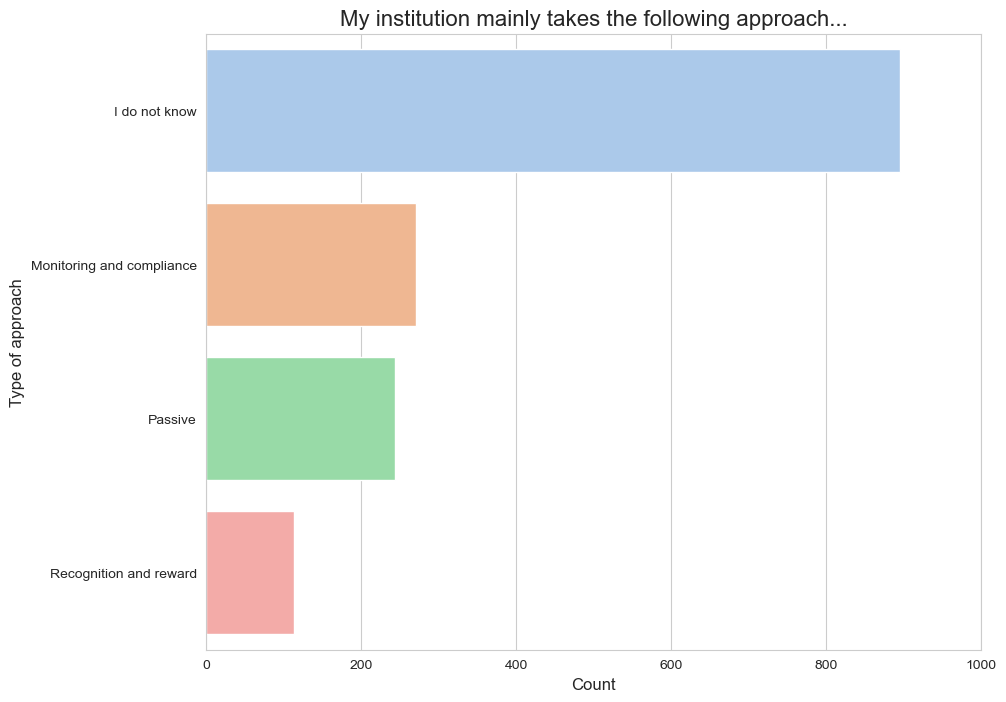

In [143]:
grouped_data = df.groupby('Q3.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q3.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Save the plot
plt.xlim(0, 1000)
plt.show()
#plt.savefig('../data/plots_test/qual_approach.png', bbox_inches='tight', dpi = 300)

In [144]:
#Normalise the count to represent answers in percent
(df['Q3.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                 58.8%
Monitoring and compliance    17.81%
Passive                      15.97%
Recognition and reward        7.42%
Name: Q3.10, dtype: object

In [145]:
#Display how many particpants haven't given an answer
count = df["Q3.10"].isna().sum()
print(count, "participants have not answered.")

1072 participants have not answered.


### Q3.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [146]:
#Count all answers and list them descending
'N=' + (df['Q3.11'].value_counts(sort=True)).astype(str)

I do not know    N=972
Ok               N=302
Not very well    N=131
Very well        N=117
Name: Q3.11, dtype: object

In [147]:
#Display how many particpants haven't given an answer
count = df["Q3.11"].isna().sum()
print(count, "participants have not answered.")

1072 participants have not answered.


### Q3.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [148]:
#Count all answers and list them descending
'N=' + (df['Q3.12'].value_counts(sort=True)).astype(str)

-                                                     N=68
no                                                    N=60
na                                                    N=51
None                                                  N=47
none                                                  N=41
                                                      ... 
nothing                                                N=1
Don't do qualitative research                          N=1
Not clear on how this is done or is useful             N=1
NONE                                                   N=1
I do not currently undertake qualitative research      N=1
Name: Q3.12, Length: 531, dtype: object

### Q3.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [149]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q3.13'].value_counts(sort=True)

no                                                                                                                                78
No                                                                                                                                76
None                                                                                                                              66
-                                                                                                                                 60
na                                                                                                                                50
                                                                                                                                  ..
Not answering                                                                                                                      1
Need more training on this, very little in house.                    

## 4. Defining the Data, Code, or Other Evidence

### Q4.1 Defining the data, code, or other evidence on which your research findings will be based on and how this will be managed and shared before the start of data collection and analysis (e.g., Data Management Plans) is something I think has a [low, medium, high] priority in my field of research:

In [150]:
#Count all answers and list them descending
df['Q4.1'].value_counts(sort=True)

High                      819
Medium                    391
Low                       173
I am not aware of this     60
Name: Q4.1, dtype: int64

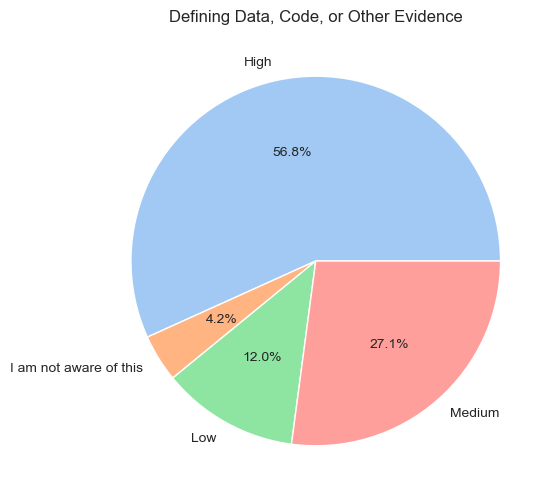

In [151]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q4.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q4.1'], autopct='%1.1f%%')

# Add a title
plt.title('Defining Data, Code, or Other Evidence')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/defining.png', bbox_inches='tight', dpi = 300, transparent=True)

In [152]:
#Display how many particpants haven't given an answer
count = df["Q4.1"].isna().sum()
print(count, "participants have not answered.")

1151 participants have not answered.


### Q4.2 I do this type of activity in my field of research:

In [153]:
print(df['Q4.2_1'].dtype)

object


In [154]:
df['Q4.2_1'] = pd.to_numeric(df['Q4.2_1'], errors='coerce').astype('Int64')

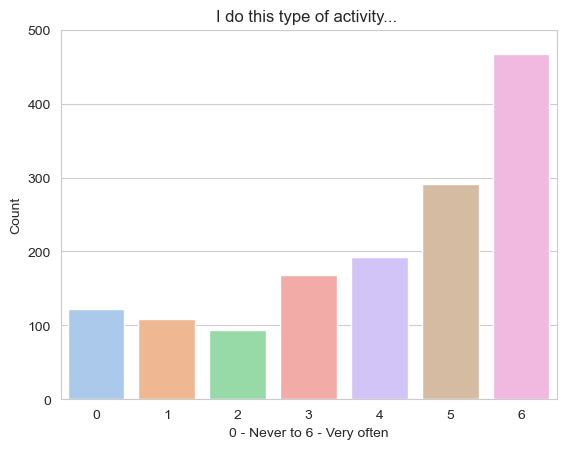

In [155]:
likert_data = df['Q4.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/defining_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [156]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.039501039501039
Median: 5.0
Mode: 6
Standard Deviation: 1.9750082850207096
Interquartile Range: 3


In [157]:
#Display how many particpants haven't given an answer
count = df["Q4.2_1"].isna().sum()
print(count, "participants have not answered.")

1151 participants have not answered.


### Q4.3 For me, training in this topic is:

In [158]:
print(df['Q4.3_1'].dtype)

object


In [159]:
df['Q4.3_1'] = pd.to_numeric(df['Q4.3_1'], errors='coerce').astype('Int64')

In [160]:
#Count all answers and list them
likert_data = df['Q4.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    114
1     95
2     98
3    218
4    251
5    244
6    423
Name: Q4.3_1, dtype: Int64


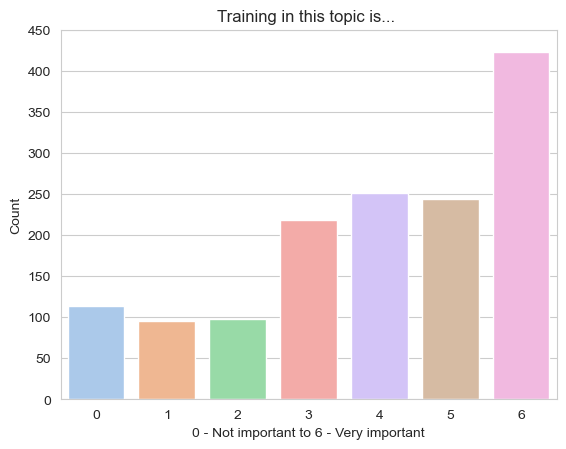

In [161]:
likert_data = df['Q4.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 450)
plt.show()
#plt.savefig('../data/plots_test/defining_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [162]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.954954954954955
Median: 4.0
Mode: 6
Standard Deviation: 1.9030000535821001
Interquartile Range: 3


In [163]:
#Display how many particpants haven't given an answer
count = df["Q4.3_1"].isna().sum()
print(count, "participants have not answered.")

1151 participants have not answered.


### Q4.4 I have looked for training and support in this topic at my institution:

In [164]:
#Count all answers and list them descending
df['Q4.4'].value_counts(sort=True)

No                    828
Yes                   541
Yes, but not found     74
Name: Q4.4, dtype: int64

In [165]:
#Display how many particpants haven't given an answer
count = df["Q4.4"].isna().sum()
print(count, "participants have not answered.")

1151 participants have not answered.


### Q4.5 (if Q4.4 was yes) Training at my institution is:

In [166]:
#Show type of df column
print(df['Q4.5_1'].dtype)

object


In [167]:
df['Q4.5_1'] = pd.to_numeric(df['Q4.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q4.5_1']

In [168]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.095327102803738
Median: 4.0
Mode: 4
Standard Deviation: 1.3685460160501852
Interquartile Range: 2


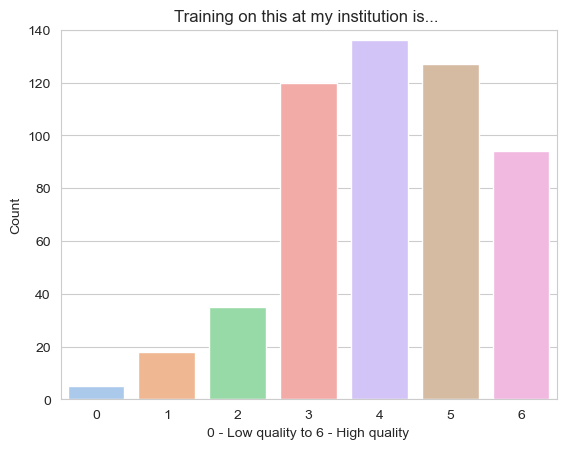

In [169]:
likert_data = df['Q4.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this at my institution is... ')

# Display the plot
plt.ylim(0, 140)
plt.show()
#plt.savefig('../data/plots_test/defining_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [170]:
#Display how many particpants haven't given an answer
count = df["Q4.5_1"].isna().sum()
print(count, "participants have not answered.")

2059 participants have not answered.


### Q4.6 Training in this topic at my institution:

In [171]:
#Count all answers and list them descending
'N=' + (df['Q4.6'].value_counts(sort=True)).astype(str)

At the right level                                    N=155
Frequent,At the right level                            N=91
Infrequent                                             N=90
Frequent                                               N=75
At too basic a level                                   N=30
Infrequent,At the right level                          N=30
Infrequent,At too basic a level                        N=25
Frequent,At too basic a level                          N=13
At too complex a level                                  N=9
Infrequent,At too complex a level                       N=7
Frequent,At too complex a level,At the right level      N=4
Frequent,At too complex a level                         N=3
At too complex a level,At too basic a level             N=1
Frequent,Infrequent                                     N=1
At the right level,At too basic a level                 N=1
Name: Q4.6, dtype: object

In [172]:
#Normalise the count to represent answers in percent
(df['Q4.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                    28.97%
Frequent,At the right level                           17.01%
Infrequent                                            16.82%
Frequent                                              14.02%
At too basic a level                                   5.61%
Infrequent,At the right level                          5.61%
Infrequent,At too basic a level                        4.67%
Frequent,At too basic a level                          2.43%
At too complex a level                                 1.68%
Infrequent,At too complex a level                      1.31%
Frequent,At too complex a level,At the right level     0.75%
Frequent,At too complex a level                        0.56%
At too complex a level,At too basic a level            0.19%
Frequent,Infrequent                                    0.19%
At the right level,At too basic a level                0.19%
Name: Q4.6, dtype: object

In [173]:
#Display how many particpants haven't given an answer
count = df["Q4.6"].isna().sum()
print(count, "participants have not answered.")

2059 participants have not answered.


### Q4.7 The help at my institution on this topic is mainly:

In [174]:
#Count all answers and list them descending
'N=' + (df['Q4.7'].value_counts(sort=True)).astype(str)

Good                                                        N=142
Available                                                    N=70
At the right level                                           N=52
Good,Available                                               N=46
Good,At the right level,Available                            N=44
Too basic                                                    N=30
Hard to access                                               N=28
At the right level,Available                                 N=18
Good,At the right level                                      N=17
I do not know                                                N=16
Other. Please explain:                                       N=15
Non-existent                                                 N=10
Too basic,Hard to access                                      N=9
Too basic,Available                                           N=5
Hard to access,I do not know                                  N=4
Available,

In [175]:
#Normalise the count to represent answers in percent
(df['Q4.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        26.59%
Available                                                   13.11%
At the right level                                           9.74%
Good,Available                                               8.61%
Good,At the right level,Available                            8.24%
Too basic                                                    5.62%
Hard to access                                               5.24%
At the right level,Available                                 3.37%
Good,At the right level                                      3.18%
I do not know                                                 3.0%
Other. Please explain:                                       2.81%
Non-existent                                                 1.87%
Too basic,Hard to access                                     1.69%
Too basic,Available                                          0.94%
Hard to access,I do not know                                 0

In [176]:
#Display how many particpants haven't given an answer
count = df["Q4.7"].isna().sum()
print(count, "participants have not answered.")

2060 participants have not answered.


### Q4.7_TEXT

In [177]:
#Count all answers and list them descending
df['Q4.7_8_TEXT'].value_counts(sort=True)

The data management training at my institution is good in some respects (ethical compliance, GDPR, etc.) but poor in others. No comprehensive approach to making the data open (or open as a synthetic version if needed).                                                               1
High level                                                                                                                                                                                                                                                                               1
More support for part-time students would be useful.                                                                                                                                                                                                                                     1
0\t\t  1  \t\t2\t\t3\t\t4\t\t5\t\t6                                                                                                                    

### Q4.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [178]:
#Count all answers and list them descending
df['Q4.8'].value_counts(sort=True)

No     1195
Yes     242
Name: Q4.8, dtype: int64

### Q4.9 Where have you looked for training and support?

In [179]:
#Count all answers and list them descending
df['Q4.9'].value_counts(sort=True)

online                                     13
Internet                                    4
Previous institution                        4
Online                                      4
internet                                    3
                                           ..
UKRI FLFDN                                  1
Research council and other institutions     1
LSHTM                                       1
Other universities                          1
University College London                   1
Name: Q4.9, Length: 204, dtype: int64

### Q4.10 My institution takes mainly the following approach to this topic:

In [180]:
#Count all answers and list them descending
'N=' + (df['Q4.10'].value_counts(sort=True)).astype(str)

I do not know                N=552
Monitoring and compliance    N=483
Passive                      N=280
Recognition and reward       N=100
Name: Q4.10, dtype: object

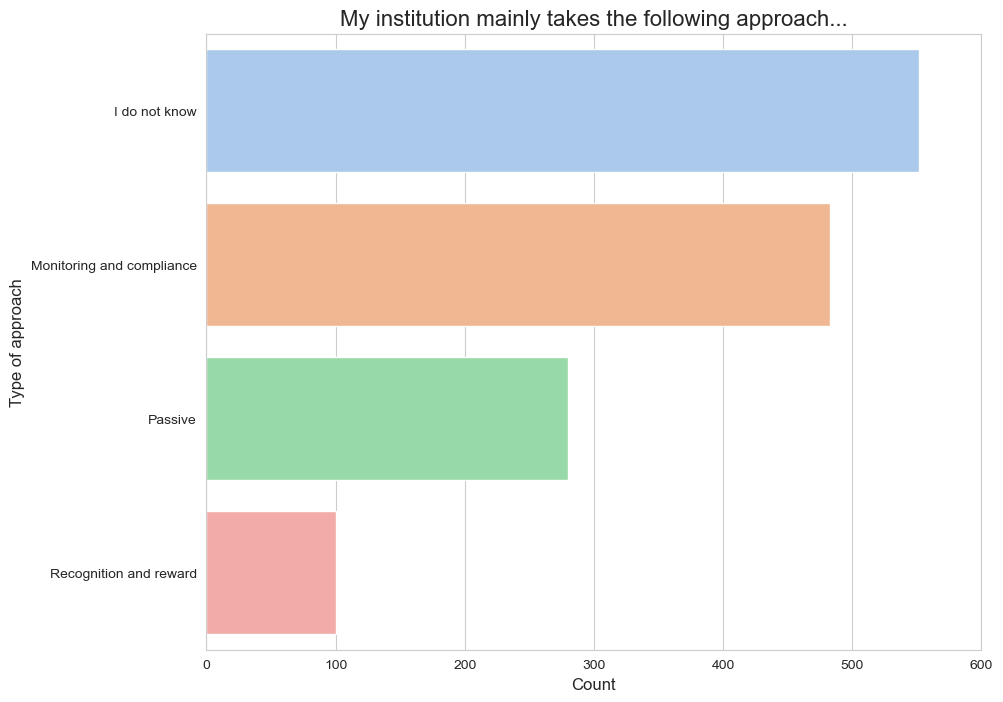

In [181]:
grouped_data = df.groupby('Q4.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q4.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Save the plot
plt.xlim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/defining_approach.png', bbox_inches='tight', dpi = 300)

In [182]:
#Normalise the count to represent answers in percent
(df['Q4.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                39.01%
Monitoring and compliance    34.13%
Passive                      19.79%
Recognition and reward        7.07%
Name: Q4.10, dtype: object

In [183]:
#Display how many particpants haven't given an answer
count = df["Q4.10"].isna().sum()
print(count, "participants have not answered.")

1179 participants have not answered.


### Q4.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [184]:
#Count all answers and list them descending
'N=' + (df['Q4.11'].value_counts(sort=True)).astype(str)

I do not know    N=654
Ok               N=427
Not very well    N=171
Very well        N=163
Name: Q4.11, dtype: object

In [185]:
#Display how many particpants haven't given an answer
count = df["Q4.11"].isna().sum()
print(count, "participants have not answered.")

1179 participants have not answered.


### Q4.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [186]:
#Count all answers and list them descending
'N=' + (df['Q4.12'].value_counts(sort=True)).astype(str)

-                            N=63
None                         N=53
no                           N=52
na                           N=48
none                         N=42
                             ... 
Data protection               N=1
It doesn't.                   N=1
Core business for my work     N=1
answer                        N=1
none known                    N=1
Name: Q4.12, Length: 521, dtype: object

### Q4.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [187]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q4.13'].value_counts(sort=True)

no                                                                                                                                                   76
No                                                                                                                                                   70
-                                                                                                                                                    61
None                                                                                                                                                 61
none                                                                                                                                                 57
                                                                                                                                                     ..
It is not directly relevant to my research.                                             

## 5. Pre-registration

### Q5.1 Pre-registration of research protocols (may include registered reports) is something I think has a [low, medium, high] priority in my field of research:

In [188]:
#Count all answers and list them descending
df['Q5.1'].value_counts(sort=True)

Low                       467
High                      317
Medium                    298
I am not aware of this    288
Name: Q5.1, dtype: int64

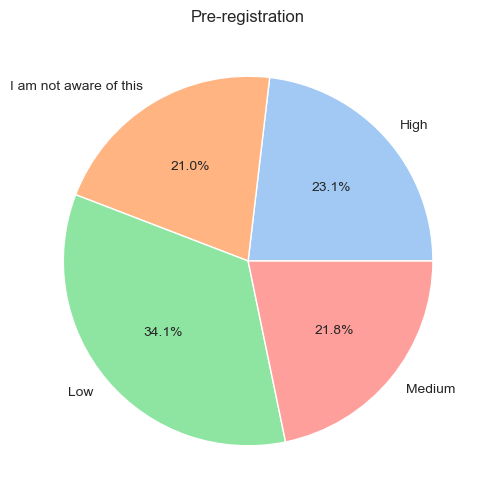

In [189]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q5.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q5.1'], autopct='%1.1f%%')

# Add a title
plt.title('Pre-registration')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/prereg.png', bbox_inches='tight', dpi = 300, transparent=True)

In [190]:
#Display how many particpants haven't given an answer
count = df["Q5.1"].isna().sum()
print(count, "participants have not answered.")

1224 participants have not answered.


### Q5.2 I do this type of activity in my field of research:

In [191]:
print(df['Q5.2_1'].dtype)

object


In [192]:
df['Q5.2_1'] = pd.to_numeric(df['Q5.2_1'], errors='coerce').astype('Int64')

In [193]:
#Count all answers and list them
likert_data = df['Q5.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    525
1    194
2     81
3    107
4     95
5    119
6    156
Name: Q5.2_1, dtype: Int64


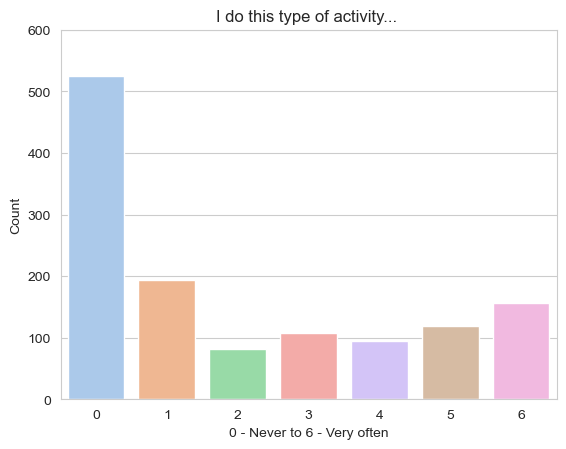

In [194]:
likert_data = df['Q5.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/prereg_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [195]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean:f}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std:f}")
print(f"Interquartile Range: {iqr}")

Mean: 2.026625
Median: 1.0
Mode: 0
Standard Deviation: 2.230294
Interquartile Range: 4


In [196]:
#Display how many particpants haven't given an answer
count = df["Q5.2_1"].isna().sum()
print(count, "participants have not answered.")

1317 participants have not answered.


### Q5.3 For me, training in this topic is:

In [197]:
print(df['Q5.3_1'].dtype)

object


In [198]:
df['Q5.3_1'] = pd.to_numeric(df['Q5.3_1'], errors='coerce').astype('Int64')

In [199]:
#Count all answers and list them
likert_data = df['Q5.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    385
1    166
2    106
3    217
4    135
5    118
6    178
Name: Q5.3_1, dtype: Int64


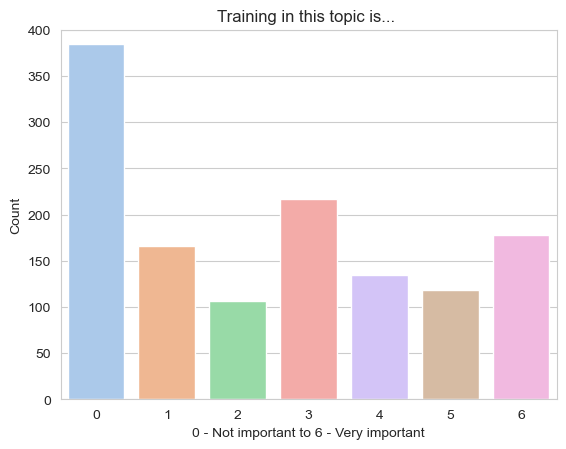

In [200]:
likert_data = df['Q5.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 400)
plt.show()
#plt.savefig('../data/plots_test/prereg_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [201]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.4727969348659005
Median: 2.0
Mode: 0
Standard Deviation: 2.159528090346762
Interquartile Range: 4


In [202]:
#Display how many particpants haven't given an answer
count = df["Q5.3_1"].isna().sum()
print(count, "participants have not answered.")

1289 participants have not answered.


### Q5.4 I have looked for training and support in this topic at my institution:

In [203]:
#Count all answers and list them descending
'N=' + (df['Q5.4'].value_counts(sort=True)).astype(str)

No                    N=1199
Yes                    N=132
Yes, but not found      N=38
Name: Q5.4, dtype: object

In [204]:
#Display how many particpants haven't given an answer
count = df["Q5.4"].isna().sum()
print(count, "participants have not answered.")

1225 participants have not answered.


### Q5.5 (if Q5.4 was yes) Training at my institution is:

In [205]:
#Show type of df column
print(df['Q5.5_1'].dtype)

object


In [206]:
df['Q5.5_1'] = pd.to_numeric(df['Q5.5_1'], errors='coerce').astype('Int64')
likert_data = df['Q5.5_1']

In [207]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.333333333333333
Median: 5.0
Mode: 6
Standard Deviation: 1.614930339054908
Interquartile Range: 3


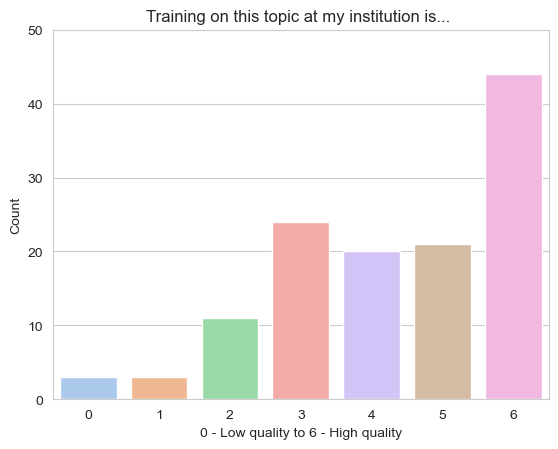

In [208]:
likert_data = df['Q5.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=True)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 50)
plt.show()
#plt.savefig('../data/plots_test/prereg_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [209]:
#Display how many particpants haven't given an answer
count = df["Q5.5_1"].isna().sum()
print(count, "participants have not answered.")

2468 participants have not answered.


### Q5.6 Training in this topic at my institution:

In [210]:
#Count all answers and list them descending
'N=' + (df['Q5.6'].value_counts(sort=True)).astype(str)

At the right level                 N=37
Infrequent                         N=23
Frequent,At the right level        N=23
Frequent                           N=21
Infrequent,At too basic a level     N=8
Infrequent,At the right level       N=7
At too complex a level              N=5
At too basic a level                N=3
Frequent,At too basic a level       N=2
Name: Q5.6, dtype: object

In [211]:
#Normalise the count to represent answers in percent
(df['Q5.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                 28.68%
Infrequent                         17.83%
Frequent,At the right level        17.83%
Frequent                           16.28%
Infrequent,At too basic a level      6.2%
Infrequent,At the right level       5.43%
At too complex a level              3.88%
At too basic a level                2.33%
Frequent,At too basic a level       1.55%
Name: Q5.6, dtype: object

In [212]:
#Display how many particpants haven't given an answer
count = df["Q5.6"].isna().sum()
print(count, "participants have not answered.")

2465 participants have not answered.


### Q5.7 The help at my institution on this topic is mainly:

In [213]:
#Count all answers and list them descending
'N=' + (df['Q5.7'].value_counts(sort=True)).astype(str)

Good                                                        N=29
Available                                                   N=16
Good,At the right level,Available                           N=13
At the right level                                          N=12
Good,Available                                              N=11
Non-existent                                                N=10
I do not know                                                N=6
Too basic                                                    N=6
Hard to access                                               N=3
At the right level,Available                                 N=3
Hard to access,I do not know                                 N=3
Good,At the right level                                      N=3
Good,Too basic                                               N=3
Good,At the right level,Available,Other. Please explain:     N=2
Available,Other. Please explain:                             N=2
Too basic,Other. Please e

In [214]:
#Normalise the count to represent answers in percent
(df['Q5.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        22.48%
Available                                                    12.4%
Good,At the right level,Available                           10.08%
At the right level                                            9.3%
Good,Available                                               8.53%
Non-existent                                                 7.75%
I do not know                                                4.65%
Too basic                                                    4.65%
Hard to access                                               2.33%
At the right level,Available                                 2.33%
Hard to access,I do not know                                 2.33%
Good,At the right level                                      2.33%
Good,Too basic                                               2.33%
Good,At the right level,Available,Other. Please explain:     1.55%
Available,Other. Please explain:                             1

In [215]:
#Display how many particpants haven't given an answer
count = df["Q5.7"].isna().sum()
print(count, "participants have not answered.")

2465 participants have not answered.


### Q5.7_TEXT

In [216]:
#Count all answers and list them descending
df['Q5.7_8_TEXT'].value_counts(sort=True)

The timing of relevant training didn’t work well for me                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1
Excellent                                                                                                                                                                                                                                                     

### Q5.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [217]:
#Count all answers and list them descending
df['Q5.8'].value_counts(sort=True)

No     1263
Yes     100
Name: Q5.8, dtype: int64

### Q5.9 Where have you looked for training and support?

In [218]:
#Count all answers and list them descending
'N=' + (df['Q5.9'].value_counts(sort=True)).astype(str)

online                                         N=6
OSF                                            N=4
Internet                                       N=3
Twitter                                        N=2
RQA                                            N=2
                                              ... 
UKRN, OSF website                              N=1
Open Science Framework, papers on the topic    N=1
OSF websites                                   N=1
internet; examples from others                 N=1
Online service-specific training               N=1
Name: Q5.9, Length: 84, dtype: object

### Q5.10 My institution takes mainly the following approach to this topic:

In [219]:
#Count all answers and list them descending
'N=' + (df['Q5.10'].value_counts(sort=True)).astype(str)

I do not know                N=867
Passive                      N=247
Monitoring and compliance    N=160
Recognition and reward        N=74
Name: Q5.10, dtype: object

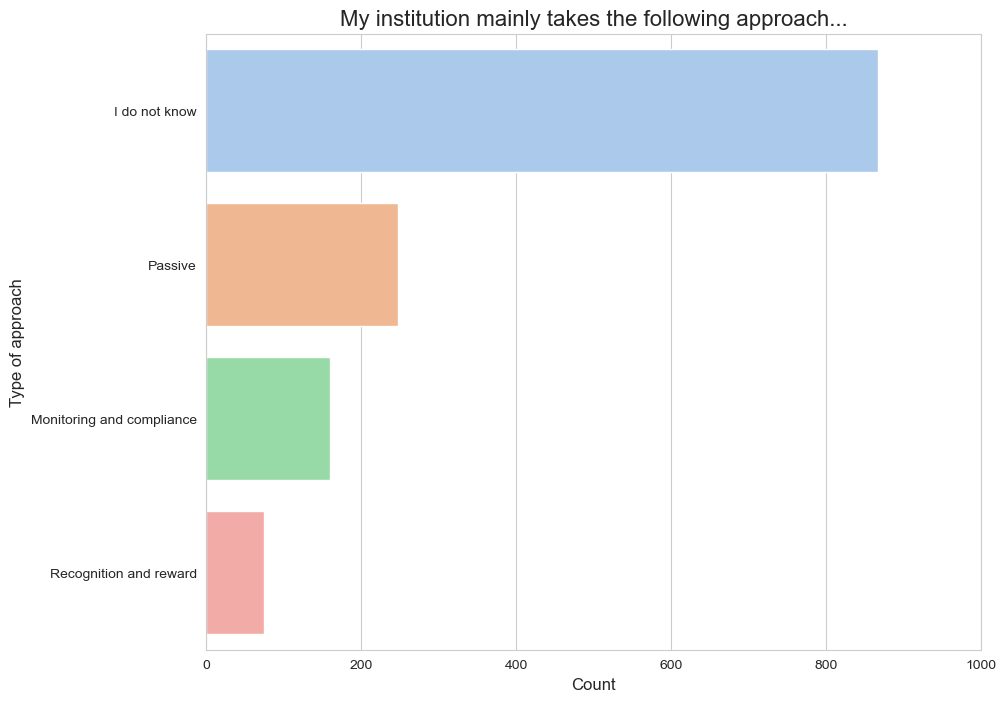

In [220]:
grouped_data = df.groupby('Q5.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q5.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

#Save the plot
plt.xlim(0, 1000)
plt.show()
#plt.savefig('../data/plots_test/prereg_approach.png', bbox_inches='tight', dpi = 300)

In [221]:
#Normalise the count to represent answers in percent
(df['Q5.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                64.32%
Passive                      18.32%
Monitoring and compliance    11.87%
Recognition and reward        5.49%
Name: Q5.10, dtype: object

In [222]:
#Display how many particpants haven't given an answer
count = df["Q5.10"].isna().sum()
print(count, "participants have not answered.")

1246 participants have not answered.


### Q5.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [223]:
#Count all answers and list them descending
'N=' + (df['Q5.11'].value_counts(sort=True)).astype(str)

I do not know    N=932
Ok               N=211
Not very well    N=121
Very well         N=84
Name: Q5.11, dtype: object

In [224]:
#Display how many particpants haven't given an answer
count = df["Q4.11"].isna().sum()
print(count, "participants have not answered.")

1179 participants have not answered.


### Q5.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [225]:
#Count all answers and list them descending
df['Q5.12'].value_counts(sort=True)

-                                                                                                                                                                                                                                                                  58
None                                                                                                                                                                                                                                                               51
na                                                                                                                                                                                                                                                                 46
no                                                                                                                                                                                                                    

### Q5.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [226]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q5.13'].value_counts(sort=True)

no                                                                                                60
None                                                                                              56
No                                                                                                55
-                                                                                                 52
na                                                                                                50
                                                                                                  ..
Not relevant to me                                                                                 1
kkk                                                                                                1
Good.                                                                                              1
I understand why it is important but sometimes things happen that are completely unpredicta

## 6. Open Source Software created by others

### Q6.1 Using open source software created by others is something I think has a [low, medium, high] priority in my field of research:

In [227]:
#Count all answers and list them descending
df['Q6.1'].value_counts(sort=True)

High                      541
Medium                    366
Low                       270
I am not aware of this    149
Name: Q6.1, dtype: int64

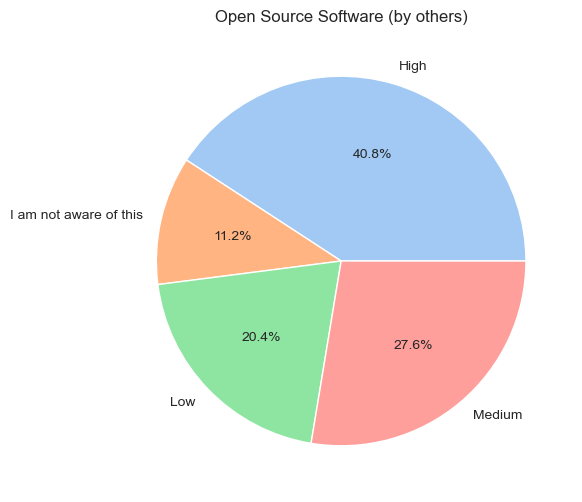

In [228]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q6.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q6.1'], autopct='%1.1f%%')

# Add a title
plt.title('Open Source Software (by others)')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/opensource_others.png', bbox_inches='tight', dpi = 300, transparent=True)

In [229]:
#Display how many particpants haven't given an answer
count = df["Q6.1"].isna().sum()
print(count, "participants have not answered.")

1268 participants have not answered.


### Q6.2 I do this type of activity in my field of research:

In [230]:
print(df['Q6.2_1'].dtype)

object


In [231]:
df['Q6.2_1'] = pd.to_numeric(df['Q6.2_1'], errors='coerce').astype('Int64')

In [232]:
#Count all answers and list them
likert_data = df['Q6.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    296
1    164
2    100
3    157
4    128
5    132
6    348
Name: Q6.2_1, dtype: Int64


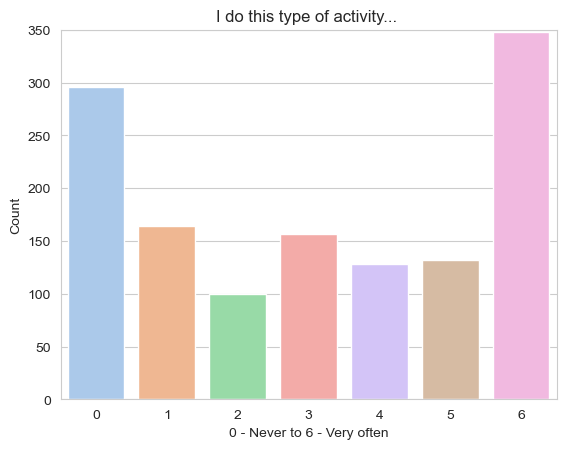

In [233]:
likert_data = df['Q6.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/OSothers_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [234]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.090566037735849
Median: 3.0
Mode: 6
Standard Deviation: 2.331501739033792
Interquartile Range: 5


In [235]:
#Display how many particpants haven't given an answer
count = df["Q6.2_1"].isna().sum()
print(count, "participants have not answered.")

1269 participants have not answered.


### Q6.3 For me, training in this topic is:

In [236]:
print(df['Q6.3_1'].dtype)

object


In [237]:
df['Q6.3_1'] = pd.to_numeric(df['Q6.3_1'], errors='coerce').astype('Int64')

In [238]:
#Count all answers and list them
likert_data = df['Q6.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    270
1    162
2    109
3    216
4    169
5    139
6    260
Name: Q6.3_1, dtype: Int64


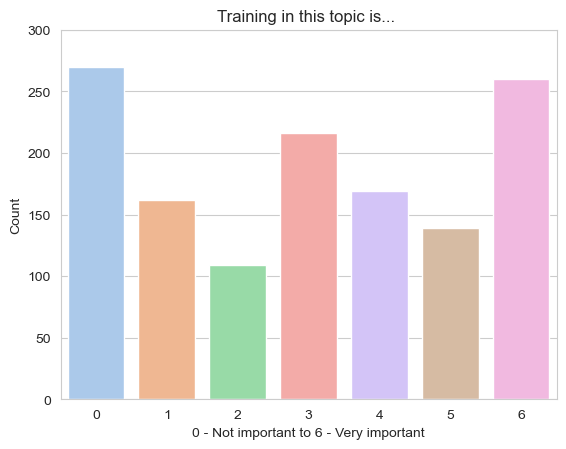

In [239]:
likert_data = df['Q6.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/OSothers_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [240]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.9879245283018867
Median: 3.0
Mode: 0
Standard Deviation: 2.172995272317504
Interquartile Range: 4


In [241]:
#Display how many particpants haven't given an answer
count = df["Q6.3_1"].isna().sum()
print(count, "participants have not answered.")

1269 participants have not answered.


### Q6.4 I have looked for training and support in this topic at my institution:

In [242]:
#Count all answers and list them descending
'N=' + (df['Q6.4'].value_counts(sort=True)).astype(str)

No                    N=1031
Yes                    N=244
Yes, but not found      N=51
Name: Q6.4, dtype: object

In [243]:
#Display how many particpants haven't given an answer
count = df["Q6.4"].isna().sum()
print(count, "participants have not answered.")

1268 participants have not answered.


### Q6.5 (if Q6.4 was yes) Training at my institution is:

In [244]:
#Show type of df column
print(df['Q6.5_1'].dtype)

object


In [245]:
df['Q6.5_1'] = pd.to_numeric(df['Q6.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q6.5_1']

In [246]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode()

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.9382716049382718
Median: 4.0
Mode: 0    5
Name: Q6.5_1, dtype: Int64
Standard Deviation: 1.661516376605292
Interquartile Range: 2


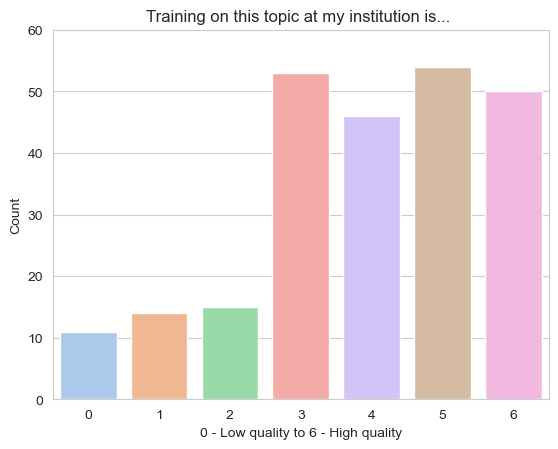

In [247]:
likert_data = df['Q6.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 60)
plt.show()
#plt.savefig('../data/plots_test/OSothers_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [248]:
#Display how many particpants haven't given an answer
count = df["Q6.5_1"].isna().sum()
print(count, "participants have not answered.")

2351 participants have not answered.


### Q6.6 Training in this topic at my institution:

In [249]:
#Count all answers and list them descending
'N=' + (df['Q6.6'].value_counts(sort=True)).astype(str)

Infrequent                                                        N=54
At the right level                                                N=52
Frequent                                                          N=38
Frequent,At the right level                                       N=34
At too basic a level                                              N=17
Infrequent,At the right level                                     N=16
Infrequent,At too basic a level                                   N=11
Frequent,At too basic a level                                      N=5
Infrequent,At too complex a level                                  N=4
At too complex a level                                             N=4
Infrequent,At too complex a level,At too basic a level             N=3
At too complex a level,At too basic a level                        N=2
Frequent,At too complex a level                                    N=2
At too complex a level,At the right level,At too basic a level     N=1
Name: 

In [250]:
#Normalise the count to represent answers in percent
(df['Q6.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                                        22.22%
At the right level                                                 21.4%
Frequent                                                          15.64%
Frequent,At the right level                                       13.99%
At too basic a level                                                7.0%
Infrequent,At the right level                                      6.58%
Infrequent,At too basic a level                                    4.53%
Frequent,At too basic a level                                      2.06%
Infrequent,At too complex a level                                  1.65%
At too complex a level                                             1.65%
Infrequent,At too complex a level,At too basic a level             1.23%
At too complex a level,At too basic a level                        0.82%
Frequent,At too complex a level                                    0.82%
At too complex a level,At the right level,At too ba

In [251]:
#Display how many particpants haven't given an answer
count = df["Q6.6"].isna().sum()
print(count, "participants have not answered.")

2351 participants have not answered.


### Q6.7 The help at my institution on this topic is mainly:

In [252]:
#Count all answers and list them descending
'N=' + (df['Q6.7'].value_counts(sort=True)).astype(str)

Good                                                        N=55
Available                                                   N=26
At the right level                                          N=23
I do not know                                               N=19
Hard to access                                              N=18
Too basic                                                   N=17
Good,At the right level,Available                           N=17
Good,Available                                              N=14
Non-existent                                                N=12
At the right level,Available                                 N=8
Too basic,Hard to access                                     N=4
Good,Hard to access                                          N=3
Good,At the right level                                      N=3
Too basic,Available                                          N=3
Good,Other. Please explain:                                  N=2
Non-existent,Hard to acce

In [253]:
#Normalise the count to represent answers in percent
(df['Q6.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        22.63%
Available                                                    10.7%
At the right level                                           9.47%
I do not know                                                7.82%
Hard to access                                               7.41%
Too basic                                                     7.0%
Good,At the right level,Available                             7.0%
Good,Available                                               5.76%
Non-existent                                                 4.94%
At the right level,Available                                 3.29%
Too basic,Hard to access                                     1.65%
Good,Hard to access                                          1.23%
Good,At the right level                                      1.23%
Too basic,Available                                          1.23%
Good,Other. Please explain:                                  0

In [254]:
#Display how many particpants haven't given an answer
count = df["Q6.7"].isna().sum()
print(count, "participants have not answered.")

2351 participants have not answered.


### Q6.7_TEXT

In [255]:
#Count all answers and list them descending
df['Q6.7_8_TEXT'].value_counts(sort=True)

Excellent                                                                                                                         1
Training in specific area was unavailable                                                                                         1
It's a while since i sought support                                                                                               1
Too complex                                                                                                                       1
There aren't enough courses, and they are often self-led. I want a teacher present, I can self teach myself from the internet!    1
Not broad enough in the operating systems it targets (leans towards Ubuntu Linux).                                                1
more frequent training opportunities would be good                                                                                1
Personal responsibility rests with individual researchers                   

### Q6.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [256]:
#Count all answers and list them descending
df['Q6.8'].value_counts(sort=True)

No     1049
Yes     275
Name: Q6.8, dtype: int64

### Q6.9 Where have you looked for training and support?

In [257]:
#Count all answers and list them descending
df['Q6.9'].value_counts(sort=True)

online                                                                                                                                                                              22
Online                                                                                                                                                                              12
Internet                                                                                                                                                                             7
Online resources                                                                                                                                                                     3
youtube                                                                                                                                                                              2
                                                                                     

### Q6.10 My institution takes mainly the following approach to this topic:

In [258]:
#Count all answers and list them descending
'N=' + (df['Q6.10'].value_counts(sort=True)).astype(str)

I do not know                N=800
Passive                      N=344
Monitoring and compliance    N=109
Recognition and reward        N=64
Name: Q6.10, dtype: object

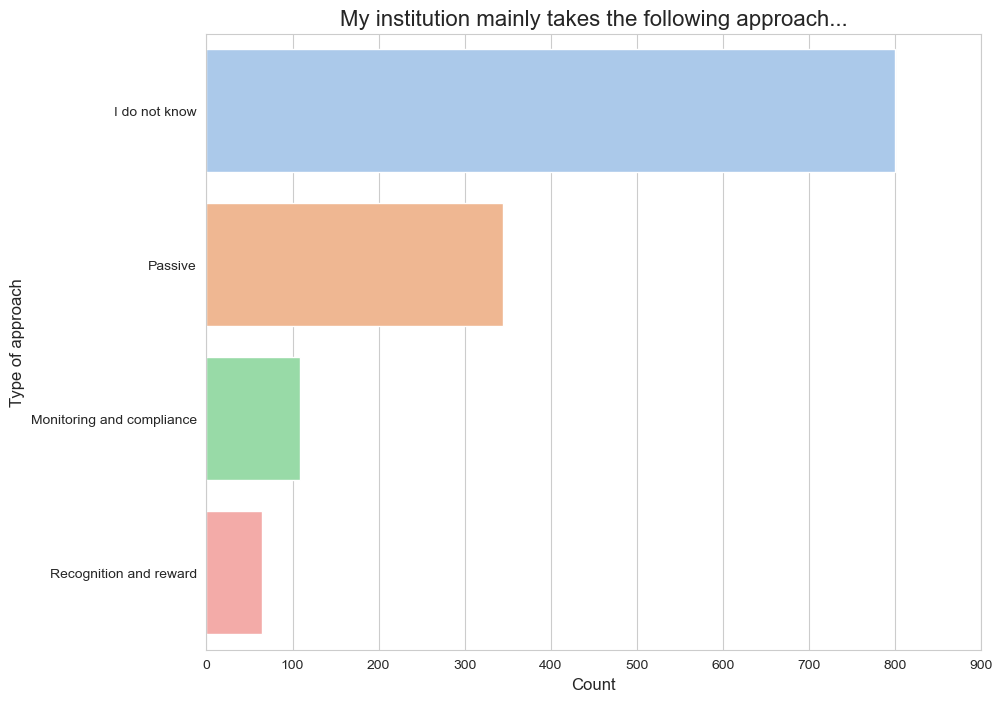

In [614]:
grouped_data = df.groupby('Q6.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q6.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)
          

#Show the plot
plt.xlim(0, 900)
plt.show()
#plt.savefig('../data/plots_test/OSothers_approach.png', bbox_inches='tight', dpi = 300)

In [260]:
#Normalise the count to represent answers in percent
(df['Q6.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                60.74%
Passive                      26.12%
Monitoring and compliance     8.28%
Recognition and reward        4.86%
Name: Q6.10, dtype: object

In [261]:
#Display how many particpants haven't given an answer
count = df["Q6.10"].isna().sum()
print(count, "participants have not answered.")

1277 participants have not answered.


### Q6.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [262]:
#Count all answers and list them descending
'N=' + (df['Q6.11'].value_counts(sort=True)).astype(str)

I do not know    N=877
Ok               N=234
Not very well    N=139
Very well         N=67
Name: Q6.11, dtype: object

In [263]:
#Display how many particpants haven't given an answer
count = df["Q6.11"].isna().sum()
print(count, "participants have not answered.")

1277 participants have not answered.


### Q6.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [264]:
#Count all answers and list them descending
df['Q6.12'].value_counts(sort=True)

-                                                                                                                             66
None                                                                                                                          58
na                                                                                                                            49
no                                                                                                                            45
No                                                                                                                            43
                                                                                                                              ..
All grant funded outputs like models are systematically made available as open source. It is usually quite straightforward     1
Not relevant to me                                                                               

### Q6.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [265]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q6.13'].value_counts(sort=True)

no                                                                          66
No                                                                          64
-                                                                           64
None                                                                        58
none                                                                        47
                                                                            ..
Need to embed training in software development in data science courses       1
Don't picture in any research recognition                                    1
NONE                                                                         1
No further comments.                                                         1
I regularly use both free and licensed software to undertake my research     1
Name: Q6.13, Length: 430, dtype: int64

## 7. Creating own Open Source Software

### Q7.1 Creating my own open source software/analysis code to share with others is something I think has a [low, medium, high] priority in my field of research:

In [266]:
#Count all answers and list them descending
df['Q7.1'].value_counts(sort=True)

Low                       482
High                      304
Medium                    294
I am not aware of this    209
Name: Q7.1, dtype: int64

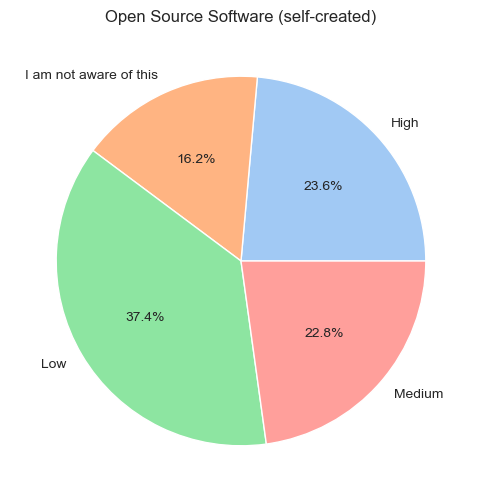

In [267]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q7.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q7.1'], autopct='%1.1f%%')

# Add a title
plt.title('Open Source Software (self-created)')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/opensource_self.png', bbox_inches='tight', dpi = 300, transparent=True)

In [268]:
#Display how many particpants haven't given an answer
count = df["Q7.1"].isna().sum()
print(count, "participants have not answered.")

1305 participants have not answered.


### Q7.2 I do this type of activity in my field of research:

In [269]:
print(df['Q7.2_1'].dtype)

object


In [270]:
df['Q7.2_1'] = pd.to_numeric(df['Q7.2_1'], errors='coerce').astype('Int64')

In [271]:
#Count all answers and list them
likert_data = df['Q7.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    603
1    191
2     78
3    103
4     88
5     65
6    160
Name: Q7.2_1, dtype: Int64


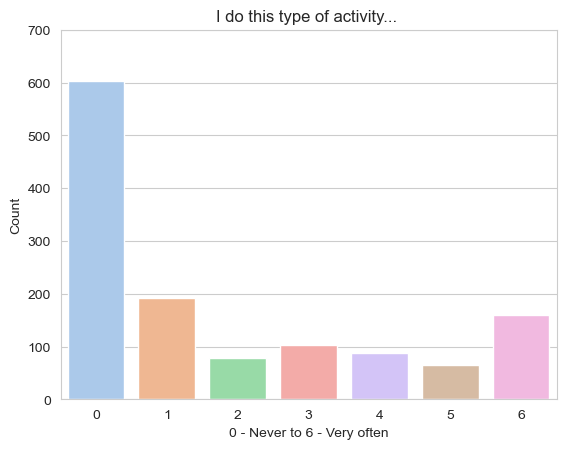

In [272]:
likert_data = df['Q7.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/OSself_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [273]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 1.78027950310559
Median: 1.0
Mode: 0
Standard Deviation: 2.1843583066059935
Interquartile Range: 3


In [274]:
#Display how many particpants haven't given an answer
count = df["Q7.2_1"].isna().sum()
print(count, "participants have not answered.")

1306 participants have not answered.


### Q7.3 For me, training in this topic is:

In [275]:
print(df['Q7.3_1'].dtype)

object


In [276]:
df['Q7.3_1'] = pd.to_numeric(df['Q7.3_1'], errors='coerce').astype('Int64')

In [277]:
#Count all answers and list them
likert_data = df['Q7.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    478
1    176
2     82
3    154
4    133
5     99
6    166
Name: Q7.3_1, dtype: Int64


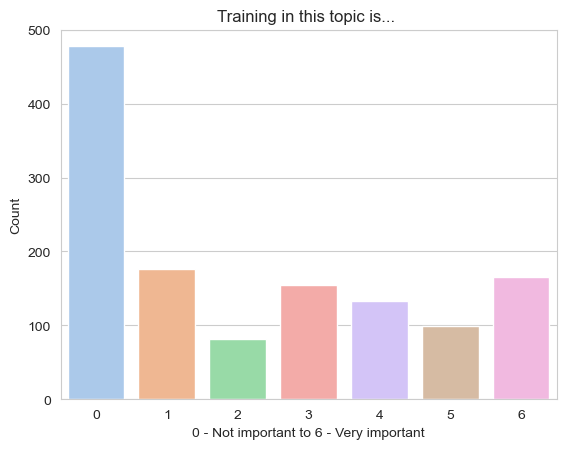

In [278]:
likert_data = df['Q7.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/OSself_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [279]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.1933229813664594
Median: 1.0
Mode: 0
Standard Deviation: 2.2077180745840677
Interquartile Range: 4


In [280]:
#Display how many particpants haven't given an answer
count = df["Q7.3_1"].isna().sum()
print(count, "participants have not answered.")

1306 participants have not answered.


### Q7.4 I have looked for training and support in this topic at my institution:

In [281]:
#Count all answers and list them descending
'N=' + (df['Q7.4'].value_counts(sort=True)).astype(str)

No                    N=1126
Yes                    N=130
Yes, but not found      N=33
Name: Q7.4, dtype: object

In [282]:
#Display how many particpants haven't given an answer
count = df["Q7.4"].isna().sum()
print(count, "participants have not answered.")

1305 participants have not answered.


### Q7.5 (if Q7.4 was yes) Training at my institution is:

In [283]:
#Show type of df column
print(df['Q7.5_1'].dtype)

object


In [284]:
df['Q7.5_1'] = pd.to_numeric(df['Q7.5_1'], errors='coerce').astype('Int64')
likert_data = df['Q7.5_1']

In [285]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.891472868217054
Median: 4.0
Mode: 4
Standard Deviation: 1.5823257708074026
Interquartile Range: 2


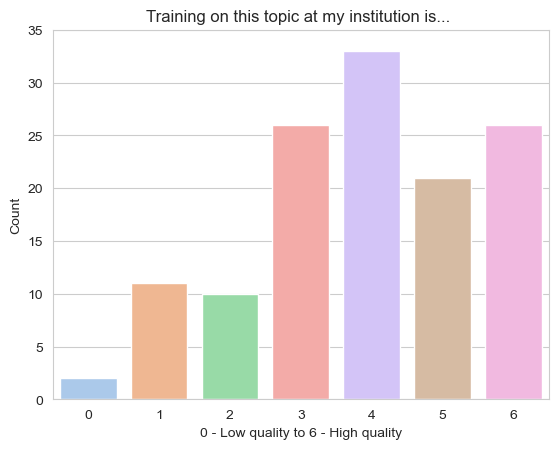

In [286]:
likert_data = df['Q7.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 35)
plt.show()
#plt.savefig('../data/plots_test/OSself_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [287]:
#Display how many particpants haven't given an answer
count = df["Q7.5_1"].isna().sum()
print(count, "participants have not answered.")

2465 participants have not answered.


### Q7.6 Training in this topic at my institution:

In [288]:
#Count all answers and list them descending
'N=' + (df['Q7.6'].value_counts(sort=True)).astype(str)

Infrequent                                                                   N=34
Frequent,At the right level                                                  N=22
At the right level                                                           N=20
Frequent                                                                     N=15
Infrequent,At the right level                                                 N=9
At too basic a level                                                          N=8
Infrequent,At too basic a level                                               N=7
Infrequent,At too complex a level                                             N=5
At too complex a level                                                        N=2
Frequent,At too basic a level                                                 N=2
Infrequent,At the right level,At too basic a level                            N=1
At too complex a level,At the right level                                     N=1
Infrequent,At to

In [289]:
#Normalise the count to represent answers in percent
(df['Q7.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                                                   26.15%
Frequent,At the right level                                                  16.92%
At the right level                                                           15.38%
Frequent                                                                     11.54%
Infrequent,At the right level                                                 6.92%
At too basic a level                                                          6.15%
Infrequent,At too basic a level                                               5.38%
Infrequent,At too complex a level                                             3.85%
At too complex a level                                                        1.54%
Frequent,At too basic a level                                                 1.54%
Infrequent,At the right level,At too basic a level                            0.77%
At too complex a level,At the right level                                   

In [290]:
#Display how many particpants haven't given an answer
count = df["Q7.6"].isna().sum()
print(count, "participants have not answered.")

2464 participants have not answered.


### Q7.7 The help at my institution on this topic is mainly:

In [291]:
#Count all answers and list them descending
'N=' + (df['Q7.7'].value_counts(sort=True)).astype(str)

Good                                                   N=28
Available                                              N=13
Good,Available                                         N=13
Good,At the right level,Available                      N=13
I do not know                                          N=11
Hard to access                                          N=9
Non-existent                                            N=9
Too basic                                               N=8
At the right level                                      N=7
At the right level,Available                            N=6
Good,At the right level                                 N=3
Too basic,Hard to access                                N=2
Non-existent,I do not know                              N=1
Too basic,Available                                     N=1
Good,Hard to access                                     N=1
Other. Please explain:                                  N=1
Non-existent,At the right level,Availabl

In [292]:
#Normalise the count to represent answers in percent
(df['Q7.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                   21.54%
Available                                               10.0%
Good,Available                                          10.0%
Good,At the right level,Available                       10.0%
I do not know                                           8.46%
Hard to access                                          6.92%
Non-existent                                            6.92%
Too basic                                               6.15%
At the right level                                      5.38%
At the right level,Available                            4.62%
Good,At the right level                                 2.31%
Too basic,Hard to access                                1.54%
Non-existent,I do not know                              0.77%
Too basic,Available                                     0.77%
Good,Hard to access                                     0.77%
Other. Please explain:                                  0.77%
Non-exis

In [293]:
#Display how many particpants haven't given an answer
count = df["Q7.7"].isna().sum()
print(count, "participants have not answered.")

2464 participants have not answered.


### Q7.7_TEXT

In [294]:
#Count all answers and list them descending
df['Q7.7_8_TEXT'].value_counts(sort=True)

This is central to my discipline so we tend to trial and share amongst colleagues                          1
I think there is some embedded in open software training but it's variable and I don't really know much    1
There could be more                                                                                        1
Name: Q7.7_8_TEXT, dtype: int64

### Q7.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [295]:
#Count all answers and list them descending
df['Q7.8'].value_counts(sort=True)

No     1134
Yes     152
Name: Q7.8, dtype: int64

### Q7.9 Where have you looked for training and support?

In [296]:
#Count all answers and list them descending
df['Q7.9'].value_counts(sort=True)

online                                                                                                                         13
Online                                                                                                                          8
Internet                                                                                                                        4
Online courses                                                                                                                  2
Workshops hosted by other universities                                                                                          1
                                                                                                                               ..
Online resources                                                                                                                1
blog posts, looking at what others do in their shared methods in their papers, inspiration

### Q7.10 My institution takes mainly the following approach to this topic:

In [297]:
#Count all answers and list them descending
'N=' + (df['Q7.10'].value_counts(sort=True)).astype(str)

I do not know                N=878
Passive                      N=267
Recognition and reward        N=73
Monitoring and compliance     N=58
Name: Q7.10, dtype: object

In [298]:
#Normalise the count to represent answers in percent
(df['Q7.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                68.81%
Passive                      20.92%
Recognition and reward        5.72%
Monitoring and compliance     4.55%
Name: Q7.10, dtype: object

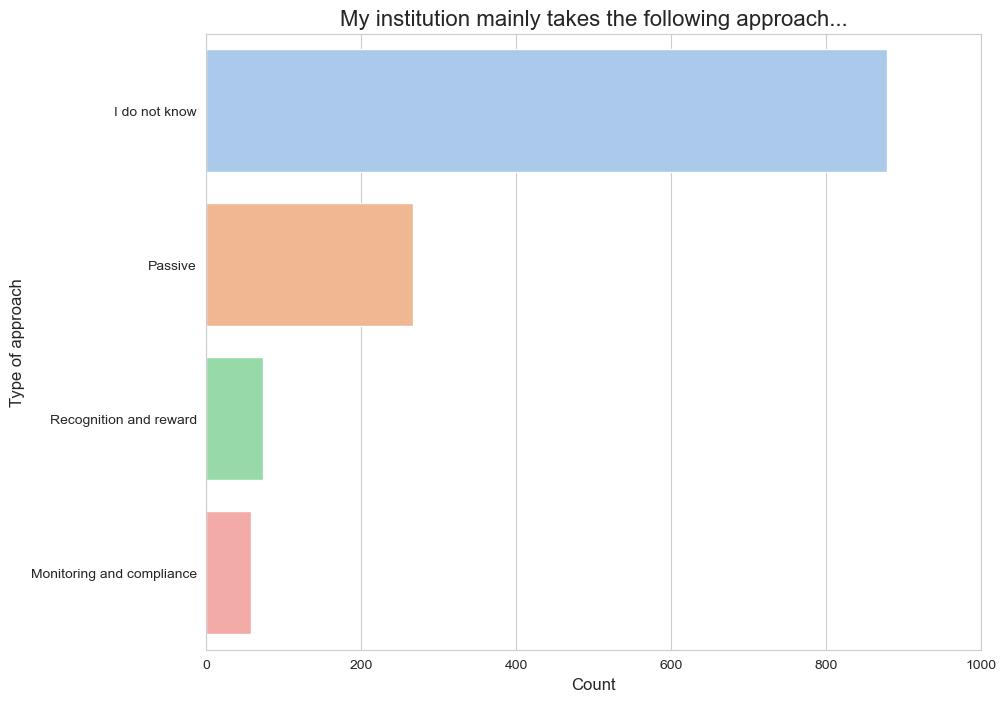

In [299]:
grouped_data = df.groupby('Q7.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q7.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Show the plot
plt.xlim(0, 1000)
plt.show()
#plt.savefig('../data/plots_test/OSself_approach.png', bbox_inches='tight', dpi = 300)

In [300]:
#Display how many particpants haven't given an answer
count = df["Q7.10"].isna().sum()
print(count, "participants have not answered.")

1318 participants have not answered.


### Q7.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [301]:
#Count all answers and list them descending
'N=' + (df['Q7.11'].value_counts(sort=True)).astype(str)

I do not know    N=947
Ok               N=177
Not very well    N=105
Very well         N=46
Name: Q7.11, dtype: object

In [302]:
#Display how many particpants haven't given an answer
count = df["Q7.11"].isna().sum()
print(count, "participants have not answered.")

1319 participants have not answered.


### Q7.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [303]:
#Count all answers and list them descending
df['Q7.12'].value_counts(sort=True)

-                                                                                                                                                                                                                                                                                         63
na                                                                                                                                                                                                                                                                                        53
None                                                                                                                                                                                                                                                                                      47
no                                                                                                                                               

### Q7.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [304]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q7.13'].value_counts(sort=True)

no                                                                                                                                                                                      66
-                                                                                                                                                                                       63
No                                                                                                                                                                                      60
None                                                                                                                                                                                    60
na                                                                                                                                                                                      48
                                                                 

## 8. Version Control

### Q8.1 Version control of research products (e.g., data, code, any other materials used in or generated as part of the research process) is something I think have a [low, medium, high] priority in my field of research:

In [305]:
#Count all answers and list them descending
df['Q8.1'].value_counts(sort=True)

High                      476
Medium                    283
Low                       237
I am not aware of this    234
Name: Q8.1, dtype: int64

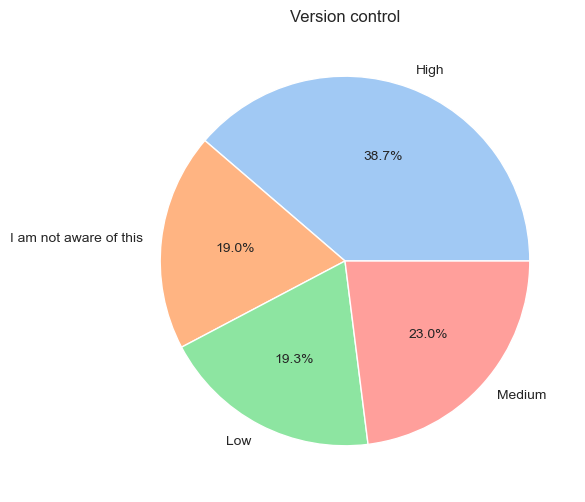

In [306]:
#Plot version control

# Group the data by the column
grouped_data = df.groupby('Q8.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q8.1'], autopct='%1.1f%%')

# Add a title
plt.title('Version control')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/version_control.png', bbox_inches='tight', dpi = 300, transparent=True)

In [307]:
#Display how many particpants haven't given an answer
count = df["Q8.1"].isna().sum()
print(count, "participants have not answered.")

1364 participants have not answered.


### Q8.2 I do this type of activity in my field of research:

In [308]:
print(df['Q8.2_1'].dtype)

object


In [309]:
df['Q8.2_1'] = pd.to_numeric(df['Q8.2_1'], errors='coerce').astype('Int64')

In [310]:
#Count all answers and list them
likert_data = df['Q8.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    340
1    137
2     88
3    127
4    123
5    133
6    282
Name: Q8.2_1, dtype: Int64


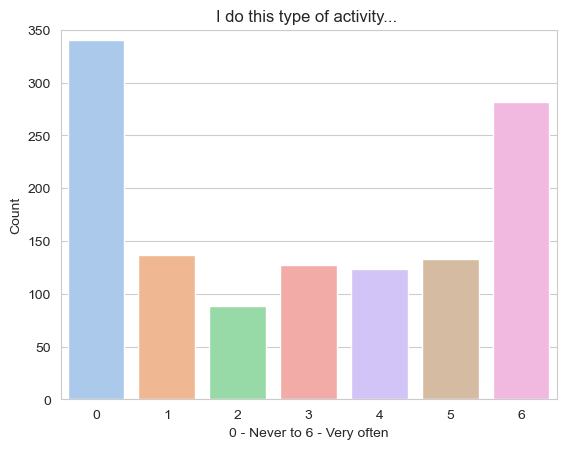

In [311]:
likert_data = df['Q8.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/version_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [312]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.8804878048780487
Median: 3.0
Mode: 0
Standard Deviation: 2.3645455024444435
Interquartile Range: 5


In [313]:
#Display how many particpants haven't given an answer
count = df["Q8.2_1"].isna().sum()
print(count, "participants have not answered.")

1364 participants have not answered.


### Q8.3 For me, training in this topic is:

In [314]:
print(df['Q8.3_1'].dtype)

object


In [315]:
df['Q8.3_1'] = pd.to_numeric(df['Q8.3_1'], errors='coerce').astype('Int64')

In [316]:
#Count all answers and list them
likert_data = df['Q8.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    323
1    137
2    117
3    184
4    120
5    130
6    219
Name: Q8.3_1, dtype: Int64


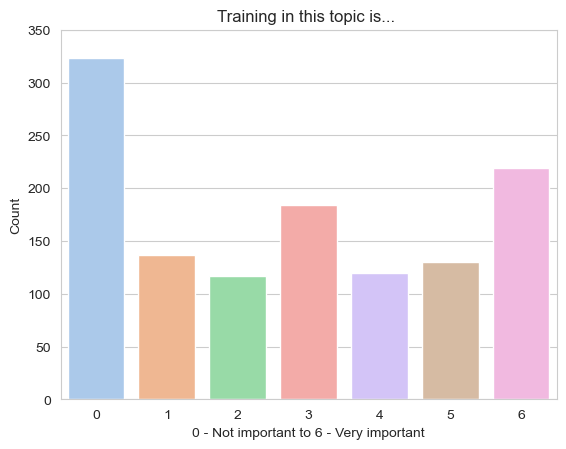

In [317]:
likert_data = df['Q8.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/version_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [318]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.7373983739837398
Median: 3.0
Mode: 0
Standard Deviation: 2.2275331024191916
Interquartile Range: 5


In [319]:
#Display how many particpants haven't given an answer
count = df["Q8.3_1"].isna().sum()
print(count, "participants have not answered.")

1364 participants have not answered.


### Q8.4 I have looked for training and support in this topic at my institution:

In [320]:
#Count all answers and list them descending
df['Q8.4'].value_counts(sort=True)

No                    1051
Yes                    137
Yes, but not found      42
Name: Q8.4, dtype: int64

In [321]:
#Display how many particpants haven't given an answer
count = df["Q8.4"].isna().sum()
print(count, "participants have not answered.")

1364 participants have not answered.


### Q8.5 (if Q8.4 was yes) Training at my institution is:

In [322]:
#Show type of df column
print(df['Q8.5_1'].dtype)

object


In [323]:
df['Q8.5_1'] = pd.to_numeric(df['Q8.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q8.5_1']

In [324]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.889705882352941
Median: 4.0
Mode: 4
Standard Deviation: 1.6938791513920635
Interquartile Range: 2


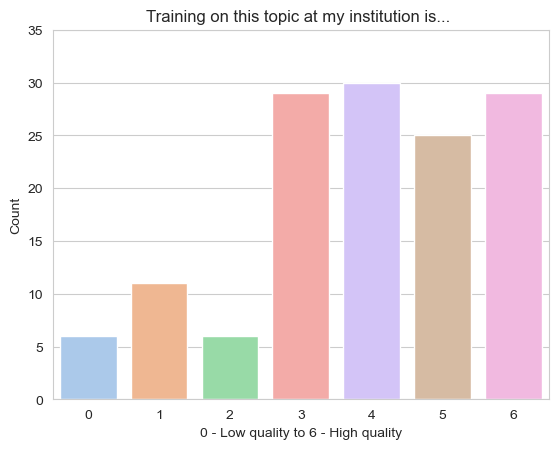

In [325]:
likert_data = df['Q8.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 35)
plt.show()
#plt.savefig('../data/plots_test/version_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [326]:
#Display how many particpants haven't given an answer
count = df["Q8.5_1"].isna().sum()
print(count, "participants have not answered.")

2458 participants have not answered.


### Q8.6 Training in this topic at my institution:

In [327]:
#Count all answers and list them descending
'N=' + (df['Q8.6'].value_counts(sort=True)).astype(str)

Infrequent                                                N=29
At the right level                                        N=28
Frequent,At the right level                               N=23
Frequent                                                  N=20
Infrequent,At the right level                             N=11
At too basic a level                                       N=9
Infrequent,At too basic a level                            N=8
Infrequent,At too complex a level                          N=3
At too complex a level                                     N=2
Infrequent,At too complex a level,At too basic a level     N=1
Infrequent,At the right level,At too basic a level         N=1
At the right level,At too basic a level                    N=1
Frequent,At too basic a level                              N=1
Name: Q8.6, dtype: object

In [328]:
#Normalise the count to represent answers in percent
(df['Q8.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                                21.17%
At the right level                                        20.44%
Frequent,At the right level                               16.79%
Frequent                                                   14.6%
Infrequent,At the right level                              8.03%
At too basic a level                                       6.57%
Infrequent,At too basic a level                            5.84%
Infrequent,At too complex a level                          2.19%
At too complex a level                                     1.46%
Infrequent,At too complex a level,At too basic a level     0.73%
Infrequent,At the right level,At too basic a level         0.73%
At the right level,At too basic a level                    0.73%
Frequent,At too basic a level                              0.73%
Name: Q8.6, dtype: object

In [329]:
#Display how many particpants haven't given an answer
count = df["Q8.6"].isna().sum()
print(count, "participants have not answered.")

2457 participants have not answered.


### Q8.7 The help at my institution on this topic is mainly:

In [330]:
#Count all answers and list them descending
'N=' + (df['Q8.7'].value_counts(sort=True)).astype(str)

Good                                               N=32
Available                                          N=22
Good,At the right level,Available                  N=14
Good,Available                                     N=12
Non-existent                                       N=11
I do not know                                      N=11
At the right level                                  N=8
Too basic                                           N=6
Hard to access                                      N=5
Other. Please explain:                              N=3
Non-existent,Hard to access                         N=2
Too basic,Hard to access                            N=2
Good,At the right level                             N=2
Too basic,Available                                 N=2
Too basic,Hard to access,Other. Please explain:     N=1
Available,Hard to access                            N=1
Good,Available,Other. Please explain:               N=1
Non-existent,I do not know                      

In [331]:
#Normalise the count to represent answers in percent
(df['Q8.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                               23.36%
Available                                          16.06%
Good,At the right level,Available                  10.22%
Good,Available                                      8.76%
Non-existent                                        8.03%
I do not know                                       8.03%
At the right level                                  5.84%
Too basic                                           4.38%
Hard to access                                      3.65%
Other. Please explain:                              2.19%
Non-existent,Hard to access                         1.46%
Too basic,Hard to access                            1.46%
Good,At the right level                             1.46%
Too basic,Available                                 1.46%
Too basic,Hard to access,Other. Please explain:     0.73%
Available,Hard to access                            0.73%
Good,Available,Other. Please explain:               0.73%
Non-existent,I

In [332]:
#Display how many particpants haven't given an answer
count = df["Q8.7"].isna().sum()
print(count, "participants have not answered.")

2457 participants have not answered.


### Q8.7_TEXT

In [333]:
#Count all answers and list them descending
df['Q8.7_8_TEXT'].value_counts(sort=True)

The training is good, but is not required nor well-publicised.                                                                                1
License support                                                                                                                               1
Covered a bit in our unit's SOPs, but no where else                                                                                           1
Overwhelming, and at the same time not enough                                                                                                 1
some online documentation, quicly out of date                                                                                                 1
Training is available but requires a time commitment (4h+) which is hard to find sometimes. Self-directed online training would be useful.    1
Name: Q8.7_8_TEXT, dtype: int64

### Q8.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [334]:
#Count all answers and list them descending
df['Q8.8'].value_counts(sort=True)

No     1085
Yes     145
Name: Q8.8, dtype: int64

### Q8.9 Where have you looked for training and support?

In [335]:
#Count all answers and list them descending
df['Q8.9'].value_counts(sort=True)

online                                                13
Online                                                13
Internet                                               4
Online resources                                       3
NIHR                                                   3
                                                      ..
web                                                    1
Alan Turing Institute, Medium, Stack Overflow          1
previous institution and colleagues in my field        1
blog post, own research group, papers on the topic     1
Other HEI                                              1
Name: Q8.9, Length: 108, dtype: int64

### Q8.10 My institution takes mainly the following approach to this topic:

In [336]:
#Count all answers and list them descending
'N=' + (df['Q8.10'].value_counts(sort=True)).astype(str)

I do not know                N=798
Passive                      N=278
Monitoring and compliance    N=118
Recognition and reward        N=29
Name: Q8.10, dtype: object

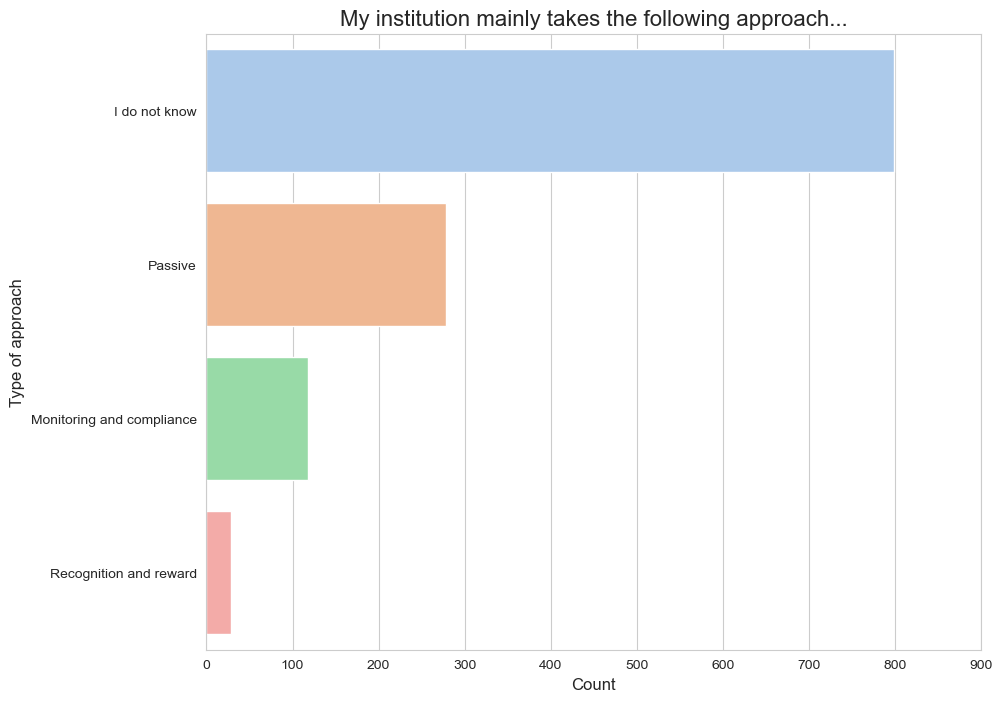

In [337]:
grouped_data = df.groupby('Q8.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q8.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)


#Show the plot
plt.xlim(0, 900)
plt.show()
#plt.savefig('../data/plots_test/version_approach.png', bbox_inches='tight', dpi = 300)

In [338]:
#Normalise the count to represent answers in percent
(df['Q8.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                65.25%
Passive                      22.73%
Monitoring and compliance     9.65%
Recognition and reward        2.37%
Name: Q8.10, dtype: object

In [339]:
#Display how many particpants haven't given an answer
count = df["Q8.10"].isna().sum()
print(count, "participants have not answered.")

1371 participants have not answered.


### Q8.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [340]:
#Count all answers and list them descending
'N=' + (df['Q8.11'].value_counts(sort=True)).astype(str)

I do not know    N=869
Ok               N=193
Not very well    N=104
Very well         N=57
Name: Q8.11, dtype: object

In [341]:
#Display how many particpants haven't given an answer
count = df["Q8.11"].isna().sum()
print(count, "participants have not answered.")

1371 participants have not answered.


### Q8.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [342]:
#Count all answers and list them descending
df['Q8.12'].value_counts(sort=True)

-                                                                  67
None                                                               57
na                                                                 47
no                                                                 47
No                                                                 38
                                                                   ..
Any                                                                 1
I don't really know.                                                1
Version control crucial for datasets, particularly when shared.     1
answer                                                              1
I don t understand                                                  1
Name: Q8.12, Length: 337, dtype: int64

### Q8.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [343]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q9.13'].value_counts(sort=True)

-                                                                                                                                            60
no                                                                                                                                           60
No                                                                                                                                           48
None                                                                                                                                         48
na                                                                                                                                           46
                                                                                                                                             ..
Seriously??                                                                                                                             

## 9. Own Data Analysis Computationally Reproducible

### Q9.1 My own data analysis is computationally reproducible and this is something I think has a [low, medium, high] priority in my field of research:

In [344]:
#Count all answers and list them descending
df['Q9.1'].value_counts(sort=True)

High                      626
Medium                    209
Low                       194
I am not aware of this    159
Name: Q9.1, dtype: int64

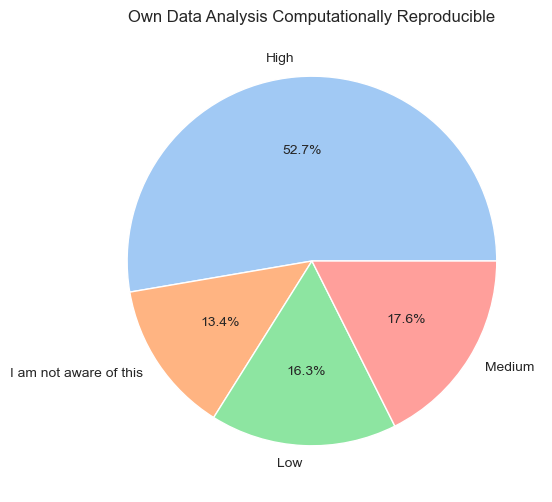

In [345]:
# Group the data by the column
grouped_data = df.groupby('Q9.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q9.1'], autopct='%1.1f%%')

# Add a title
plt.title('Own Data Analysis Computationally Reproducible')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_control.png', bbox_inches='tight', dpi = 300, transparent=True)

In [346]:
#Display how many particpants haven't given an answer
count = df["Q9.1"].isna().sum()
print(count, "participants have not answered.")

1406 participants have not answered.


### Q9.2 I do this type of activity in my field of research:

In [347]:
print(df['Q9.2_1'].dtype)

object


In [348]:
df['Q9.2_1'] = pd.to_numeric(df['Q9.2_1'], errors='coerce').astype('Int64')

In [349]:
#Count all answers and list them
likert_data = df['Q9.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    264
1     99
2     67
3    117
4    117
5    173
6    342
Name: Q9.2_1, dtype: Int64


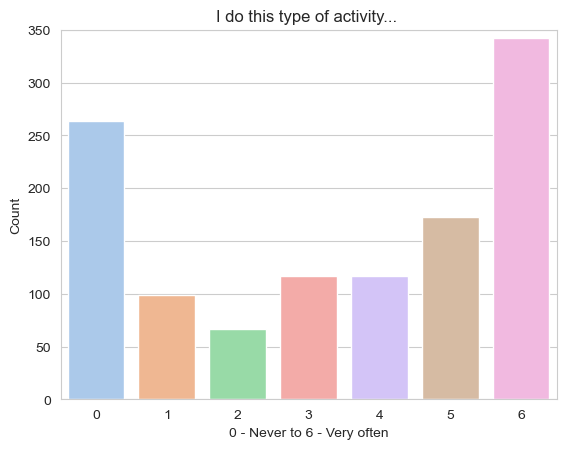

In [350]:
likert_data = df['Q9.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

#Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [351]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.366412213740458
Median: 4.0
Mode: 6
Standard Deviation: 2.3612084909882936
Interquartile Range: 5


In [352]:
#Display how many particpants haven't given an answer
count = df["Q9.2_1"].isna().sum()
print(count, "participants have not answered.")

1415 participants have not answered.


### Q9.3 For me, training in this topic is:

In [353]:
print(df['Q9.3_1'].dtype)

object


In [354]:
df['Q9.3_1'] = pd.to_numeric(df['Q9.3_1'], errors='coerce').astype('Int64')

In [355]:
#Count all answers and list them
likert_data = df['Q9.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    275
1     98
2     69
3    150
4    152
5    150
6    285
Name: Q9.3_1, dtype: Int64


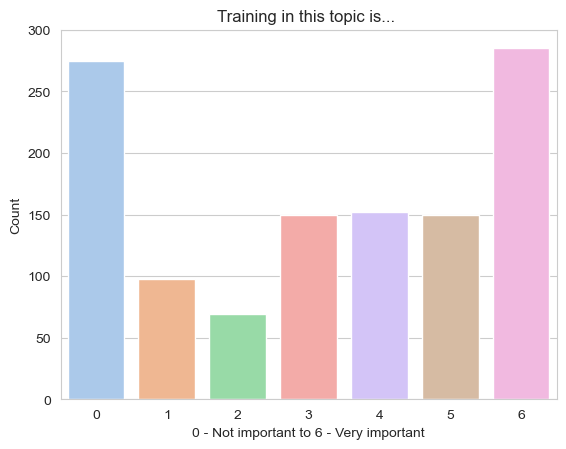

In [356]:
likert_data = df['Q9.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [357]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.1840542832909247
Median: 3.0
Mode: 6
Standard Deviation: 2.2965723740776816
Interquartile Range: 4


In [358]:
#Display how many particpants haven't given an answer
count = df["Q9.3_1"].isna().sum()
print(count, "participants have not answered.")

1415 participants have not answered.


### Q9.4 I have looked for training and support in this topic at my institution:

In [359]:
#Count all answers and list them descending
'N=' + (df['Q9.4'].value_counts(sort=True)).astype(str)

No                    N=1023
Yes                    N=125
Yes, but not found      N=40
Name: Q9.4, dtype: object

In [360]:
#Display how many particpants haven't given an answer
count = df["Q9.4"].isna().sum()
print(count, "participants have not answered.")

1406 participants have not answered.


### Q9.5 (if Q9.4 was yes) Training at my institution is:

In [361]:
#Show type of df column
print(df['Q9.5_1'].dtype)

object


In [362]:
df['Q9.5_1'] = pd.to_numeric(df['Q9.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q9.5_1']

In [363]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.392
Median: 5.0
Mode: 5
Standard Deviation: 1.5234510907168801
Interquartile Range: 3


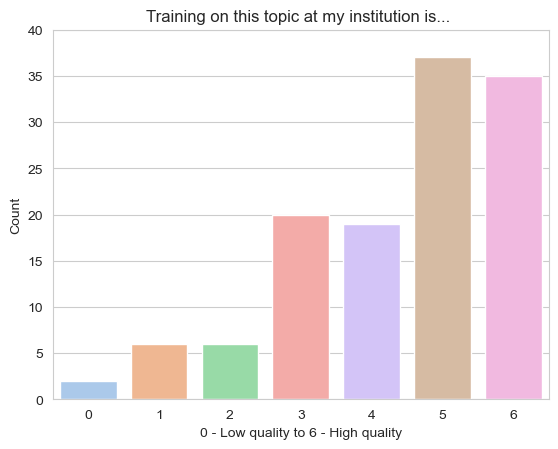

In [364]:
likert_data = df['Q9.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 40)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [365]:
#Display how many particpants haven't given an answer
count = df["Q9.5_1"].isna().sum()
print(count, "participants have not answered.")

2469 participants have not answered.


### Q9.6 Training in this topic at my institution:

In [366]:
#Count all answers and list them descending
'N=' + (df['Q9.6'].value_counts(sort=True)).astype(str)

At the right level                                                                    N=30
Infrequent                                                                            N=26
Frequent,At the right level                                                           N=17
Frequent                                                                              N=17
Infrequent,At the right level                                                         N=12
At too basic a level                                                                   N=8
Infrequent,At too basic a level                                                        N=7
At too complex a level                                                                 N=4
Infrequent,At too complex a level                                                      N=2
Frequent,Infrequent,At too complex a level,At the right level,At too basic a level     N=1
Frequent,Infrequent,At the right level                                                 N=1

In [367]:
#Normalise the count to represent answers in percent
(df['Q9.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                                                                    24.0%
Infrequent                                                                            20.8%
Frequent,At the right level                                                           13.6%
Frequent                                                                              13.6%
Infrequent,At the right level                                                          9.6%
At too basic a level                                                                   6.4%
Infrequent,At too basic a level                                                        5.6%
At too complex a level                                                                 3.2%
Infrequent,At too complex a level                                                      1.6%
Frequent,Infrequent,At too complex a level,At the right level,At too basic a level     0.8%
Frequent,Infrequent,At the right level                                          

In [368]:
#Display how many particpants haven't given an answer
count = df["Q9.6"].isna().sum()
print(count, "participants have not answered.")

2469 participants have not answered.


### Q9.7 The help at my institution on this topic is mainly:

In [369]:
#Count all answers and list them descending
'N=' + (df['Q9.7'].value_counts(sort=True)).astype(str)

Good                                                                                     N=36
Available                                                                                N=20
Good,At the right level,Available                                                        N=15
Good,Available                                                                            N=8
I do not know                                                                             N=8
Too basic                                                                                 N=8
Hard to access                                                                            N=7
At the right level                                                                        N=5
Non-existent                                                                              N=5
Good,At the right level                                                                   N=3
Good,Available,Other. Please explain:                       

In [370]:
#Normalise the count to represent answers in percent
(df['Q9.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                                                     28.8%
Available                                                                                16.0%
Good,At the right level,Available                                                        12.0%
Good,Available                                                                            6.4%
I do not know                                                                             6.4%
Too basic                                                                                 6.4%
Hard to access                                                                            5.6%
At the right level                                                                        4.0%
Non-existent                                                                              4.0%
Good,At the right level                                                                   2.4%
Good,Available,Other. Please explain:             

In [371]:
#Display how many particpants haven't given an answer
count = df["Q9.7"].isna().sum()
print(count, "participants have not answered.")

2469 participants have not answered.


### Q9.7_TEXT

In [372]:
#Count all answers and list them descending
df['Q9.7_8_TEXT'].value_counts(sort=True)

Training is good but not required nor well-publicised.                  1
Time and organisational constraints                                     1
Excellent                                                               1
available as part of certain MSc modules                                1
You really are stupid. This survey is so flawed it is beyond belief.    1
Dependent on the availability of my supervisors.                        1
Name: Q9.7_8_TEXT, dtype: int64

### Q9.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [373]:
#Count all answers and list them descending
df['Q9.8'].value_counts(sort=True)

No     1055
Yes     132
Name: Q9.8, dtype: int64

### Q9.9 Where have you looked for training and support?

In [374]:
#Count all answers and list them descending
df['Q9.9'].value_counts(sort=True)

online                                                                                       9
Online                                                                                       7
Internet                                                                                     4
Alan Turing Institute                                                                        2
Online resources                                                                             2
                                                                                            ..
Research network, online                                                                     1
Internet search                                                                              1
I went to the company who provided the equipment, and who offer training for the software    1
Don't know                                                                                   1
University College London, colleagues, YouTube    

### Q9.10 My institution takes mainly the following approach to this topic:

In [375]:
#Count all answers and list them descending
'N=' + (df['Q9.10'].value_counts(sort=True)).astype(str)

I do not know                N=743
Passive                      N=273
Monitoring and compliance    N=112
Recognition and reward        N=56
Name: Q9.10, dtype: object

In [376]:
#Normalise the count to represent answers in percent
(df['Q9.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                62.75%
Passive                      23.06%
Monitoring and compliance     9.46%
Recognition and reward        4.73%
Name: Q9.10, dtype: object

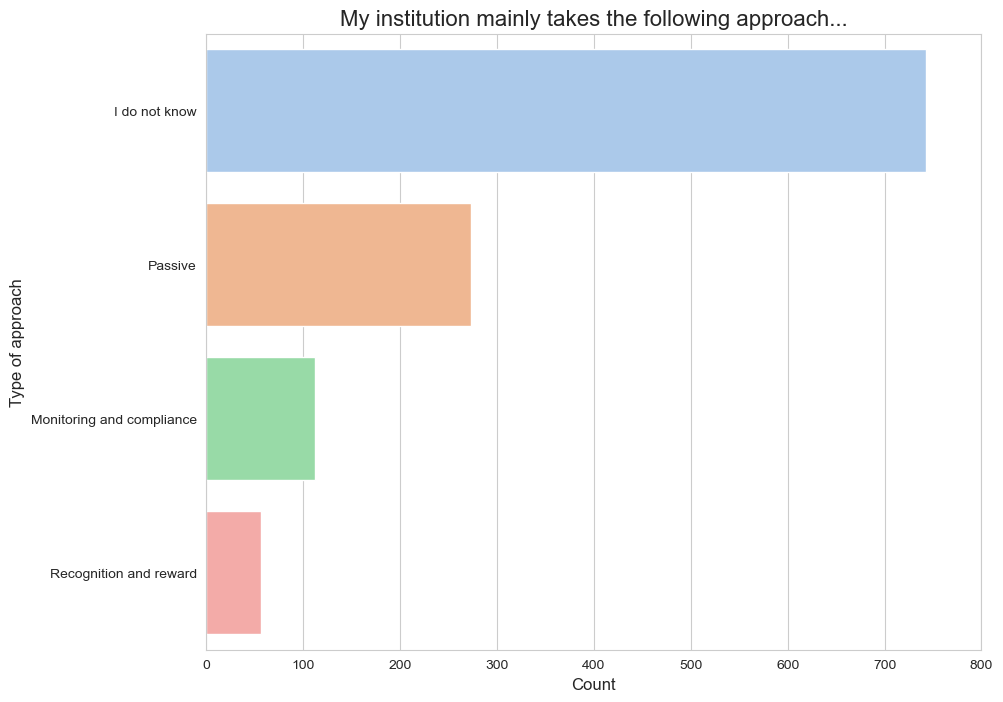

In [377]:
grouped_data = df.groupby('Q9.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q9.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 800)
plt.show()
#plt.savefig('../data/plots_test/owndatarepro_approach.png', bbox_inches='tight', dpi = 300)

In [378]:
#Display how many particpants haven't given an answer
count = df["Q9.10"].isna().sum()
print(count, "participants have not answered.")

1410 participants have not answered.


### Q9.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [379]:
#Count all answers and list them descending
'N=' + (df['Q9.11'].value_counts(sort=True)).astype(str)

I do not know    N=807
Ok               N=198
Not very well    N=108
Very well         N=70
Name: Q9.11, dtype: object

In [380]:
#Display how many particpants haven't given an answer
count = df["Q9.11"].isna().sum()
print(count, "participants have not answered.")

1411 participants have not answered.


### Q9.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [381]:
#Count all answers and list them descending
df['Q9.12'].value_counts(sort=True)

-                                                  64
None                                               50
na                                                 45
no                                                 43
none                                               35
                                                   ..
Need expertise and that is not always available     1
Not that I'm aware of.                              1
/                                                   1
Any                                                 1
Seems to be a lack of availabilty of training       1
Name: Q9.12, Length: 345, dtype: int64

### Q9.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [382]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q9.13'].value_counts(sort=True)

-                                                                                                                                            60
no                                                                                                                                           60
No                                                                                                                                           48
None                                                                                                                                         48
na                                                                                                                                           46
                                                                                                                                             ..
Seriously??                                                                                                                             

## 10. Preparing according to FAIR Principles

### Q10.1 Preparing my own data, code, or other evidence according to FAIR principles is something I think has a [low, medium, high] priority in my field of research:

In [383]:
#Count all answers and list them descending
df['Q10.1'].value_counts(sort=True)

High                      447
I am not aware of this    294
Medium                    279
Low                       136
Name: Q10.1, dtype: int64

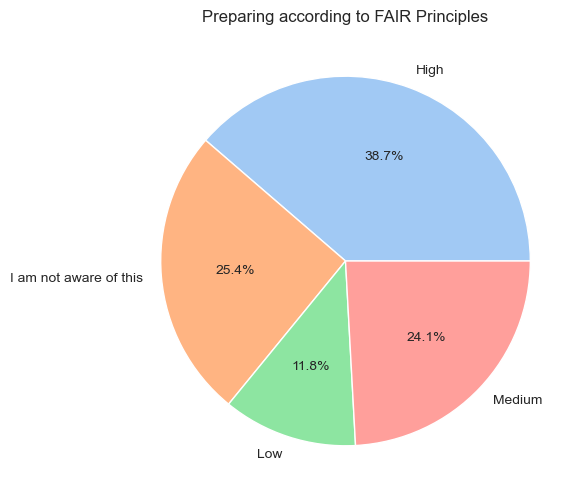

In [384]:
#Plot research methods

# Group the data by the column
grouped_data = df.groupby('Q10.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q10.1'], autopct='%1.1f%%')

# Add a title
plt.title('Preparing according to FAIR Principles')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/fair.png', bbox_inches='tight', dpi = 300, transparent=True)

In [385]:
#Display how many particpants haven't given an answer
count = df["Q10.1"].isna().sum()
print(count, "participants have not answered.")

1438 participants have not answered.


### Q10.2 I do this type of activity in my field of research:

In [386]:
print(df['Q10.2_1'].dtype)

object


In [387]:
df['Q10.2_1'] = pd.to_numeric(df['Q10.2_1'], errors='coerce').astype('Int64')

In [388]:
#Count all answers and list them
likert_data = df['Q10.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    291
1    104
2     75
3    142
4    163
5    144
6    210
Name: Q10.2_1, dtype: Int64


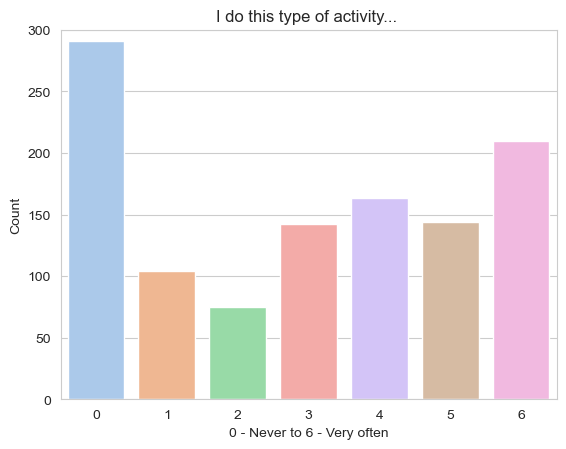

In [389]:
likert_data = df['Q10.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/FAIR_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [390]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.933569530558016
Median: 3.0
Mode: 0
Standard Deviation: 2.2546283591616687
Interquartile Range: 5


In [391]:
#Display how many particpants haven't given an answer
count = df["Q10.2_1"].isna().sum()
print(count, "participants have not answered.")

1465 participants have not answered.


### Q10.3 For me, training in this topic is:

In [392]:
print(df['Q10.3_1'].dtype)

object


In [393]:
df['Q10.3_1'] = pd.to_numeric(df['Q10.3_1'], errors='coerce').astype('Int64')

In [394]:
#Count all answers and list them
likert_data = df['Q10.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    255
1     87
2     83
3    176
4    162
5    133
6    236
Name: Q10.3_1, dtype: Int64


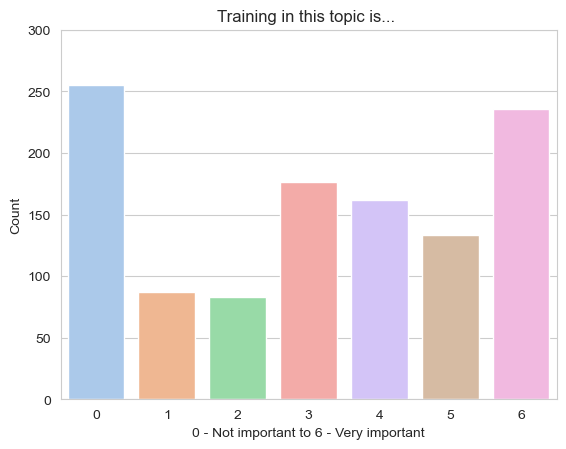

In [395]:
likert_data = df['Q10.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/FAIR_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [396]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.1007067137809186
Median: 3.0
Mode: 0
Standard Deviation: 2.2117201347772535
Interquartile Range: 4


In [397]:
#Display how many particpants haven't given an answer
count = df["Q10.3_1"].isna().sum()
print(count, "participants have not answered.")

1462 participants have not answered.


### Q10.4 I have looked for training and support in this topic at my institution:

In [398]:
#Count all answers and list them descending
'N=' + (df['Q10.4'].value_counts(sort=True)).astype(str)

No                    N=970
Yes                   N=151
Yes, but not found     N=30
Name: Q10.4, dtype: object

In [399]:
#Display how many particpants haven't given an answer
count = df["Q10.4"].isna().sum()
print(count, "participants have not answered.")

1443 participants have not answered.


### Q10.5 (if Q10.4 was yes) Training at my institution is:

In [400]:
#Show type of df column
print(df['Q10.5_1'].dtype)

object


In [401]:
df['Q10.5_1'] = pd.to_numeric(df['Q10.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q10.5_1']

In [402]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.208053691275167
Median: 4.0
Mode: 5
Standard Deviation: 1.352051333311195
Interquartile Range: 2


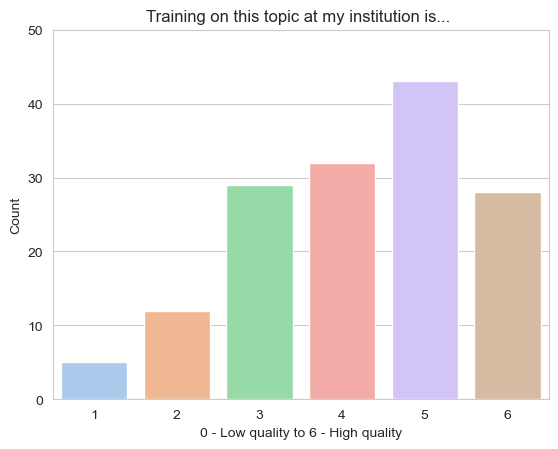

In [403]:
likert_data = df['Q10.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 50)
plt.show()
#plt.savefig('../data/plots_test/FAIR_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [404]:
#Display how many particpants haven't given an answer
count = df["Q10.5_1"].isna().sum()
print(count, "participants have not answered.")

2445 participants have not answered.


### Q10.6 Training in this topic at my institution:

In [405]:
#Count all answers and list them descending
'N=' + (df['Q10.6'].value_counts(sort=True)).astype(str)

Infrequent                                              N=39
At the right level                                      N=35
Frequent                                                N=22
Frequent,At the right level                             N=21
Infrequent,At the right level                           N=11
At too basic a level                                     N=8
Infrequent,At too basic a level                          N=5
Frequent,At too basic a level                            N=3
Infrequent,At too complex a level                        N=2
At too complex a level                                   N=2
At too complex a level,At too basic a level              N=1
Infrequent,At too complex a level,At the right level     N=1
Name: Q10.6, dtype: object

In [406]:
#Normalise the count to represent answers in percent
(df['Q10.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Infrequent                                               26.0%
At the right level                                      23.33%
Frequent                                                14.67%
Frequent,At the right level                              14.0%
Infrequent,At the right level                            7.33%
At too basic a level                                     5.33%
Infrequent,At too basic a level                          3.33%
Frequent,At too basic a level                             2.0%
Infrequent,At too complex a level                        1.33%
At too complex a level                                   1.33%
At too complex a level,At too basic a level              0.67%
Infrequent,At too complex a level,At the right level     0.67%
Name: Q10.6, dtype: object

In [407]:
#Display how many particpants haven't given an answer
count = df["Q10.6"].isna().sum()
print(count, "participants have not answered.")

2444 participants have not answered.


### Q10.7 The help at my institution on this topic is mainly:

In [408]:
#Count all answers and list them descending
'N=' + (df['Q10.7'].value_counts(sort=True)).astype(str)

Good                                                        N=38
Available                                                   N=15
Good,At the right level,Available                           N=15
Hard to access                                              N=14
At the right level                                          N=14
I do not know                                               N=10
Good,At the right level                                     N=10
Good,Available                                               N=7
At the right level,Available                                 N=5
Too basic                                                    N=4
Too basic,Available                                          N=3
Too basic,Hard to access                                     N=2
Other. Please explain:                                       N=2
Good,At the right level,Available,Other. Please explain:     N=1
Non-existent,Hard to access                                  N=1
Non-existent             

In [409]:
#Normalise the count to represent answers in percent
(df['Q10.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        25.33%
Available                                                    10.0%
Good,At the right level,Available                            10.0%
Hard to access                                               9.33%
At the right level                                           9.33%
I do not know                                                6.67%
Good,At the right level                                      6.67%
Good,Available                                               4.67%
At the right level,Available                                 3.33%
Too basic                                                    2.67%
Too basic,Available                                           2.0%
Too basic,Hard to access                                     1.33%
Other. Please explain:                                       1.33%
Good,At the right level,Available,Other. Please explain:     0.67%
Non-existent,Hard to access                                  0

In [410]:
#Display how many particpants haven't given an answer
count = df["Q10.7"].isna().sum()
print(count, "participants have not answered.")

2444 participants have not answered.


### Q10.7_TEXT

In [411]:
#Count all answers and list them descending
df['Q10.7_8_TEXT'].value_counts(sort=True)

not at the right level                                                                                                                                                                               1
Excellent                                                                                                                                                                                            1
Not tailored to my discipline.                                                                                                                                                                       1
Pgrs seem completely unaware if importance                                                                                                                                                           1
There is little appreciation that putting data into e.g. "OneNote" does not ensure ready access in 10 years time. Essentially zero awareness of meta data by most P.I.s, and still less interest.    1
Name:

### Q10.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [412]:
#Count all answers and list them descending
df['Q10.8'].value_counts(sort=True)

No     1041
Yes     109
Name: Q10.8, dtype: int64

### Q10.9 Where have you looked for training and support?

In [413]:
#Count all answers and list them descending
df['Q10.9'].value_counts(sort=True)

online                                                                                                                                      11
Online                                                                                                                                       5
Internet                                                                                                                                     4
Various                                                                                                                                      2
HDR UK                                                                                                                                       2
                                                                                                                                            ..
blog posts, research papers on this                                                                                                          1

### Q10.10 My institution takes mainly the following approach to this topic:

In [414]:
#Count all answers and list them descending
'N=' + (df['Q10.10'].value_counts(sort=True)).astype(str)

I do not know                N=723
Passive                      N=230
Monitoring and compliance    N=132
Recognition and reward        N=62
Name: Q10.10, dtype: object

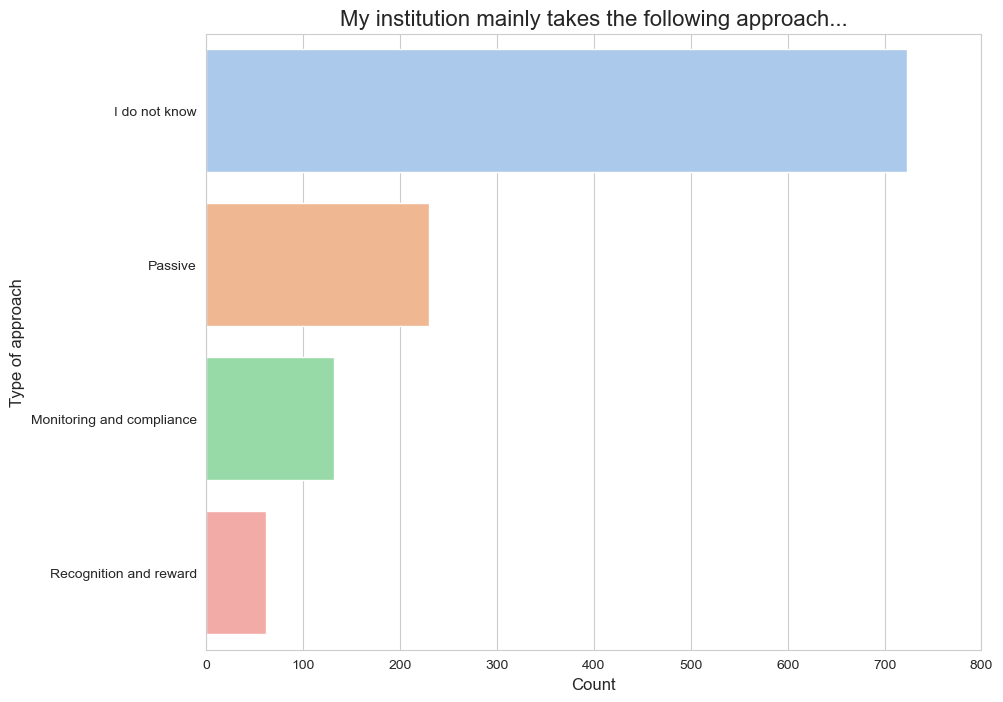

In [415]:
grouped_data = df.groupby('Q10.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q10.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 800)
plt.show()
#plt.savefig('../data/plots_test/fair_approach.png', bbox_inches='tight', dpi = 300)

In [416]:
#Normalise the count to represent answers in percent
(df['Q10.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                63.03%
Passive                      20.05%
Monitoring and compliance    11.51%
Recognition and reward        5.41%
Name: Q10.10, dtype: object

In [417]:
#Display how many particpants haven't given an answer
count = df["Q10.10"].isna().sum()
print(count, "participants have not answered.")

1447 participants have not answered.


### Q10.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [418]:
#Count all answers and list them descending
'N=' + (df['Q10.11'].value_counts(sort=True)).astype(str)

I do not know    N=783
Ok               N=201
Not very well    N=109
Very well         N=54
Name: Q10.11, dtype: object

In [419]:
#Display how many particpants haven't given an answer
count = df["Q10.11"].isna().sum()
print(count, "participants have not answered.")

1447 participants have not answered.


### Q10.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [420]:
#Count all answers and list them descending
df['Q10.12'].value_counts(sort=True)

-                                                                                                                                                                                      63
no                                                                                                                                                                                     46
None                                                                                                                                                                                   44
na                                                                                                                                                                                     43
No                                                                                                                                                                                     33
                                                                      

### Q10.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [421]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q10.13'].value_counts(sort=True)

-                                                                                                          56
no                                                                                                         55
No                                                                                                         51
None                                                                                                       44
none                                                                                                       40
                                                                                                           ..
n.a                                                                                                         1
not relevant to my field                                                                                    1
Not so important yet to my research field compared to other disciplines.                                    1
I have nev

## 11. Guidelines for Recognising Contributions

### Q11.1 Guidelines for recognising the specific substantive contribution of everyone involved in a research project is something I think has a [low, medium, high] priority in my field of research:

In [422]:
#Count all answers and list them descending
df['Q11.1'].value_counts(sort=True)

High                      542
Medium                    347
Low                       169
I am not aware of this     69
Name: Q11.1, dtype: int64

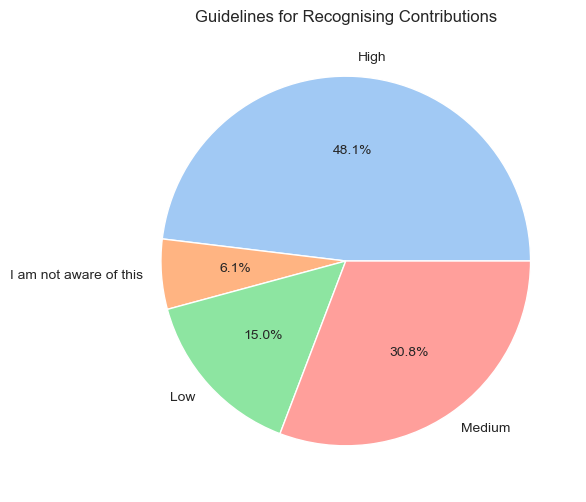

In [423]:
# Group the data by the column
grouped_data = df.groupby('Q11.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q11.1'], autopct='%1.1f%%')

# Add a title
plt.title('Guidelines for Recognising Contributions')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/contributions.png', bbox_inches='tight', dpi = 300, transparent=True)

In [424]:
#Display how many particpants haven't given an answer
count = df["Q11.1"].isna().sum()
print(count, "participants have not answered.")

1467 participants have not answered.


### Q11.2 I do this type of activity in my field of research:

In [425]:
print(df['Q11.2_1'].dtype)

object


In [426]:
df['Q11.2_1'] = pd.to_numeric(df['Q11.2_1'], errors='coerce').astype('Int64')

In [427]:
#Count all answers and list them
likert_data = df['Q11.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    112
1     84
2     86
3    163
4    163
5    174
6    334
Name: Q11.2_1, dtype: Int64


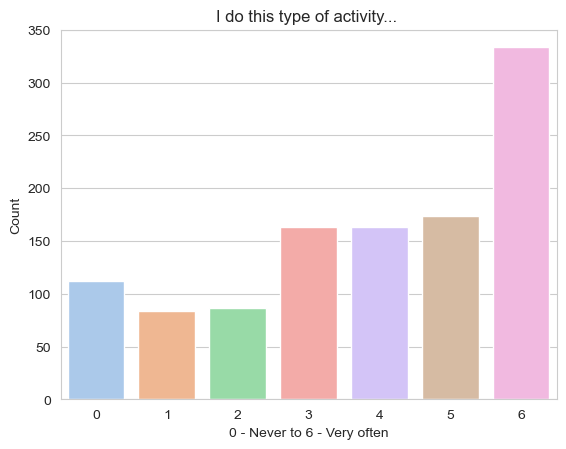

In [428]:
likert_data = df['Q11.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 350)
plt.show()
#plt.savefig('../data/plots_test/contributions_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [429]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.8270609318996414
Median: 4.0
Mode: 6
Standard Deviation: 2.015994955118748
Interquartile Range: 4


In [430]:
#Display how many particpants haven't given an answer
count = df["Q11.2_1"].isna().sum()
print(count, "participants have not answered.")

1478 participants have not answered.


### Q11.3 For me, training in this topic is:

In [431]:
print(df['Q11.3_1'].dtype)

object


In [432]:
df['Q11.3_1'] = pd.to_numeric(df['Q11.3_1'], errors='coerce').astype('Int64')

In [433]:
#Count all answers and list them
likert_data = df['Q11.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    159
1    140
2    115
3    185
4    151
5    135
6    228
Name: Q11.3_1, dtype: Int64


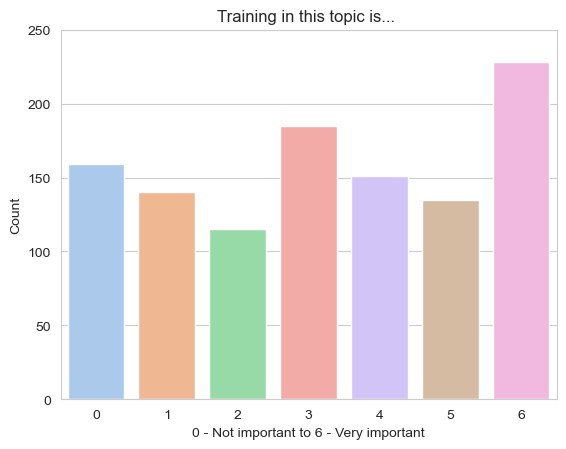

In [434]:
likert_data = df['Q11.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 250)
plt.show()
#plt.savefig('../data/plots_test/contributions_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [435]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.2093441150044923
Median: 3.0
Mode: 6
Standard Deviation: 2.0776783055541737
Interquartile Range: 4


In [436]:
#Display how many particpants haven't given an answer
count = df["Q11.3_1"].isna().sum()
print(count, "participants have not answered.")

1481 participants have not answered.


### Q11.4 I have looked for training and support in this topic at my institution:

In [437]:
#Count all answers and list them descending
'N=' + (df['Q11.4'].value_counts(sort=True)).astype(str)

No                    N=982
Yes                    N=99
Yes, but not found     N=44
Name: Q11.4, dtype: object

In [438]:
#Display how many particpants haven't given an answer
count = df["Q11.4"].isna().sum()
print(count, "participants have not answered.")

1469 participants have not answered.


### Q11.5 (if Q11.4 was yes) Training at my institution is:

In [439]:
#Show type of df column
print(df['Q11.5_1'].dtype)

object


In [440]:
df['Q11.5_1'] = pd.to_numeric(df['Q11.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q11.5_1']

In [441]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.229166666666667
Median: 5.0
Mode: 6
Standard Deviation: 1.6637254749929
Interquartile Range: 3


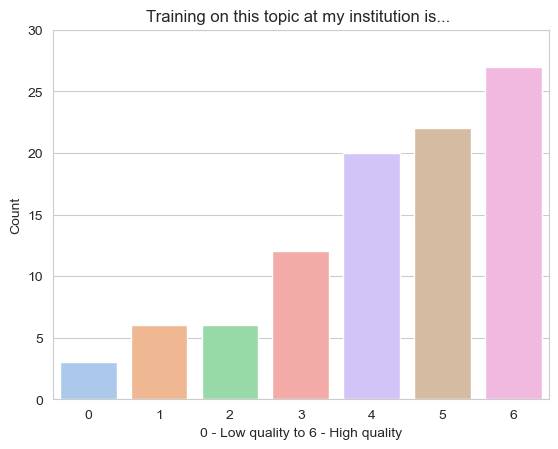

In [442]:
likert_data = df['Q11.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 30)
plt.show()
#plt.savefig('../data/plots_test/contributions_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [443]:
#Display how many particpants haven't given an answer
count = df["Q11.5_1"].isna().sum()
print(count, "participants have not answered.")

2498 participants have not answered.


### Q11.6 Training in this topic at my institution:

In [444]:
#Count all answers and list them descending
'N=' + (df['Q11.6'].value_counts(sort=True)).astype(str)

At the right level                 N=30
Infrequent                         N=26
Frequent                           N=15
Frequent,At the right level        N=14
Infrequent,At the right level       N=7
At too basic a level                N=3
Frequent,At too complex a level     N=1
At too complex a level              N=1
Infrequent,At too basic a level     N=1
Name: Q11.6, dtype: object

In [445]:
#Normalise the count to represent answers in percent
(df['Q11.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                 30.61%
Infrequent                         26.53%
Frequent                           15.31%
Frequent,At the right level        14.29%
Infrequent,At the right level       7.14%
At too basic a level                3.06%
Frequent,At too complex a level     1.02%
At too complex a level              1.02%
Infrequent,At too basic a level     1.02%
Name: Q11.6, dtype: object

In [446]:
#Display how many particpants haven't given an answer
count = df["Q11.6"].isna().sum()
print(count, "participants have not answered.")

2496 participants have not answered.


### Q11.7 The help at my institution on this topic is mainly:

In [447]:
#Count all answers and list them descending
'N=' + (df['Q11.7'].value_counts(sort=True)).astype(str)

Good                                                        N=32
Available                                                   N=15
Non-existent                                                 N=9
Good,At the right level,Available                            N=8
At the right level                                           N=7
Good,At the right level                                      N=6
Good,Available                                               N=5
Too basic                                                    N=4
Hard to access                                               N=3
At the right level,Available                                 N=2
Non-existent,Hard to access                                  N=2
I do not know                                                N=2
Good,At the right level,Available,Other. Please explain:     N=1
At the right level,Hard to access                            N=1
Good,Other. Please explain:                                  N=1
Other. Please explain:   

In [448]:
#Normalise the count to represent answers in percent
(df['Q11.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        32.32%
Available                                                   15.15%
Non-existent                                                 9.09%
Good,At the right level,Available                            8.08%
At the right level                                           7.07%
Good,At the right level                                      6.06%
Good,Available                                               5.05%
Too basic                                                    4.04%
Hard to access                                               3.03%
At the right level,Available                                 2.02%
Non-existent,Hard to access                                  2.02%
I do not know                                                2.02%
Good,At the right level,Available,Other. Please explain:     1.01%
At the right level,Hard to access                            1.01%
Good,Other. Please explain:                                  1

In [449]:
#Display how many particpants haven't given an answer
count = df["Q11.7"].isna().sum()
print(count, "participants have not answered.")

2495 participants have not answered.


### Q11.7_TEXT

In [450]:
#Count all answers and list them descending
df['Q11.7_8_TEXT'].value_counts(sort=True)

Excellent                                                                1
we received training from our PI which was very useful                   1
As a group of PIs we provide our own training on this to our students    1
Name: Q11.7_8_TEXT, dtype: int64

### Q11.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [451]:
#Count all answers and list them descending
df['Q11.8'].value_counts(sort=True)

No     1036
Yes      88
Name: Q11.8, dtype: int64

### Q11.9 Where have you looked for training and support?

In [452]:
#Count all answers and list them descending
df['Q11.9'].value_counts(sort=True)

online                     5
Online                     4
Internet                   2
Online guidance            2
Internet                   1
                          ..
CReDiT system, APA,        1
publisher guidelines       1
authorship guidelines      1
ICMJE author guidelines    1
in said the work           1
Name: Q11.9, Length: 77, dtype: int64

### Q11.10 My institution takes mainly the following approach to this topic:

In [453]:
#Count all answers and list them descending
'N=' + (df['Q11.10'].value_counts(sort=True)).astype(str)

I do not know                N=631
Passive                      N=314
Monitoring and compliance    N=107
Recognition and reward        N=66
Name: Q11.10, dtype: object

In [454]:
#Normalise the count to represent answers in percent
(df['Q11.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                56.44%
Passive                      28.09%
Monitoring and compliance     9.57%
Recognition and reward         5.9%
Name: Q11.10, dtype: object

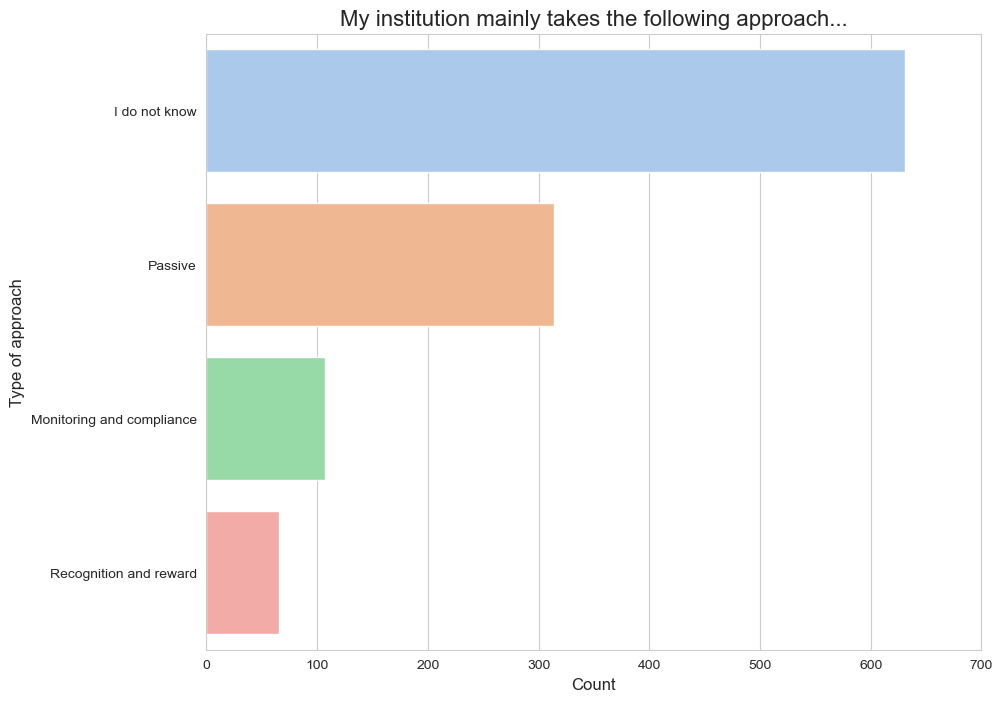

In [455]:
grouped_data = df.groupby('Q11.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q11.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/contributions_approach.png', bbox_inches='tight', dpi = 300)

In [456]:
#Display how many particpants haven't given an answer
count = df["Q11.10"].isna().sum()
print(count, "participants have not answered.")

1476 participants have not answered.


### Q11.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [457]:
#Count all answers and list them descending
'N=' + (df['Q11.11'].value_counts(sort=True)).astype(str)

I do not know    N=690
Ok               N=211
Not very well    N=145
Very well         N=70
Name: Q11.11, dtype: object

In [458]:
#Display how many particpants haven't given an answer
count = df["Q11.11"].isna().sum()
print(count, "participants have not answered.")

1478 participants have not answered.


### Q11.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [459]:
#Count all answers and list them descending
df['Q11.12'].value_counts(sort=True)

-                                                                                                                                                                                   56
na                                                                                                                                                                                  42
no                                                                                                                                                                                  41
None                                                                                                                                                                                40
none                                                                                                                                                                                36
                                                                                     

### Q11.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [460]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q11.13'].value_counts(sort=True)

-                                                                                                                                                                                     52
no                                                                                                                                                                                    44
None                                                                                                                                                                                  44
No                                                                                                                                                                                    43
na                                                                                                                                                                                    40
                                                                           

## 12. Declaring Conflicts of Interest

### Q12.1 Declaring conflicts of interest is something I think has a [low, medium, high] priority in my field of research:

In [461]:
#Count all answers and list them descending
df['Q12.1'].value_counts(sort=True)

High                      731
Medium                    235
Low                       119
I am not aware of this     25
Name: Q12.1, dtype: int64

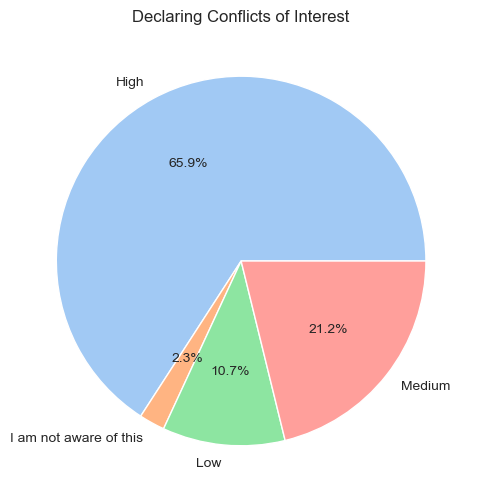

In [462]:
# Group the data by the column
grouped_data = df.groupby('Q12.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q12.1'], autopct='%1.1f%%')

# Add a title
plt.title('Declaring Conflicts of Interest')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/conflicts.png', bbox_inches='tight', dpi = 300, transparent=True)

In [463]:
#Display how many particpants haven't given an answer
count = df["Q12.1"].isna().sum()
print(count, "participants have not answered.")

1484 participants have not answered.


### Q12.2 I do this type of activity in my field of research:

In [464]:
print(df['Q12.2_1'].dtype)

object


In [465]:
df['Q12.2_1'] = pd.to_numeric(df['Q12.2_1'], errors='coerce').astype('Int64')

In [466]:
#Count all answers and list them
likert_data = df['Q12.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    130
1     89
2     56
3    106
4     91
5    125
6    502
Name: Q12.2_1, dtype: Int64


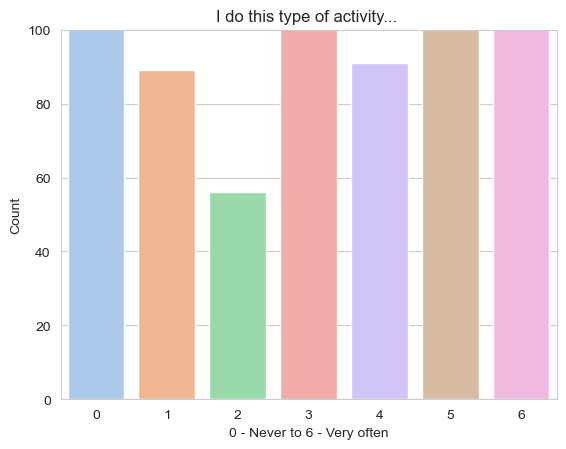

In [467]:
ikert_data = df['Q12.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 100)
plt.show()
#plt.savefig('../data/plots_test/conflicts_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [468]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.112829845313922
Median: 5.0
Mode: 6
Standard Deviation: 2.2032450606022866
Interquartile Range: 3.5


In [469]:
#Display how many particpants haven't given an answer
count = df["Q12.2_1"].isna().sum()
print(count, "participants have not answered.")

1495 participants have not answered.


### Q12.3 For me, training in this topic is:

In [470]:
print(df['Q12.3_1'].dtype)

object


In [471]:
df['Q12.3_1'] = pd.to_numeric(df['Q12.3_1'], errors='coerce').astype('Int64')

In [472]:
#Count all answers and list them
likert_data = df['Q12.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    162
1    139
2     93
3    217
4    145
5    103
6    235
Name: Q12.3_1, dtype: Int64


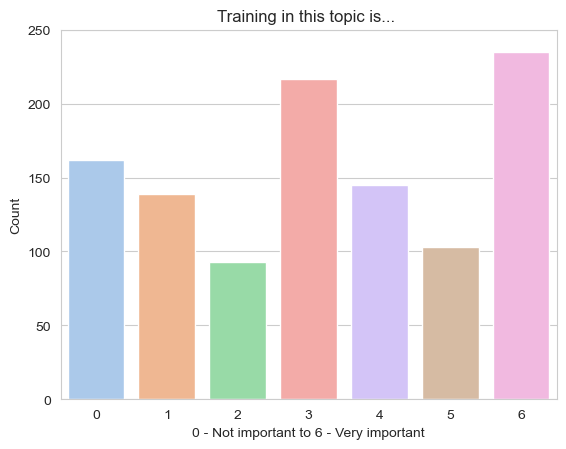

In [473]:
likert_data = df['Q12.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 250)
plt.show()
#plt.savefig('../data/plots_test/conflicts_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [474]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.1819012797074953
Median: 3.0
Mode: 6
Standard Deviation: 2.0830869584856946
Interquartile Range: 4


In [475]:
#Display how many particpants haven't given an answer
count = df["Q12.3_1"].isna().sum()
print(count, "participants have not answered.")

1500 participants have not answered.


### Q12.4 I have looked for training and support in this topic at my institution:

In [476]:
#Count all answers and list them descending
'N=' + (df['Q12.4'].value_counts(sort=True)).astype(str)

No                    N=914
Yes                   N=168
Yes, but not found     N=27
Name: Q12.4, dtype: object

In [477]:
#Display how many particpants haven't given an answer
count = df["Q12.4"].isna().sum()
print(count, "participants have not answered.")

1485 participants have not answered.


### Q12.5 (if Q12.4 was yes) Training at my institution is:

In [478]:
#Show type of df column
print(df['Q12.5_1'].dtype)

object


In [479]:
df['Q12.5_1'] = pd.to_numeric(df['Q12.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q12.5_1']

In [480]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.403614457831325
Median: 5.0
Mode: 6
Standard Deviation: 1.4269225867713318
Interquartile Range: 2


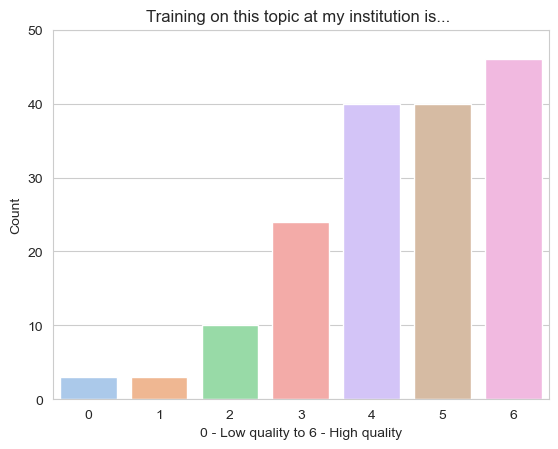

In [481]:
likert_data = df['Q12.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 50)
plt.show()
#plt.savefig('../data/plots_test/conflicts_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [482]:
#Display how many particpants haven't given an answer
count = df["Q12.5_1"].isna().sum()
print(count, "participants have not answered.")

2428 participants have not answered.


### Q12.6 Training in this topic at my institution:

In [483]:
#Count all answers and list them descending
'N=' + (df['Q12.6'].value_counts(sort=True)).astype(str)

At the right level                           N=67
Frequent,At the right level                  N=30
Frequent                                     N=25
Infrequent                                   N=24
Infrequent,At the right level                 N=9
At too basic a level                          N=5
Infrequent,At too basic a level               N=4
Frequent,At too complex a level               N=1
Frequent,At too basic a level                 N=1
At too complex a level,At the right level     N=1
Name: Q12.6, dtype: object

In [484]:
#Normalise the count to represent answers in percent
(df['Q12.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                           40.12%
Frequent,At the right level                  17.96%
Frequent                                     14.97%
Infrequent                                   14.37%
Infrequent,At the right level                 5.39%
At too basic a level                          2.99%
Infrequent,At too basic a level                2.4%
Frequent,At too complex a level                0.6%
Frequent,At too basic a level                  0.6%
At too complex a level,At the right level      0.6%
Name: Q12.6, dtype: object

In [485]:
#Display how many particpants haven't given an answer
count = df["Q12.6"].isna().sum()
print(count, "participants have not answered.")

2427 participants have not answered.


### Q12.7 The help at my institution on this topic is mainly:

In [486]:
#Count all answers and list them descending
'N=' + (df['Q12.7'].value_counts(sort=True)).astype(str)

Good                                                        N=56
Good,At the right level,Available                           N=21
At the right level                                          N=20
Available                                                   N=19
I do not know                                               N=12
Good,Available                                               N=9
At the right level,Available                                 N=6
Good,At the right level                                      N=5
Too basic                                                    N=5
Non-existent                                                 N=5
Other. Please explain:                                       N=2
Hard to access                                               N=2
Available,Other. Please explain:                             N=1
Good,At the right level,Available,Other. Please explain:     N=1
Too basic,Available                                          N=1
Good,Too basic,I do not k

In [487]:
#Normalise the count to represent answers in percent
(df['Q12.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        33.73%
Good,At the right level,Available                           12.65%
At the right level                                          12.05%
Available                                                   11.45%
I do not know                                                7.23%
Good,Available                                               5.42%
At the right level,Available                                 3.61%
Good,At the right level                                      3.01%
Too basic                                                    3.01%
Non-existent                                                 3.01%
Other. Please explain:                                        1.2%
Hard to access                                                1.2%
Available,Other. Please explain:                              0.6%
Good,At the right level,Available,Other. Please explain:      0.6%
Too basic,Available                                           

In [488]:
#Display how many particpants haven't given an answer
count = df["Q12.7"].isna().sum()
print(count, "participants have not answered.")

2428 participants have not answered.


### Q12.7_TEXT

In [489]:
#Count all answers and list them descending
df['Q12.7_8_TEXT'].value_counts(sort=True)

The risk of litigation is perhaps why (unusually) COI is something given more emphasis at Institutional Level.    1
It varies depending on the specific example                                                                       1
Excellent                                                                                                         1
Not tailored to my field                                                                                          1
Name: Q12.7_8_TEXT, dtype: int64

### Q12.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [490]:
#Count all answers and list them descending
df['Q12.8'].value_counts(sort=True)

No     1049
Yes      59
Name: Q12.8, dtype: int64

### Q12.9 Where have you looked for training and support?

In [491]:
#Count all answers and list them descending
df['Q12.9'].value_counts(sort=True)

Online                                                                                                                    2
website                                                                                                                   1
Colleagues, blogs etc.                                                                                                    1
reading medical and journal codes of conduct                                                                              1
journal editors, to check if I'm ok to review a paper if my professor has worked with some of the authors.                1
ASA, AAA                                                                                                                  1
Cochrane                                                                                                                  1
previous institution                                                                                                      1
online r

### Q12.10 My institution takes mainly the following approach to this topic:

In [492]:
#Count all answers and list them descending
'N=' + (df['Q12.10'].value_counts(sort=True)).astype(str)

I do not know                N=544
Monitoring and compliance    N=322
Passive                      N=196
Recognition and reward        N=44
Name: Q12.10, dtype: object

In [493]:
#Normalise the count to represent answers in percent
(df['Q12.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                49.19%
Monitoring and compliance    29.11%
Passive                      17.72%
Recognition and reward        3.98%
Name: Q12.10, dtype: object

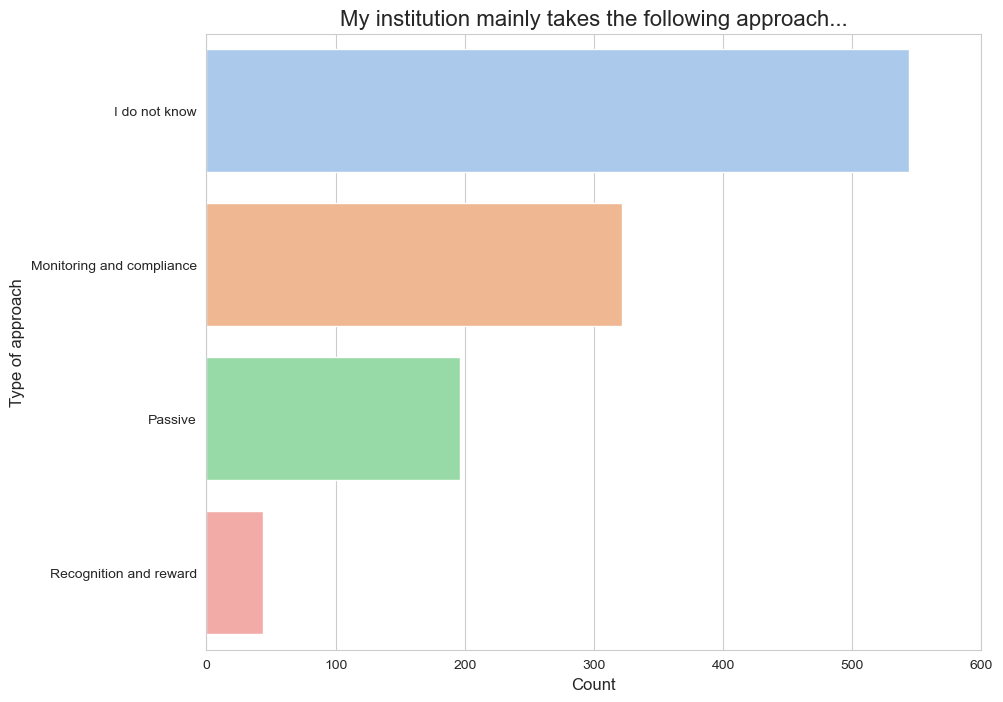

In [494]:
grouped_data = df.groupby('Q12.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q12.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/conflicts_approach.png', bbox_inches='tight', dpi = 300)

In [495]:
#Display how many particpants haven't given an answer
count = df["Q12.10"].isna().sum()
print(count, "participants have not answered.")

1488 participants have not answered.


### Q12.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [496]:
#Count all answers and list them descending
'N=' + (df['Q12.11'].value_counts(sort=True)).astype(str)

I do not know    N=655
Ok               N=272
Very well        N=111
Not very well     N=67
Name: Q12.11, dtype: object

In [497]:
#Display how many particpants haven't given an answer
count = df["Q12.11"].isna().sum()
print(count, "participants have not answered.")

1489 participants have not answered.


### Q12.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [498]:
#Count all answers and list them descending
df['Q12.12'].value_counts(sort=True)

-                                                                  64
None                                                               49
na                                                                 44
no                                                                 43
none                                                               39
                                                                   ..
Can be conflicts when someone has a commercial interest             1
Not yet                                                             1
Little risks or barriers involved in this topic within my field     1
Unaware of risks or barriers to my field of study                   1
Possibly, but I don't know exactly which ones.                      1
Name: Q12.12, Length: 295, dtype: int64

### Q12.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [499]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q12.13'].value_counts(sort=True)

-                                                                                                              59
no                                                                                                             47
None                                                                                                           47
No                                                                                                             47
none                                                                                                           45
                                                                                                               ..
I don't know                                                                                                    1
Good.                                                                                                           1
Any                                                                                     

## 13. Pre-prints

### Q13.1 Publishing pre-prints is something I think has a [low, medium, high] priority in my field of research:

In [500]:
#Count all answers and list them descending
df['Q13.1'].value_counts(sort=True)

Medium                    378
High                      349
Low                       281
I am not aware of this     93
Name: Q13.1, dtype: int64

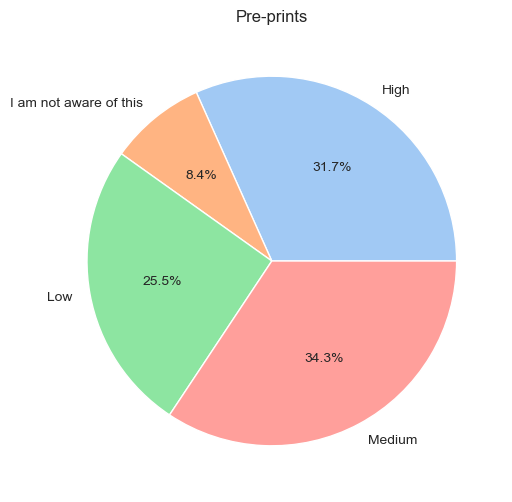

In [501]:
# Group the data by the column
grouped_data = df.groupby('Q13.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q13.1'], autopct='%1.1f%%')

# Add a title
plt.title('Pre-prints')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/preprints.png', bbox_inches='tight', dpi = 300, transparent=True)

In [502]:
#Display how many particpants haven't given an answer
count = df["Q13.1"].isna().sum()
print(count, "participants have not answered.")

1493 participants have not answered.


### Q13.2 I do this type of activity in my field of research:

In [503]:
print(df['Q13.2_1'].dtype)

object


In [504]:
df['Q13.2_1'] = pd.to_numeric(df['Q13.2_1'], errors='coerce').astype('Int64')

In [505]:
#Count all answers and list them
likert_data = df['Q13.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    294
1    143
2     90
3    124
4    117
5    105
6    218
Name: Q13.2_1, dtype: Int64


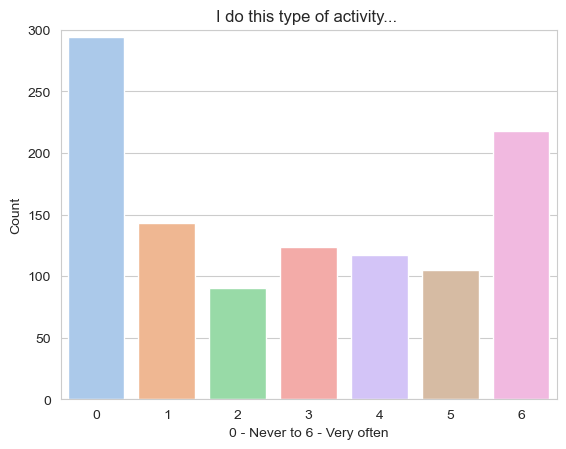

In [506]:
likert_data = df['Q13.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/preprints_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [507]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.7461044912923924
Median: 3.0
Mode: 0
Standard Deviation: 2.2941231148601795
Interquartile Range: 5


In [508]:
#Display how many particpants haven't given an answer
count = df["Q13.2_1"].isna().sum()
print(count, "participants have not answered.")

1503 participants have not answered.


### Q13.3 For me, training in this topic is:

In [509]:
print(df['Q13.3_1'].dtype)

object


In [510]:
df['Q13.3_1'] = pd.to_numeric(df['Q13.3_1'], errors='coerce').astype('Int64')

In [511]:
#Count all answers and list them
likert_data = df['Q13.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    282
1    176
2    126
3    188
4    124
5     70
6    120
Name: Q13.3_1, dtype: Int64


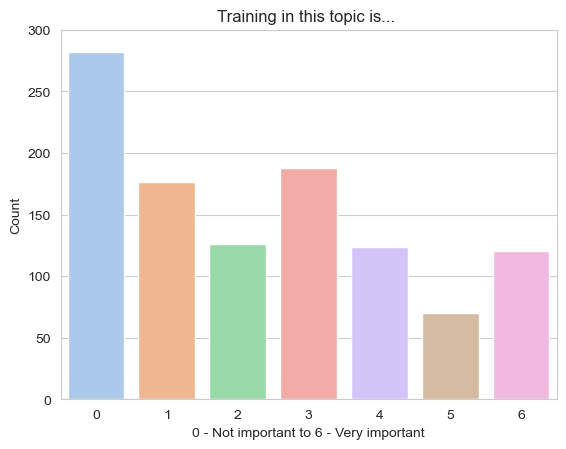

In [512]:
likert_data = df['Q13.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/preprints_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [513]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 2.3554327808471456
Median: 2.0
Mode: 0
Standard Deviation: 2.013961166982463
Interquartile Range: 4


In [514]:
#Display how many particpants haven't given an answer
count = df["Q13.3_1"].isna().sum()
print(count, "participants have not answered.")

1508 participants have not answered.


### Q13.4 I have looked for training and support in this topic at my institution:

In [515]:
#Count all answers and list them descending
'N=' + (df['Q13.4'].value_counts(sort=True)).astype(str)

No                    N=990
Yes                    N=83
Yes, but not found     N=29
Name: Q13.4, dtype: object

In [516]:
#Display how many particpants haven't given an answer
count = df["Q13.4"].isna().sum()
print(count, "participants have not answered.")

1492 participants have not answered.


### Q13.5 (if Q13.4 was yes) Training at my institution is:

In [517]:
#Show type of df column
print(df['Q13.5_1'].dtype)

object


In [518]:
df['Q13.5_1'] = pd.to_numeric(df['Q13.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q13.5_1']

In [519]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.8902439024390243
Median: 4.0
Mode: 4
Standard Deviation: 1.5235282115478248
Interquartile Range: 2


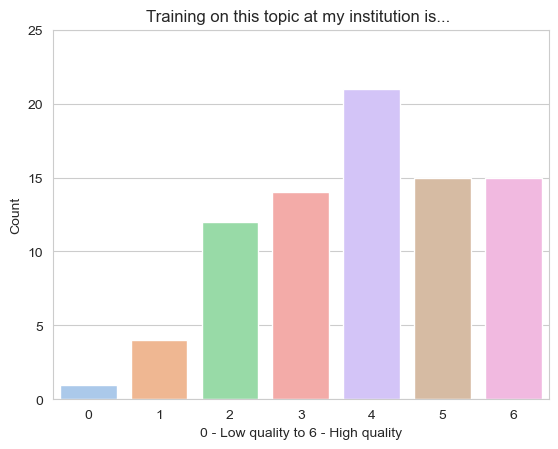

In [520]:
likert_data = df['Q13.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 25)
plt.show()
#plt.savefig('../data/plots_test/preprints_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [521]:
#Display how many particpants haven't given an answer
count = df["Q13.5_1"].isna().sum()
print(count, "participants have not answered.")

2512 participants have not answered.


### Q13.6 Training in this topic at my institution:

In [522]:
#Count all answers and list them descending
'N=' + (df['Q13.6'].value_counts(sort=True)).astype(str)

At the right level                 N=23
Infrequent                         N=22
Frequent,At the right level        N=12
Frequent                           N=11
Infrequent,At the right level       N=7
At too basic a level                N=5
Infrequent,At too basic a level     N=1
Frequent,At too complex a level     N=1
Name: Q13.6, dtype: object

In [523]:
#Normalise the count to represent answers in percent
(df['Q13.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                 28.05%
Infrequent                         26.83%
Frequent,At the right level        14.63%
Frequent                           13.41%
Infrequent,At the right level       8.54%
At too basic a level                 6.1%
Infrequent,At too basic a level     1.22%
Frequent,At too complex a level     1.22%
Name: Q13.6, dtype: object

In [524]:
#Display how many particpants haven't given an answer
count = df["Q13.6"].isna().sum()
print(count, "participants have not answered.")

2512 participants have not answered.


### Q13.7 The help at my institution on this topic is mainly:

In [525]:
#Count all answers and list them descending
'N=' + (df['Q13.7'].value_counts(sort=True)).astype(str)

Good                                 N=24
Available                            N=12
Good,At the right level,Available     N=9
At the right level                    N=8
Hard to access                        N=5
Too basic                             N=5
Non-existent                          N=5
I do not know                         N=5
Good,Available                        N=4
Too basic,Hard to access              N=2
Good,At the right level               N=2
At the right level,Available          N=1
At the right level,Hard to access     N=1
Name: Q13.7, dtype: object

In [526]:
#Normalise the count to represent answers in percent
(df['Q13.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                 28.92%
Available                            14.46%
Good,At the right level,Available    10.84%
At the right level                    9.64%
Hard to access                        6.02%
Too basic                             6.02%
Non-existent                          6.02%
I do not know                         6.02%
Good,Available                        4.82%
Too basic,Hard to access              2.41%
Good,At the right level               2.41%
At the right level,Available           1.2%
At the right level,Hard to access      1.2%
Name: Q13.7, dtype: object

In [527]:
#Display how many particpants haven't given an answer
count = df["Q13.7"].isna().sum()
print(count, "participants have not answered.")

2511 participants have not answered.


### Q13.7_TEXT

In [528]:
#Count all answers and list them descending
df['Q13.7_8_TEXT'].value_counts(sort=True)

Series([], Name: Q13.7_8_TEXT, dtype: int64)

### Q13.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [529]:
#Count all answers and list them descending
df['Q13.8'].value_counts(sort=True)

No     1027
Yes      73
Name: Q13.8, dtype: int64

### Q13.9 Where have you looked for training and support?

In [530]:
#Count all answers and list them descending
df['Q13.9'].value_counts(sort=True)

Online                                                                                                                         5
online                                                                                                                         5
previous institution                                                                                                           2
arXiv                                                                                                                          2
OSF                                                                                                                            1
Online sessions through publishers                                                                                             1
OSF / tutorials/ UKRN / colleagues                                                                                             1
Preprint servers, guides by colleagues, elsewhere online                                         

### Q13.10 My institution takes mainly the following approach to this topic:

In [531]:
#Count all answers and list them descending
'N=' + (df['Q13.10'].value_counts(sort=True)).astype(str)

I do not know                N=663
Passive                      N=275
Monitoring and compliance    N=101
Recognition and reward        N=62
Name: Q13.10, dtype: object

In [532]:
#Normalise the count to represent answers in percent
(df['Q13.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

I do not know                60.22%
Passive                      24.98%
Monitoring and compliance     9.17%
Recognition and reward        5.63%
Name: Q13.10, dtype: object

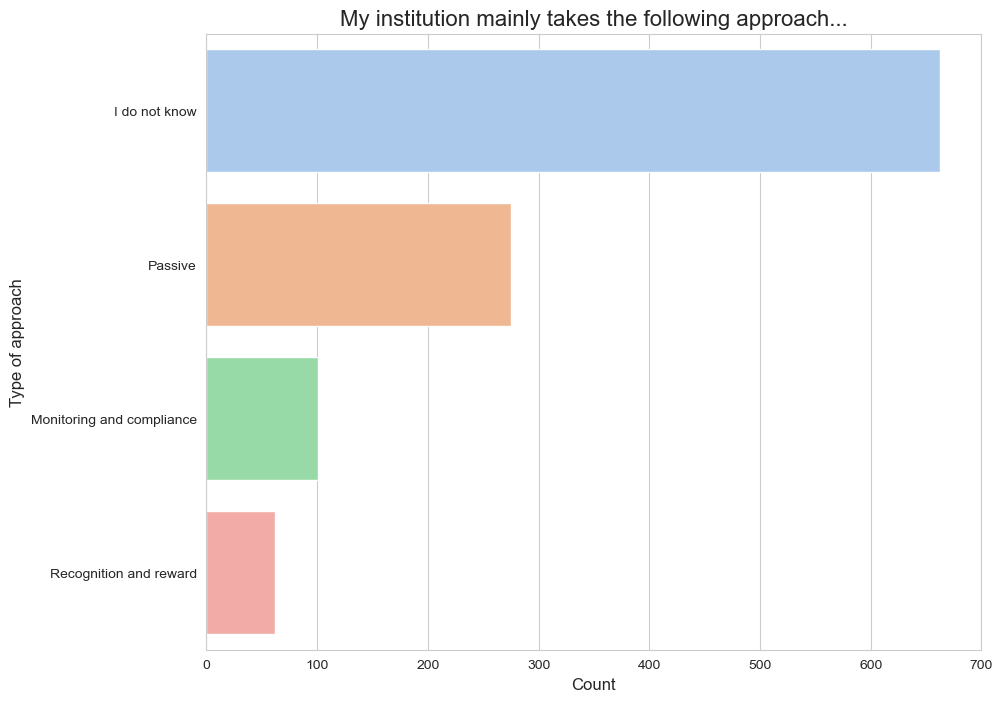

In [533]:
grouped_data = df.groupby('Q13.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q13.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 700)
plt.show()
#plt.savefig('../data/plots_test/preprints_approach.png', bbox_inches='tight', dpi = 300)

In [534]:
#Display how many particpants haven't given an answer
count = df["Q13.10"].isna().sum()
print(count, "participants have not answered.")

1493 participants have not answered.


### Q13.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [535]:
#Count all answers and list them descending
'N=' + (df['Q13.11'].value_counts(sort=True)).astype(str)

I do not know    N=741
Ok               N=199
Not very well     N=91
Very well         N=70
Name: Q13.11, dtype: object

In [536]:
#Display how many particpants haven't given an answer
count = df["Q13.11"].isna().sum()
print(count, "participants have not answered.")

1493 participants have not answered.


### Q13.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [537]:
#Count all answers and list them descending
df['Q13.12'].value_counts(sort=True)

-                                                              57
none                                                           42
na                                                             40
None                                                           39
no                                                             37
                                                               ..
In physics, arXiv is well accepted.                             1
There are still many publicated studies coming up everyday.     1
fgyh srrgt swt6y ryuj dfh                                       1
n\a                                                             1
i do not know                                                   1
Name: Q13.12, Length: 312, dtype: int64

### Q13.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [538]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q13.13'].value_counts(sort=True)

no                                                                                                                                                                                                                                                                                                                  51
-                                                                                                                                                                                                                                                                                                                   51
None                                                                                                                                                                                                                                                                                                                47
No                                                                 

## 14. Open Access (OA) Publications

### Q14.1 Ensuring publications are Open Access (OA) is something I think has a [low, medium, high] priority in my field of research:

In [539]:
#Count all answers and list them descending
df['Q14.1'].value_counts(sort=True)

High                      801
Medium                    231
Low                        42
I am not aware of this     21
Name: Q14.1, dtype: int64

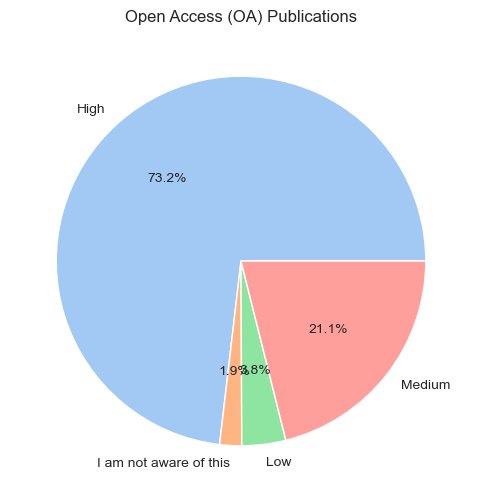

In [540]:
# Group the data by the column
grouped_data = df.groupby('Q14.1').size().reset_index(name='count')

# Create the pie chart using seaborn
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
sns.set_style('white')
plt.pie(grouped_data['count'], labels=grouped_data['Q14.1'], autopct='%1.1f%%')

# Add a title
plt.title('Open Access (OA) Publications')

# Show the chart
plt.show()
#plt.savefig('../data/plots_test/OA.png', bbox_inches='tight', dpi = 300, transparent=True)

In [541]:
#Display how many particpants haven't given an answer
count = df["Q14.1"].isna().sum()
print(count, "participants have not answered.")

1499 participants have not answered.


### Q14.2 I do this type of activity in my field of research:

In [542]:
print(df['Q14.2_1'].dtype)

object


In [543]:
df['Q14.2_1'] = pd.to_numeric(df['Q14.2_1'], errors='coerce').astype('Int64')

In [544]:
#Count all answers and list them
likert_data = df['Q14.2_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0     63
1     39
2     42
3    108
4    132
5    192
6    517
Name: Q14.2_1, dtype: Int64


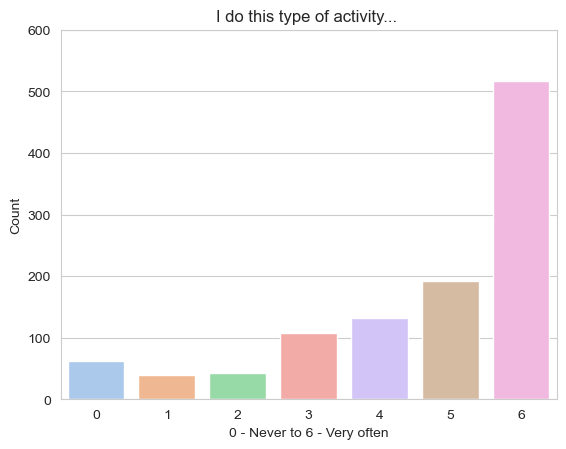

In [545]:
likert_data = df['Q14.2_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Never to 6 - Very often')
plt.ylabel('Count')
plt.title('I do this type of activity... ')

# Display the plot
plt.ylim(0, 600)
plt.show()
#plt.savefig('../data/plots_test/OA_activity.png', bbox_inches='tight', dpi = 300, transparent=True)

In [546]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.608417200365965
Median: 5.0
Mode: 6
Standard Deviation: 1.7878309042714244
Interquartile Range: 2


In [547]:
#Display how many particpants haven't given an answer
count = df["Q14.2_1"].isna().sum()
print(count, "participants have not answered.")

1501 participants have not answered.


### Q14.3 For me, training in this topic is:

In [548]:
print(df['Q14.3_1'].dtype)

object


In [549]:
df['Q14.3_1'] = pd.to_numeric(df['Q14.3_1'], errors='coerce').astype('Int64')

In [550]:
#Count all answers and list them
likert_data = df['Q14.3_1']

# count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# display the results
print(likert_counts)

0    134
1     98
2    104
3    183
4    161
5    127
6    277
Name: Q14.3_1, dtype: Int64


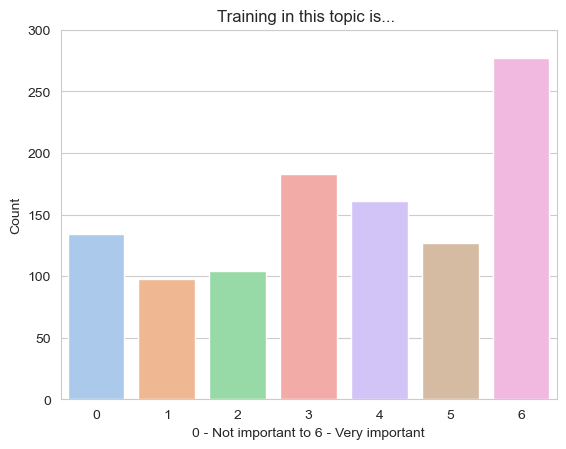

In [551]:
likert_data = df['Q14.3_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Not important to 6 - Very important')
plt.ylabel('Count')
plt.title('Training in this topic is... ')

# Display the plot
plt.ylim(0, 300)
plt.show()
#plt.savefig('../data/plots_test/OA_training.png', bbox_inches='tight', dpi = 300, transparent=True)

In [552]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 3.5018450184501844
Median: 4.0
Mode: 6
Standard Deviation: 2.0589189155020846
Interquartile Range: 4


In [553]:
#Display how many particpants haven't given an answer
count = df["Q14.3_1"].isna().sum()
print(count, "participants have not answered.")

1510 participants have not answered.


### Q14.4 I have looked for training and support in this topic at my institution:

In [554]:
#Count all answers and list them descending
'N=' + (df['Q14.4'].value_counts(sort=True)).astype(str)

No                    N=685
Yes                   N=380
Yes, but not found     N=29
Name: Q14.4, dtype: object

In [555]:
#Display how many particpants haven't given an answer
count = df["Q14.4"].isna().sum()
print(count, "participants have not answered.")

1500 participants have not answered.


### Q14.5 (if Q14.4 was yes) Training at my institution is:

In [556]:
#Show type of df column
print(df['Q14.5_1'].dtype)

object


In [557]:
df['Q14.5_1'] = pd.to_numeric(df['Q14.5_1'], errors='coerce').astype('Int64')

likert_data = df['Q14.5_1']

In [558]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.1866666666666665
Median: 4.0
Mode: 6
Standard Deviation: 1.5083841740084942
Interquartile Range: 3


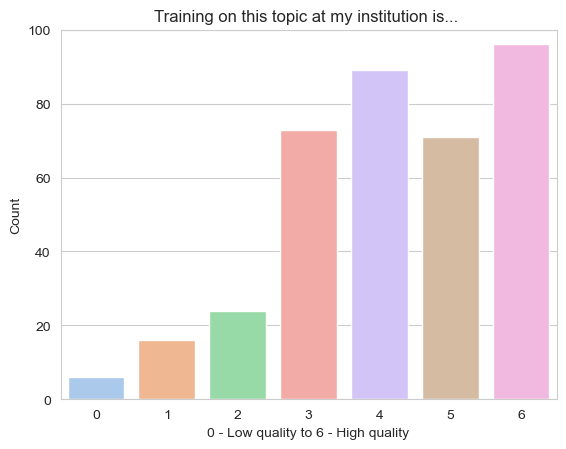

In [559]:
likert_data = df['Q14.5_1']

# Count the frequency of each response option
likert_counts = likert_data.value_counts(sort=False)

# Sort the response options in ascending order
likert_counts = likert_counts.sort_index()

# Create a bar plot using seaborn
sns.set_style("whitegrid")
sns.barplot(x=likert_counts.index, y=likert_counts.values)

# Set labels and title
plt.xlabel('0 - Low quality to 6 - High quality')
plt.ylabel('Count')
plt.title('Training on this topic at my institution is... ')

# Display the plot
plt.ylim(0, 100)
plt.show()
#plt.savefig('../data/plots_test/OA_quality.png', bbox_inches='tight', dpi = 300, transparent=True)

In [560]:
#Display how many particpants haven't given an answer
count = df["Q14.5_1"].isna().sum()
print(count, "participants have not answered.")

2219 participants have not answered.


### Q14.6 Training in this topic at my institution:

In [561]:
#Count all answers and list them descending
'N=' + (df['Q14.6'].value_counts(sort=True)).astype(str)

At the right level                        N=141
Frequent,At the right level                N=66
Infrequent                                 N=65
Frequent                                   N=42
Infrequent,At the right level              N=30
At too basic a level                       N=11
Infrequent,At too basic a level            N=10
Infrequent,At too complex a level           N=6
At too complex a level                      N=6
Frequent,At too complex a level             N=1
Frequent,At too basic a level               N=1
Frequent,Infrequent,At the right level      N=1
Name: Q14.6, dtype: object

In [562]:
#Normalise the count to represent answers in percent
(df['Q14.6'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

At the right level                        37.11%
Frequent,At the right level               17.37%
Infrequent                                17.11%
Frequent                                  11.05%
Infrequent,At the right level              7.89%
At too basic a level                       2.89%
Infrequent,At too basic a level            2.63%
Infrequent,At too complex a level          1.58%
At too complex a level                     1.58%
Frequent,At too complex a level            0.26%
Frequent,At too basic a level              0.26%
Frequent,Infrequent,At the right level     0.26%
Name: Q14.6, dtype: object

In [563]:
#Display how many particpants haven't given an answer
count = df["Q14.6"].isna().sum()
print(count, "participants have not answered.")

2214 participants have not answered.


### Q14.7 The help at my institution on this topic is mainly:

In [564]:
#Count all answers and list them descending
'N=' + (df['Q14.7'].value_counts(sort=True)).astype(str)

Good                                                        N=129
Available                                                    N=47
Good,At the right level,Available                            N=38
At the right level                                           N=35
Good,Available                                               N=25
I do not know                                                N=17
Hard to access                                               N=17
Good,At the right level                                      N=13
At the right level,Available                                 N=13
Too basic                                                     N=8
Other. Please explain:                                        N=6
Non-existent                                                  N=5
Hard to access,Other. Please explain:                         N=4
Good,At the right level,Available,Other. Please explain:      N=3
Available,Hard to access                                      N=3
Good,Other

In [565]:
#Normalise the count to represent answers in percent
(df['Q14.7'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Good                                                        33.95%
Available                                                   12.37%
Good,At the right level,Available                            10.0%
At the right level                                           9.21%
Good,Available                                               6.58%
I do not know                                                4.47%
Hard to access                                               4.47%
Good,At the right level                                      3.42%
At the right level,Available                                 3.42%
Too basic                                                    2.11%
Other. Please explain:                                       1.58%
Non-existent                                                 1.32%
Hard to access,Other. Please explain:                        1.05%
Good,At the right level,Available,Other. Please explain:     0.79%
Available,Hard to access                                     0

In [566]:
#Display how many particpants haven't given an answer
count = df["Q14.7"].isna().sum()
print(count, "participants have not answered.")

2214 participants have not answered.


### Q14.7_TEXT

In [567]:
#Count all answers and list them descending
df['Q14.7_8_TEXT'].value_counts(sort=True)

Excellent                                                                                                                                                                                                                                                                                         1
I'm not sure I've had training on this but the support available through our university library with open access is excellent! You get quick and very helpful responses to queries and they help you to navigate open access at all stages from deciding on a journal through post publication    1
Too complex                                                                                                                                                                                                                                                                                       1
the problem is not the training, it is the money to cover OA                                                                

### Q14.8 I have looked for training (e.g., courses, workshops) in this topic outside my institution:

In [568]:
#Count all answers and list them descending
df['Q14.8'].value_counts(sort=True)

No     999
Yes     93
Name: Q14.8, dtype: int64

### Q14.9 Where have you looked for training and support?

In [569]:
#Count all answers and list them descending
df['Q14.9'].value_counts(sort=True)

Online                                                                                     6
online                                                                                     5
Internet                                                                                   2
Other HE institutions                                                                      2
Library services at my previous institution                                                1
                                                                                          ..
Research office                                                                            1
journals and colleagues in my field                                                        1
university guidelines                                                                      1
MRC/UKRI                                                                                   1
Previous institutions/national libraries/ commercial publishers/ colle

### Q14.10 My institution takes mainly the following approach to this topic:

In [570]:
#Count all answers and list them descending
'N=' + (df['Q14.10'].value_counts(sort=True)).astype(str)

Monitoring and compliance    N=439
I do not know                N=362
Recognition and reward       N=158
Passive                      N=134
Name: Q14.10, dtype: object

In [571]:
#Normalise the count to represent answers in percent
(df['Q14.10'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Monitoring and compliance    40.16%
I do not know                33.12%
Recognition and reward       14.46%
Passive                      12.26%
Name: Q14.10, dtype: object

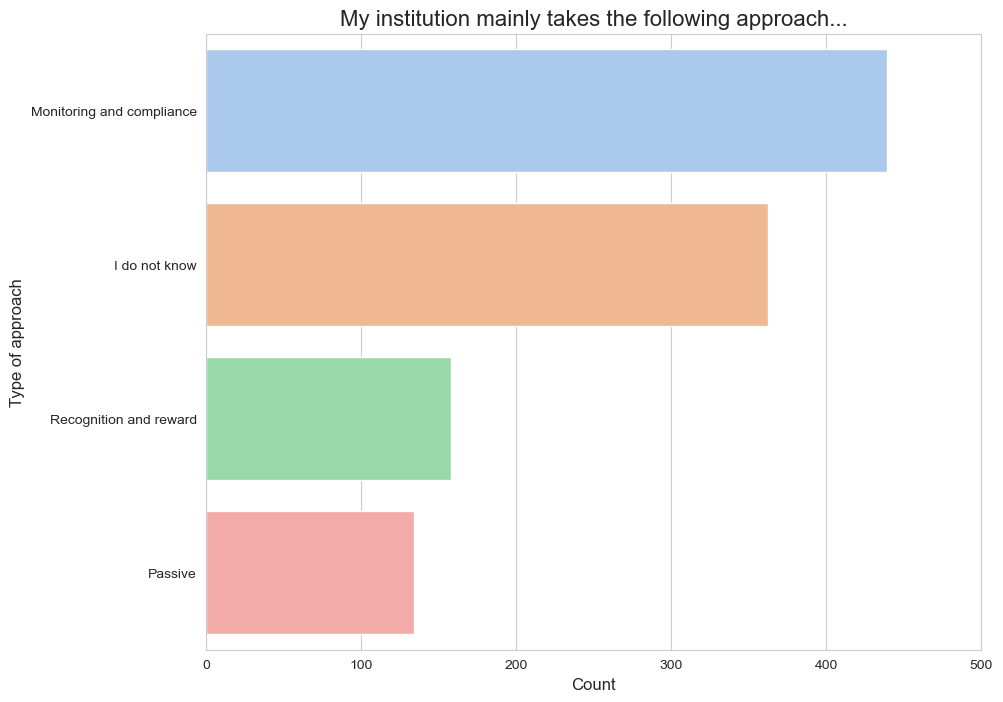

In [572]:
grouped_data = df.groupby('Q14.10').size().reset_index(name='count')

grouped_data = grouped_data.sort_values('count', ascending=False)

# Create the pie chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='Q14.10', data=grouped_data)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of approach', fontsize=12)
plt.title('My institution mainly takes the following approach...', fontsize=16)

# Show the chart
plt.xlim(0, 500)
plt.show()
#plt.savefig('../data/plots_test/OA_approach.png', bbox_inches='tight', dpi = 300)

In [573]:
#Display how many particpants haven't given an answer
count = df["Q14.10"].isna().sum()
print(count, "participants have not answered.")

1501 participants have not answered.


### Q14.11 And this approach (monitoring and compliance/recognition and reward/passive) works:

In [574]:
#Count all answers and list them descending
'N=' + (df['Q14.11'].value_counts(sort=True)).astype(str)

I do not know    N=447
Ok               N=366
Very well        N=206
Not very well     N=73
Name: Q14.11, dtype: object

In [575]:
#Display how many particpants haven't given an answer
count = df["Q14.11"].isna().sum()
print(count, "participants have not answered.")

1502 participants have not answered.


### Q14.12 If this topic involves risks or barriers to you or your field of study, please briefly explain here:

In [576]:
#Count all answers and list them descending
df['Q14.12'].value_counts(sort=True)

-                                                                                                                                                                                                                        56
None                                                                                                                                                                                                                     39
none                                                                                                                                                                                                                     34
no                                                                                                                                                                                                                       29
No                                                                                                                      

### Q14.13 Any other comments regarding this topic (e.g., not important to research field/personal practice, ideas, suggestions etc.)? Please feel free to evolve:

In [577]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q14.13'].value_counts(sort=True)

-                                                                                                                                                                  55
None                                                                                                                                                               49
No                                                                                                                                                                 47
no                                                                                                                                                                 46
none                                                                                                                                                               43
                                                                                                                                                                   ..
Very

## Q15: On the following scale, how likely are you to recommend the adoption of open and transparent research practices to colleagues? - Would not recommend (0) - Would highly recommend (6)

In [578]:
#Show type of df column
print(df['Q15_1'].dtype)

object


In [579]:
df['Q15_1'] = pd.to_numeric(df['Q15_1'], errors='coerce').astype('Int64')

likert_data = df['Q15_1']

In [580]:
# calculate the mean, median, and mode of the responses
mean = likert_data.mean()
median = likert_data.median()
mode = likert_data.mode().iloc[0]

# calculate the standard deviation and interquartile range
std = likert_data.std()
iqr = likert_data.quantile(0.75) - likert_data.quantile(0.25)


# display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std}")
print(f"Interquartile Range: {iqr}")

Mean: 4.974288337924701
Median: 6.0
Mode: 6
Standard Deviation: 1.4307803536746293
Interquartile Range: 2


In [581]:
#Display how many particpants haven't given an answer
count = df["Q15_1"].isna().sum()
print(count, "participants have not answered.")

1505 participants have not answered.


## Q16: Having considered barriers above, which do you perceive to be as the greatest barrier to the uptake of open research practices in your field?

In [582]:
#Count all answers and list them descending
'N=' + (df['Q16'].value_counts(sort=True)).astype(str)

Lack of dedicated funding                                                                                               N=208
Lack of positive incentives                                                                                             N=167
Lack of time                                                                                                            N=165
Lack of information or training                                                                                         N=103
Other. Please explain:                                                                                                  N=102
Lack of mandates from funders, institutions or regulators                                                                N=91
The level of adoption of open research practices in my field is already sufficient                                       N=77
Lack of supporting infrastructure (e.g., sufficient storage for open data / publishing platform for open monographs)  

In [583]:
#Normalise the count to represent answers in percent
(df['Q16'].value_counts(sort=True, normalize=True) * 100).round(2).astype(str) + '%'

Lack of dedicated funding                                                                                               19.12%
Lack of positive incentives                                                                                             15.35%
Lack of time                                                                                                            15.17%
Lack of information or training                                                                                          9.47%
Other. Please explain:                                                                                                   9.38%
Lack of mandates from funders, institutions or regulators                                                                8.36%
The level of adoption of open research practices in my field is already sufficient                                       7.08%
Lack of supporting infrastructure (e.g., sufficient storage for open data / publishing platform for open monogr

In [584]:
#This question contains a lot of textual information, to display all cells activate the code line below
#pd.set_option('display.max_rows', None)

#Count all answers and list them descending
df['Q16_11_TEXT'].value_counts(sort=True)

Big deals with the NIH have polarised this concept                                                                                                                                                                                                                                                      1
It's horrendously complex. It requires reading tomes of legalese about contracts between the university and OA publishers which rapidly change.                                                                                                                                                         1
Establishing relevance of these practices in my own disciplinary context                                                                                                                                                                                                                                1
Pretty much everything above except for lack if interest from junior researchers. I've seen more older res

In [585]:
#Display how many particpants haven't given an answer
count = df["Q16"].isna().sum()
print(count, "participants have not answered.")

1506 participants have not answered.
